Note importante : Nous n'avons pas "cleané" notre notebook comme cela a été demandé. Néanmoins, par souci de lisibilité et de compréhension nous avons enlevé certaines opérations trop "encombrantes" qui se sont révélées infructueuses. Parfois, ces longues opérations nous ont permises de remarquer quelques détails que nous ne pouvons ommettre. Nous avons choisi de les mentionner sans la démonstration du chemin pris pour trouver ce détail (qui sont ces opérations encombrantes). 
On précisera ces rares cas d'une note.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import itertools
import scipy.stats as st

#On a mis les csv dans un dossier nommé Data
es_country = pd.read_csv('./Data/EdStatsCountry.csv')
es_country_series = pd.read_csv('./Data/EdStatsCountry-Series.csv')
es_data = pd.read_csv('./Data/EdStatsData.csv')
es_foot_note = pd.read_csv('./Data/EdStatsFootNote.csv')
es_series = pd.read_csv('./Data/EdStatsSeries.csv')

Ressources

In [2]:
#https://datatopics.worldbank.org/education/
#https://datahelpdesk.worldbank.org/knowledgebase

Fonctions

In [3]:
#print proportion de données manquantes
def show_nan_proportion(df):
    columns = df.columns
    print('Pourcentage des données manquantes:\n\n')
    for i in columns:
        num_na = df[i].isna().sum()
        num_rows = df.shape[0]
        print("Column", i, "has"  ,(num_na/num_rows)*100, "% of missing values")
    print('\n\n')
    
#présentation succinte d'une table

def present_data_frame(df):
    print('Nom des colonnes:\n\n',df.columns, '\n\n')
    print('(lignes, colonnes)\n\n', df.shape, '\n\n')
    show_nan_proportion(df)
    print('Nombre de doublons:\n\n',df.duplicated().value_counts(), '\n\n')
    
#return list of indicators in a topic
def show_indicators(topic):
    return left_data_series[left_data_series['Topic'] == topic]['Indicator Name'].unique()

#return list of indicators without gender dicrimination
def remove_gender_dicrimination(indicator_names_list):
    no_gender_specification = re.compile('male|female')
    no_gender_list = []
    for i in indicator_names_list:
        if no_gender_specification.search(i): pass 
        else: no_gender_list.append(i)
    return no_gender_list

#Return if an indicator has data
def show_indicators_rows(list_indicators_name):
    for i in list_indicators_name:
        lignes = left_data_series[left_data_series['Indicator Name'] == i].shape[0]
        print(i, 'compte :', lignes, 'lignes')
        
        
#return a barplot with missing value and available values
def display_bar_nan(df, nom_df):
    columns = df.columns
    columns_name = []
    column_nan_percent = []
    column_non_nan_percent = []
    
    for i in columns:
        num_na = df[i].isna().sum()
        num_rows = df.shape[0]
        
        columns_name.append(i)
        column_nan_percent.append((num_na/num_rows)*100)
        column_non_nan_percent.append(100 - (num_na/num_rows)*100)
        
    plt.figure(figsize=(20,10))
    
    ax = plt.subplot()
    ####ax.tick_params(axis='y', colors=font_txt)
    ax.set_xticks(range(len(columns_name)))
    ax.set_xticklabels(labels = columns_name, 
                       rotation=90, 
                       ####color=font_txt
                      )
    
    plt.bar(columns_name, column_non_nan_percent, color='orange')  
    plt.bar(columns_name, column_nan_percent, bottom=column_non_nan_percent, color='#1f77b4')
    
    leg = plt.legend(
        ['Donnée Disponible', 'Donnée Manquante'], 
        fontsize=font_sizes,
        ####facecolor=legend_background,
    )
    plt.title('{} données manquantes et données disponibles'.format(nom_df), 
              fontsize=font_sizes,
              pad=20,
              ####color=font_txt
             )
    
    
    ####for j in leg.get_texts(): j.set_color(font_txt)
    ####plt.savefig('./SavedGraphs/{} données manquantes et données disponibles.png'.format(nom_df), transparent=True)
    plt.show()
    
#renvoie indicateurs dont l'unité est le deuxième argument 
def filter_indicators_by_measurement(indicator_list, measure):
    
    list_of_filtered_indicators = []
    
    percent_symbol = re.compile('(%)')
    number_symbol = re.compile('(number)')
    gpi_symbol = re.compile('(GPI)')
    years_symbol = re.compile('(years)')

    
    if str(measure) == 'percent':
        symbol = percent_symbol
    elif str(measure) == 'number':
        symbol = number_symbol
    elif str(measure) == 'gpi':
        symbol = gpi_symbol
    elif str(measure) == 'years':
        symbol = years_symbol
    else: pass
    
    for i in indicator_list: 
        if symbol.search(i):
            list_of_filtered_indicators.append(i)
        else: pass
    return list_of_filtered_indicators

#renvoie une liste de deux liste dont l'une comporte les valeurs sur les écoles privées [1] et 
#l'autre sur les écoles publiques [0]

def filter_private_public_from_indicators(indicator_list):
    
    public_list = []
    private_list = []
    
    public_specification = re.compile('public')
    private_specification = re.compile('private')
    
    for i in indicator_list:
        if public_specification.search(i): public_list.append(i)
        elif private_specification.search(i) : private_list.append(i)
        else : pass
    return [public_list, private_list]

#filtre par upper ou lower et par isced en fonction du deuxième argument renseigné
#deuxième argument : secondary ou tertiary

def filter_indicator_by_level(indicator_list, whichlevel):
    
    list_of_filtered_indicators = []
    
    upper_specification = re.compile('upper')
    isced_specification = re.compile('ISCED')
    
    for i in indicator_list:
        if whichlevel == 'secondary':
            if upper_specification.search(i): list_of_filtered_indicators.append(i)
            else : pass
        elif whichlevel == 'tertiary':
            if isced_specification.search(i): list_of_filtered_indicators.append(i)
            else : pass
        else: pass
        
    return list_of_filtered_indicators

#on définit une fonction qui renvoie une seule liste d'indicateurs en fonction de plusieurs 
#topics

def return_all_indicators_from_several_lists(list_of_sevreal_topics):
    gamma_list = []

    for i in list_of_sevreal_topics:
        gamma_list.append(show_indicators(i).tolist())

    return list(itertools.chain.from_iterable(gamma_list))

#on definit une fonction qui renvoie min max year par indicateur 

def show_min_max_year_per_indicators(list_of_indicators):
    for i in list_of_indicators:
        min_year = left_data_series[left_data_series['Indicator Name'] == i]['Year'].min()
        max_year = left_data_series[left_data_series['Indicator Name'] == i]['Year'].max()
        print(i, ": [", min_year, ";",max_year ,"]")
        
#projections : renvoie les valeurs au dessous des années renseignées 

def return_countries_according_to_years(df, annee_min, annee_max):
    below = df.groupby('Country Name').min()[df.groupby('Country Name').min()['Year'] > annee_min]
    above = df.groupby('Country Name').max()[df.groupby('Country Name').max()['Year'] < annee_max]
    
    return below, above

#renvoie les pays qui ne sont pas fortement lénéairement 
#corrélés en fonction d'un coefficient renseigné

def return_countries_not_linearly_correlated(df, indicator, pearson_coeff):
    corr_by_countries = df.groupby('Country Name').corr().reset_index()
    corr_by_countries_year_only = corr_by_countries[corr_by_countries['Indicator Name'] == 'Year']
    corr_by_countries_year_only_not_in_coeff = corr_by_countries_year_only[
        (corr_by_countries_year_only[indicator] >= -pearson_coeff)&
        (corr_by_countries_year_only[indicator] <= pearson_coeff)
    ]
    return corr_by_countries_year_only_not_in_coeff

#aide à faire les projections par régression linéaire

def do_linear_regression(df, indicator, percent=False):
    
    eta_df = pd.DataFrame(columns=['Year','Country Name',indicator])
    
    corr_countries = df.groupby('Country Name').corr().reset_index()
    corr_countries_by_year = corr_countries[corr_countries['Indicator Name'] == 'Year']
    na_corr_list = corr_countries_by_year[corr_countries_by_year[indicator].isna()]['Country Name'].tolist()
    
    if indicator == 'Theoretical duration of upper secondary education (years)':pass
    elif indicator == 'Percentage of enrolment in tertiary education in private institutions (%)':pass
    else:
        df = df[~df['Country Name'].isin(na_corr_list)]
    
    for i in df['Country Name'].unique():
        
        extentsion_df = pd.DataFrame(columns=['Year','Country Name',
                             indicator,
                            ],index=np.arange(14))

        extentsion_df['Country Name'] = i
        extentsion_df['Year'] = projected_years
        
        
        if indicator == 'Theoretical duration of upper secondary education (years)':
                extentsion_df[indicator] = extentsion_df[indicator].apply(
                    lambda x : df[df['Country Name'] == i][indicator])
                
        elif (i in na_corr_list) & (indicator == 'Percentage of enrolment in tertiary education in private institutions (%)'):
            extentsion_df[indicator] = extentsion_df[indicator].apply(
                lambda x : df[df['Country Name'] == i][indicator])  
                
        else:
            a_country_df = df[df['Country Name'] == i]

            x = a_country_df['Year']
            y = a_country_df[indicator]

            res = st.linregress(x, y)
            extentsion_df[indicator] = res.slope*extentsion_df['Year'] + res.intercept   

            if(percent):
                extentsion_df[indicator] = extentsion_df[indicator].apply(lambda x: 100 if x >= 100 else x)
                extentsion_df[indicator] = extentsion_df[indicator].apply(lambda x: 0 if x <= 0 else x)

        eta_df = eta_df.append(extentsion_df)
        
    return eta_df, na_corr_list

    
#return bar graph of a ranking
def return_barplots_ranking(number_of_countries, which_result, which_indicator, projection=False):
    plt.figure(figsize=(20,10))
    ax = plt.subplot()
    plt.bar(range(len(which_result.head(number_of_countries))), which_result.head(number_of_countries)[which_indicator])
    
    ax.set_xticks(range(len(which_result.head(number_of_countries))))
    ax.set_xticklabels(which_result.head(number_of_countries)['Country Name'], rotation= 70)
    
    ####ax.tick_params(axis='x', colors=font_txt)
    ####ax.tick_params(axis='y', colors=font_txt)
    
    if projection:
        plt.title(
            'Top {} des pays en fonction du calcul : {} (Projections)'.format(number_of_countries, which_indicator),
            fontsize=font_sizes,
            pad = 20,
            ####color=font_txt
        )
    else:
        plt.title(
            'Top {} des pays en fonction du calcul : {}'.format(number_of_countries, which_indicator),
            fontsize=font_sizes,
            pad = 20,
            ####color=font_txt
        )
        
    ####plt.savefig('./SavedGraphs/.png', transparent=True)
    plt.show()
    plt.clf()
    
#formatte des noms de pays pour jointure avec les régions
def format_table_name(x):
    if x == "Côte d'Ivoire":
        return 'Cote d\'Ivoire'
    elif x == 'Curaçao':
        return 'Curacao'
    elif x == 'Faeroe Islands':
        return 'Faroe Islands'
    elif x == 'Korea, Dem. Rep.':
        return 'Korea, Dem. People’s Rep.'
    elif x == 'São Tomé and Principe':
        return 'Sao Tome and Principe'
    else: return x

Constantes

In [4]:
#sizes
font_sizes = 20

#couleurs
font_txt = '#FFFFFF'
legend_background = '#000000'

<h3 id='1'>1. Familiarisation avec les données et premier nettoyage</h3>

<h4>EdStatsData</h4>

es_data

In [5]:
#on visualise les données
es_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
present_data_frame(es_data)

#Colonnes de 1970 à 2100 = 1 variable = Année 
#[1970 ; 2017] x+1 [2017 ; 2020] x+3 [2020;2100] x+5
#100% de données manquantes dans Unamed:69 100% 
#886930 lignes , 70 colonnes
#Il n'y a pas de lignes dupliquées

Nom des colonnes:

 Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object') 


(lignes, colonnes)

 (886930, 70) 


Pourcentage des données manquantes:


Column Country Name has 0.0 % of missing values
Column Country Code has 0.0 % of missing values
Column Indicator Name has 0.0 % of missing values
Column Indicator Code has 0.0 % of missing values
Column 1970 has 9

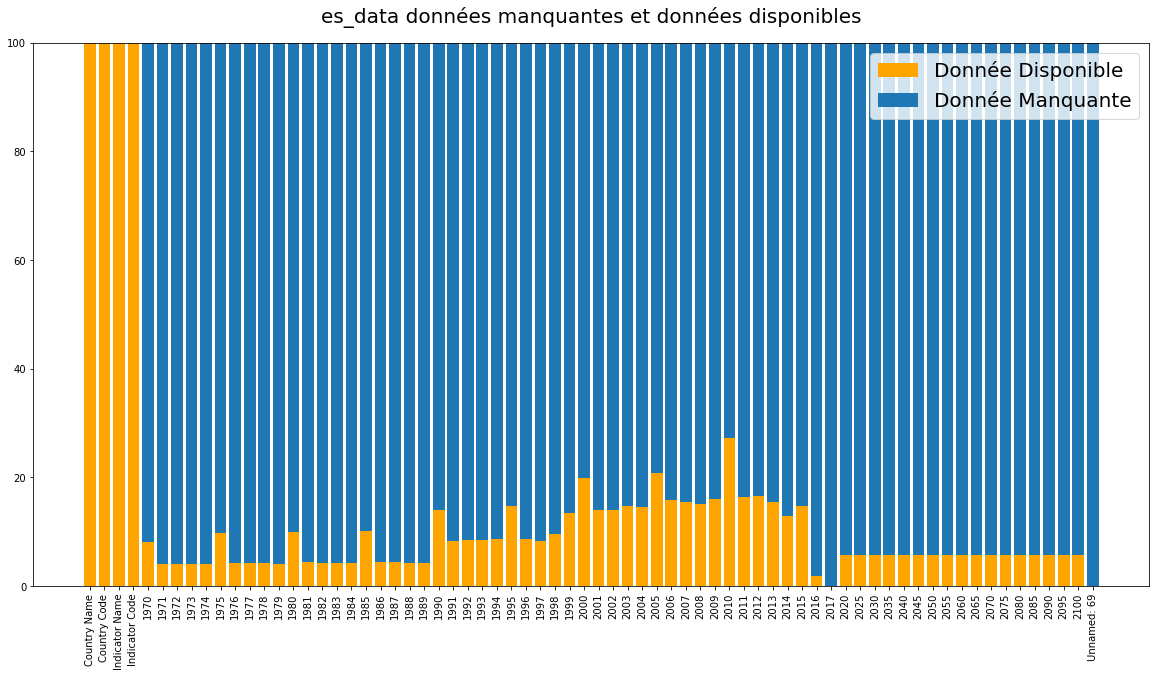

In [7]:
#on regarde les valeurs manquantes avec un graphique

#Les colonnes étant des années, on distingue un pas de 5 avec plus de données les années finissant
#par 0 ou 5

#Il y a des données projectives car même nombre de données
#2020 semble être une donnée projective
#Les données "factuelles" semblent s'arrêter en 2016
#Pas de données pour 2021 !

display_bar_nan(es_data, 'es_data')

es_data_bis

In [8]:
#On regroupe toutes les colonnes années sous Year et leurs résultats sous Result
es_data_bis = pd.melt(es_data, id_vars=['Country Name', 'Country Code', 'Indicator Name', 
                       'Indicator Code','Unnamed: 69'], value_vars=['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
                       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
                       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
                       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
                       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
                       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
                       '2095', '2100'], var_name="Year", value_name="Result")

#On supprime Unnamed: 69 
es_data_bis.drop(['Unnamed: 69'], axis=1, inplace=True)

In [9]:
#on visualise
es_data_bis.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Result
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,1970,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,1970,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,1970,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,1970,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,1970,54.822121


In [10]:
#Le nombre de lignes a fortement augmenté. On a moins de colonnes
es_data_bis.shape

(57650450, 6)

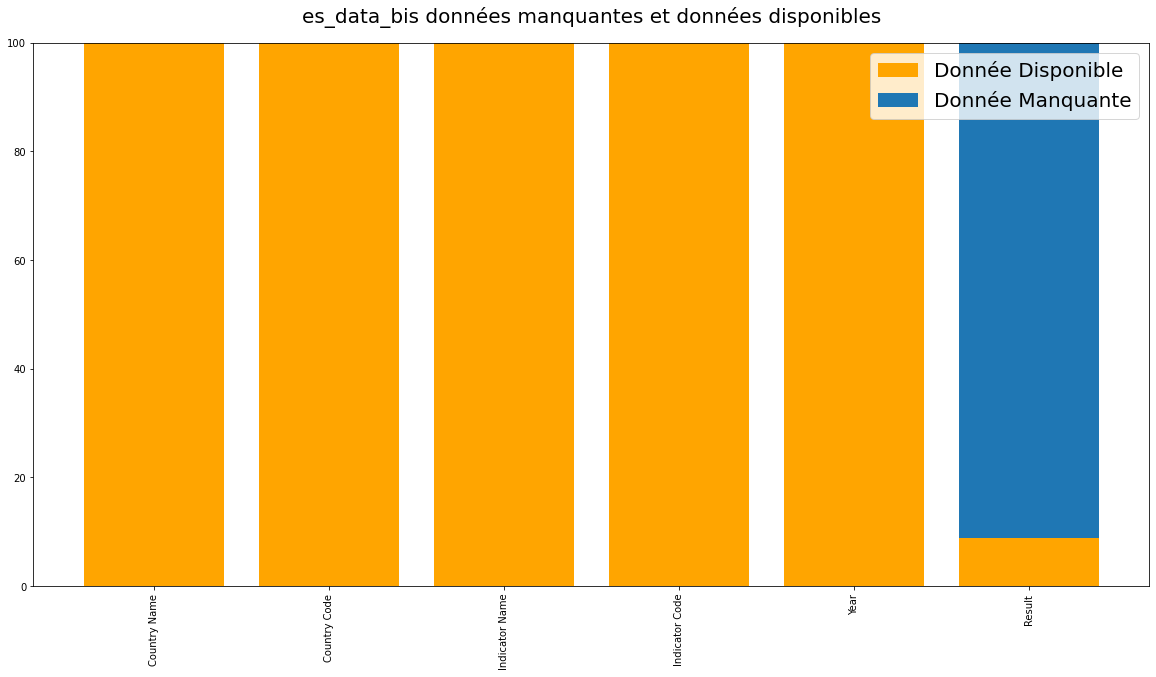

In [11]:
display_bar_nan(es_data_bis, 'es_data_bis')

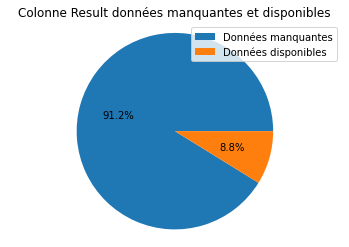

<Figure size 432x288 with 0 Axes>

In [12]:
#on calcule le pourcentage de données manquantes dans Result
percent_of_es_data_bis_missing_values = (
    (es_data_bis['Result'].isna().sum())/len(es_data_bis['Result'])
)*100

#on met dans une liste les pourcente=ages de Nan et de non Nan
values_es_data_bis = [
    percent_of_es_data_bis_missing_values, 
    (100 - percent_of_es_data_bis_missing_values)
]

#on donne des légendes à ces valeurs
legend_values_es_data_bis = ['Données manquantes', 'Données disponibles']

plt.pie(values_es_data_bis, autopct='%0.1f%%')

plt.axis('equal')
plt.legend(legend_values_es_data_bis)
plt.title('Colonne Result données manquantes et disponibles')

plt.show()
plt.clf()

#91.2% de données manquantes dans Result

es_data_bis_whithout_na_result

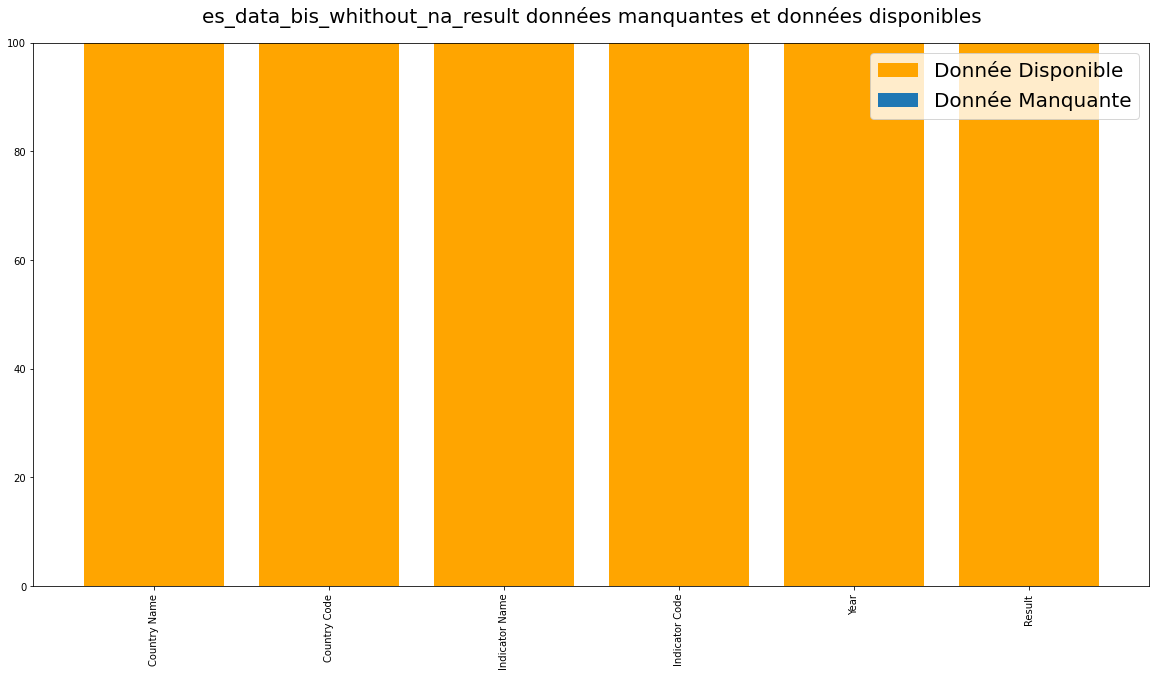

In [13]:
#on peut les supprimer 
#on enregistre cette df dans es_data_bis_whithout_na_result

es_data_bis_whithout_na_result = es_data_bis.dropna(subset=['Result'])

display_bar_nan(es_data_bis_whithout_na_result, 'es_data_bis_whithout_na_result')

<h4>EdStatsSeries</h4>

es_series

In [14]:
#on visualise
es_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
present_data_frame(es_series)


#Il manque 100% des données dans :
es_series_no_data = [
    'Unit of measure',
    'Notes from original source',
    'Other web links',
    'Related indicators',
    'License Type',
    'Unnamed: 20'
]

#Il n'y a pas de lignes dupliquées

Nom des colonnes:

 Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object') 


(lignes, colonnes)

 (3665, 21) 


Pourcentage des données manquantes:


Column Series Code has 0.0 % of missing values
Column Topic has 0.0 % of missing values
Column Indicator Name has 0.0 % of missing values
Column Short definition has 41.17326057298772 % of missing values
Column Long definition has 0.0 % of missing values
Column Unit of measure has 100.0 % of missing values
Column Periodicity has 97.2987721691678 % of missing values
Column Base Period has 91.43246930422919 % of m

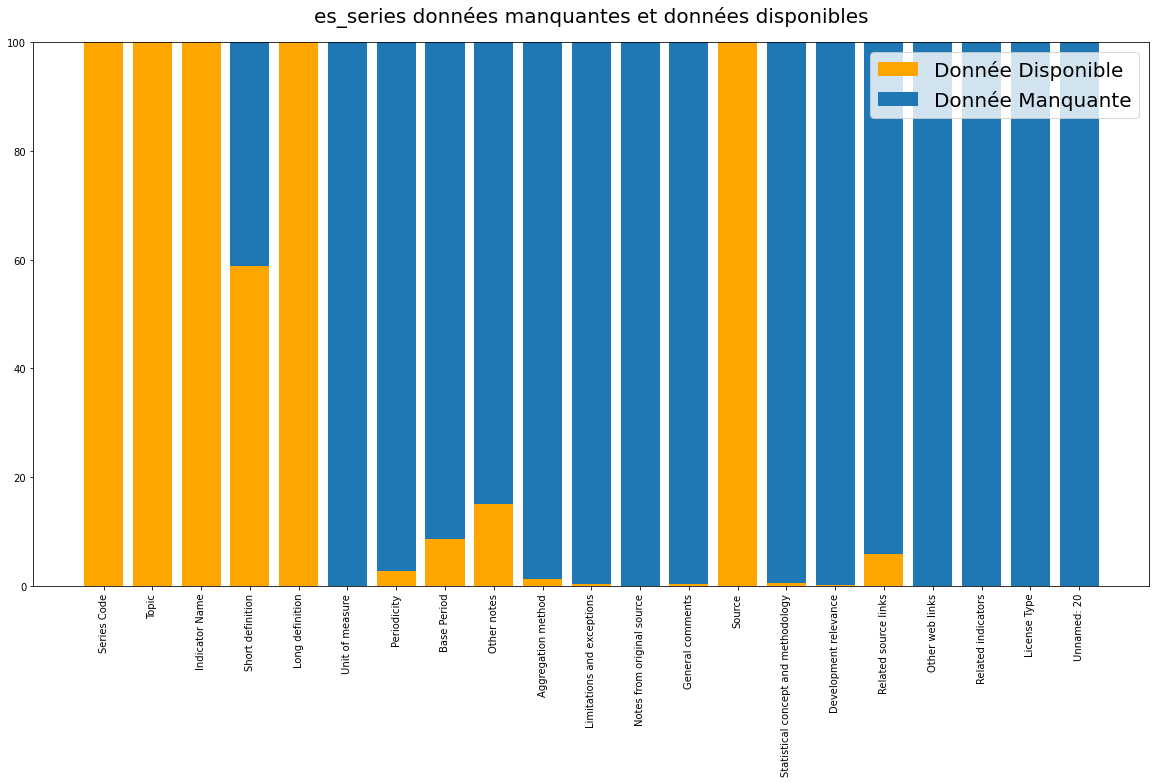

In [16]:
display_bar_nan(es_series, 'es_series')

es_series_bis

In [17]:
#on crée es_series_bis pour commencer à nettoyer es_series
es_series_bis = es_series.copy()

#on drop les colonnes qui ont 100% de données manquantes
#on enlève également Short Definition car Long Defintion en est un substitut avec davantage
#de données
es_series_bis.drop([*es_series_no_data,'Short definition'], axis=1, inplace=True)

#on visualise
es_series_bis.head()

#on note que Series Code est équivalent à Indicator Code dans la table es_data, une jointure est
#envisageable
#la colonne topic nous aidera probablement à trier les indicateurs

,Series Code,Topic,Indicator Name,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN


<h4>EdStatsCountry</h4>

es_country

In [18]:
#on visualise
es_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [19]:
present_data_frame(es_country)

#100% de données manquantes dans 'Unnamed: 31'

Nom des colonnes:

 Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object') 


(lignes, colonnes)

 (241, 32) 


Pourcentage des données manquantes:


Column Country 

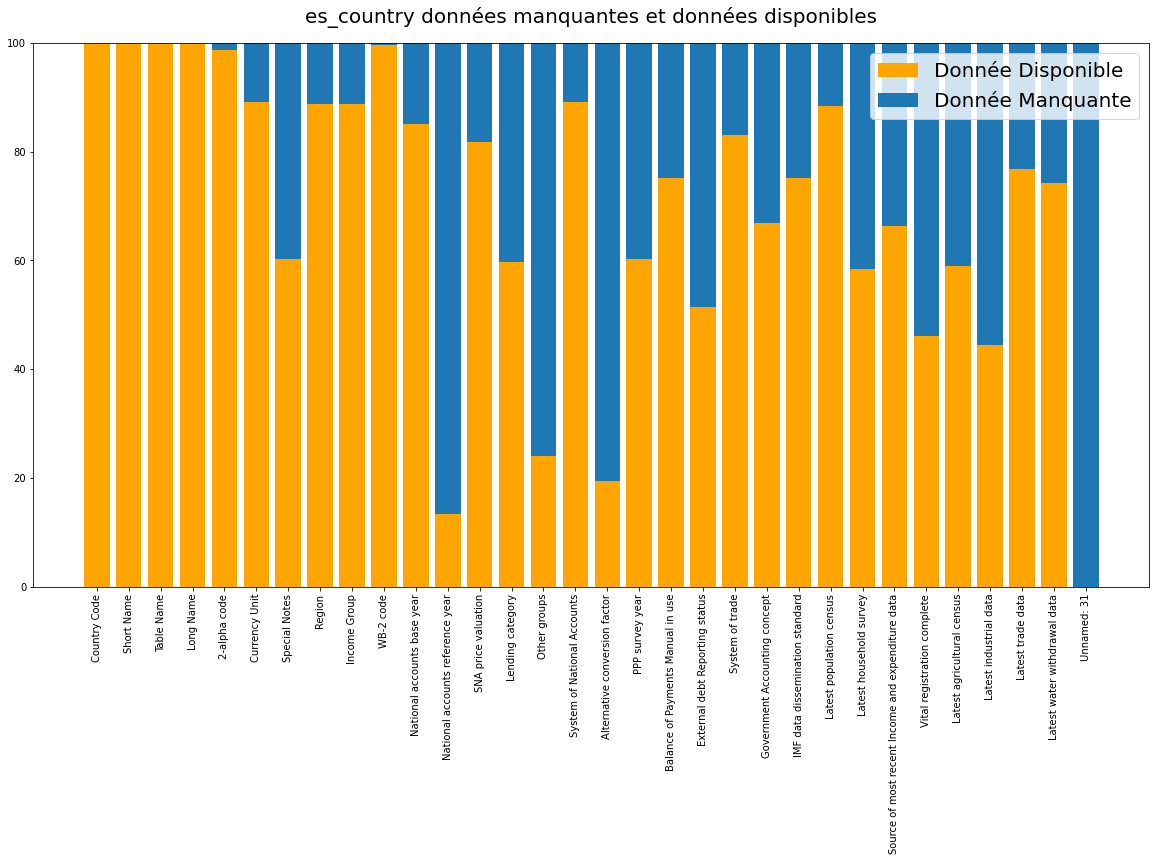

In [20]:
display_bar_nan(es_country, 'es_country')

Analyse des colonnes es_country

In [21]:
#les colonnes de es_country étant plus amplement remplies et moins explicites que dans les autres
#df, nous décidons de les analyser plus en détail

es_country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [22]:
#on utilise ce checker pour traiter les colonnes individuellement
#on répertorie les remarques et notes dans la cell ci-dessous

es_country[['Short Name', 'SNA price valuation']] #on entre les colonnes ici

,Short Name,SNA price valuation
0,Aruba,Value added at basic prices (VAB)
1,Afghanistan,Value added at basic prices (VAB)
2,Angola,Value added at producer prices (VAP)
3,Albania,Value added at basic prices (VAB)
4,Andorra,NaN
...,...,...
236,Kosovo,Value added at basic prices (VAB)
237,Yemen,Value added at producer prices (VAP)
238,South Africa,Value added at basic prices (VAB)
239,Zambia,Value added at basic prices (VAB)


In [23]:
#On a des colonnes d'aggrégations utilisées par le World Bank Group.

aggregats = [ 
    'Region', #géographie
    'Income Group', #économie
    'Lending category'#économie
]


#On a des colonnes sur des précisions sur la comptabilité nationale et d'autres agrégats 
#économiques

comptabilite_nationnale = [
    'System of National Accounts', 
        #Système de compta nat (quel système)
    'SNA price valuation',  
        #['Value added at basic prices (VAB)','Value added at producer prices (VAP)', nan], dtype=object
    'National accounts base year', 
    'National accounts reference year', 
    'Lending category', 
        #array([nan, 'IDA', 'IBRD', 'Blend'], dtype=object); éligible pour crédit
    'Other groups', 
        #array([nan, 'HIPC', 'Euro area'], dtype=object) ; HIPC = Heavily Indebted Poor Countries
    'PPP survey year', 
        #important, array([nan, '2005', 'Rolling', '2011'], dtype=object)
    'External debt Reporting status', 
        #array([nan, 'Actual', 'Preliminary', 'Estimate'], dtype=object)
    'System of trade', 
        #array(['Special trade system', 'General trade system', nan], dtype=object)
    'Government Accounting concept', 
        #array([nan, 'Consolidated central government','Budgetary central government'], dtype=object)
    'IMF data dissemination standard', 
        #array([nan, 'General Data Dissemination System (GDDS)','Special Data Dissemination Standard (SDDS)'], dtype=object)
    'Balance of Payments Manual in use', 
        #'array([\'IMF Balance of Payments Manual, 6th edition.\', nan], dtype=object)'
    'Currency Unit', #explicite
]

#On a des colonnes sur des précisions sur les enquêtes menées (noms, années, etc.)

latest = [
    'Latest population census', 
        #années
    'Latest household survey', 
        #nunique() 60 ex : Demographic and Health Survey (DHS), 2013, Malaria Indicator Survey (MIS), 2010; HIV/Mate...
    'Source of most recent Income and expenditure data', 
        #nunique() 75 ex : Integrated household survey (IHS), 2012 ; Priority survey (PS), 2008
    'Latest agricultural census', 
        #années, 35 uniques, 
    'Vital registration complete', 
        #array(['Yes', nan, 'Yes. Vital registration for Guernsey and Jersey.'],dtype=object)
    'Latest trade data', 
        #années
    'Latest industrial data', 
        #années
    'Latest water withdrawal data', 
        #années
]

#On a des colonnes sur des notes spéciales

autres = [
    'Special Notes', #notes
]

#On a des colonnes qui apportent la même information que d'autres (Short Name et Country Code)
doublons = [
    'WB-2 code', #doublon de Country Code
    'Table Name', #doublon de Short Name
    'Long Name', #doublon de Short Name
]

es_country_bis

In [24]:
#Ex nihilo
#A travers l'exploration des valeurs prises par certaines colonnes on a pu remarquer : 

#Que les valeurs manquantes des régions font références aux aggrégats dans les colonnes 
#des noms des pays (cf aggregats = [ 'Region', #géographie 'Income Group', #économie 
#'Lending category'#économie])

es_country[es_country['Region'].isna()]

#avant de les supprimer on récupère ces valeurs dans une liste : 

regions_in_countries = es_country[es_country['Region'].isna()]['Short Name'].unique().tolist()

#on a Gibraltar et Nauru en trop dans cette liste, on les enlève de la liste
regions_in_countries.remove('Gibraltar')
regions_in_countries.remove('Nauru')


#on supprime
es_country_bis = es_country[~es_country['Short Name'].isin(regions_in_countries)].copy()

es_country_bis.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


1. 4. <span style="font-weight:bold">Country Series</span>

In [25]:
es_country_series.head()

#SeriesCode = Indicator Code
#df intéressante à partir du moment où sélection indicateur faite

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [26]:
present_data_frame(es_country_series)

#Unnamed: 3;  100% missing values
#613 lignes, fait peu néanmoins

Nom des colonnes:

 Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object') 


(lignes, colonnes)

 (613, 4) 


Pourcentage des données manquantes:


Column CountryCode has 0.0 % of missing values
Column SeriesCode has 0.0 % of missing values
Column DESCRIPTION has 0.0 % of missing values
Column Unnamed: 3 has 100.0 % of missing values



Nombre de doublons:

 False    613
dtype: int64 




In [27]:
es_country_series['CountryCode'].nunique()

211

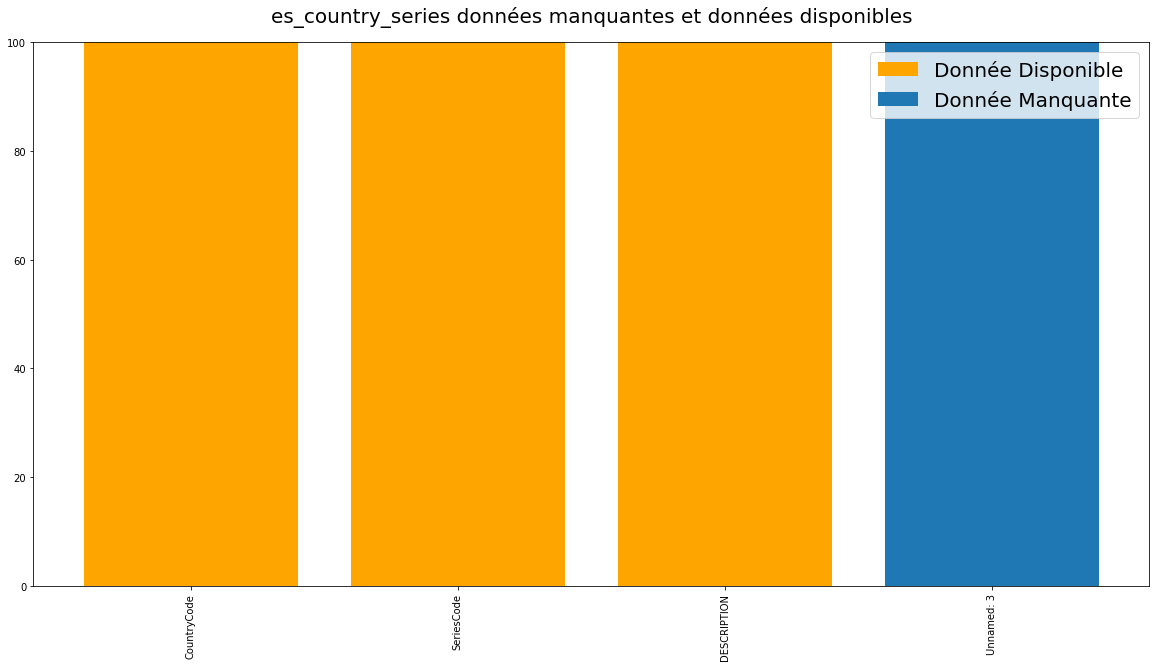

In [28]:
display_bar_nan(es_country_series, 'es_country_series')

In [29]:
#on enlève Unnamed: 3

es_country_series.drop(['Unnamed: 3'], axis=1, inplace=True)

In [30]:
es_country_series.head()

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...


1. 5. <span style="font-weight:bold">Foot Note</span>

In [31]:
es_foot_note.head()

#'Unnamed: 4' 100% missing values
#df intéressante à partir du moment où sélection indicateur faite

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [32]:
present_data_frame(es_foot_note)

Nom des colonnes:

 Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object') 


(lignes, colonnes)

 (643638, 5) 


Pourcentage des données manquantes:


Column CountryCode has 0.0 % of missing values
Column SeriesCode has 0.0 % of missing values
Column Year has 0.0 % of missing values
Column DESCRIPTION has 0.0 % of missing values
Column Unnamed: 4 has 100.0 % of missing values



Nombre de doublons:

 False    643638
dtype: int64 




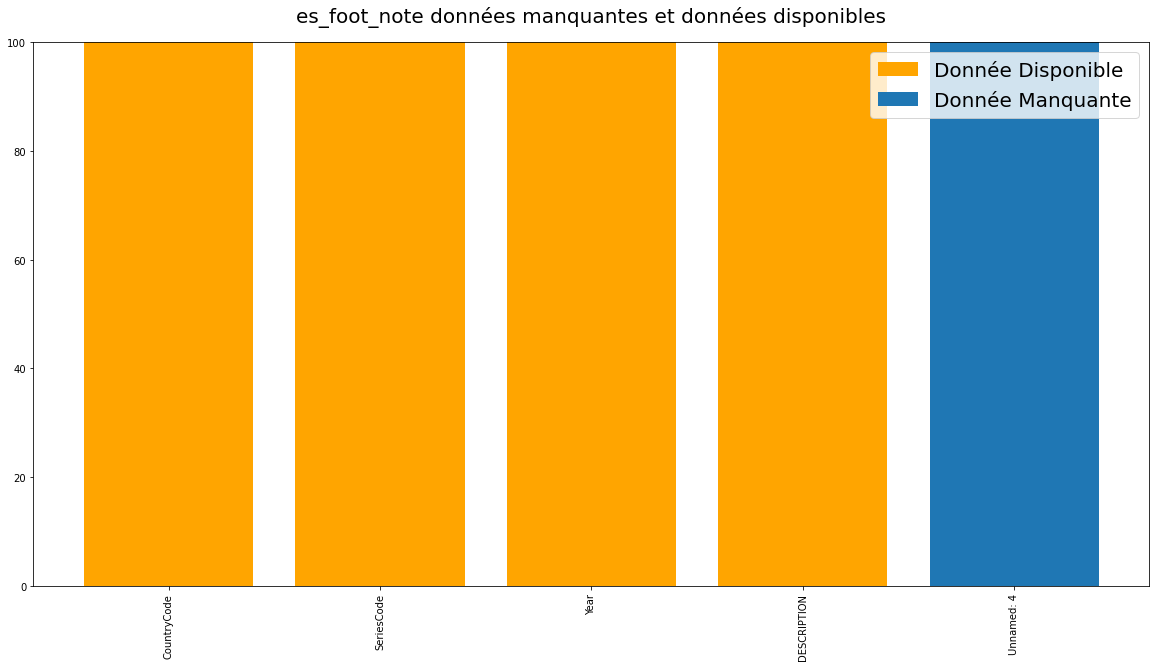

In [33]:
display_bar_nan(es_foot_note, 'es_foot_note')

In [34]:
#on peut supprimer Unnamed: 4
es_foot_note.drop(['Unnamed: 4'], axis = 1, inplace=True)

In [35]:
#on enlève également les YR dans la colonne YR
es_foot_note['Year'] = es_foot_note['Year'].apply(lambda x : x.replace('YR', ''))

In [36]:
es_foot_note.head()

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,2004,Country estimation.
4,ABW,SE.PRE.TCHR,2006,Country estimation.


<h3 id='2'>2. On cherche les indicateurs pour répondre à nos questions</h3>

left_data_series

In [37]:
#on souhaite effectuer une jointure entre es_data et es_series afin de constituer une df qui 
#comporte les informations essentielles dont nous avons besoin 

#on utilise : es_data_bis_whithout_na_result, es_series_bis et es_country_bis

#es_data_bis_whithout_na_result contient les valeurs des agrégats de es_country dans ses pays
#également

es_data_bis_whithout_na_result[
    ~es_data_bis_whithout_na_result['Country Code'].isin(es_country_bis['Country Code'].unique())
]['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'British Virgin Islands'],
      dtype=object)

In [38]:
#on les supprime 
es_data_bis_whithout_na_result = es_data_bis_whithout_na_result[
    es_data_bis_whithout_na_result['Country Code'].isin(es_country_bis['Country Code'].unique())
]

In [39]:
#es_series

#on ne souhaite garder que : 'Series Code', 'Topic', 'Indicator Name','Long definition' de
#es_series_bis : 

es_series_ter = es_series_bis[['Series Code', 'Topic', 'Indicator Name','Long definition']]

#on renome Series Code pour la jointure
es_series_ter = es_series_ter.rename({'Series Code':'Indicator Code'}, axis=1)

es_series_ter.head()

,Indicator Code,Topic,Indicator Name,Long definition
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...


In [40]:
#ex nihilo :

#on formatte les country codes avant d'effectuer notre jointure car les casses ne sont pas 
#identiques partout:
#on uppercase et trim les strings de es_series_bis

es_series_ter['Indicator Code'] = es_series_ter['Indicator Code'].apply(
    lambda x: x.upper().strip())

In [41]:
#on effecture notre jointure 

left_data_series = pd.merge(
    es_data_bis_whithout_na_result,
    es_series_ter,
    on='Indicator Code',
    how='left'
)
left_data_series.head()

,Country Name,Country Code,Indicator Name_x,Indicator Code,Year,Result,Topic,Indicator Name_y,Long definition
0,Afghanistan,AFG,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP.FE,1970,0.11,Attainment,"Barro-Lee: Average years of primary schooling,...","Average years of primary schooling, 15+, femal..."
1,Afghanistan,AFG,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP,1970,0.45,Attainment,"Barro-Lee: Average years of primary schooling,...","Average years of primary schooling, 15+, total..."
2,Afghanistan,AFG,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519.FE,1970,0.32,Attainment,"Barro-Lee: Average years of primary schooling,...","Average years of primary schooling, 15-19, fem..."
3,Afghanistan,AFG,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519,1970,0.90,Attainment,"Barro-Lee: Average years of primary schooling,...","Average years of primary schooling, 15-19, tot..."
4,Afghanistan,AFG,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.2024.FE,1970,0.22,Attainment,"Barro-Lee: Average years of primary schooling,...","Average years of primary schooling, 20-24, fem..."


In [42]:
#quelques données manquent dans Topic du fait de la jointure gauche (choisie pour ne pas 
#perdre de valeur es_data)
show_nan_proportion(left_data_series)

Pourcentage des données manquantes:


Column Country Name has 0.0 % of missing values
Column Country Code has 0.0 % of missing values
Column Indicator Name_x has 0.0 % of missing values
Column Indicator Code has 0.0 % of missing values
Column Year has 0.0 % of missing values
Column Result has 0.0 % of missing values
Column Topic has 0.00027125954990111546 % of missing values
Column Indicator Name_y has 0.00027125954990111546 % of missing values
Column Long definition has 0.00027125954990111546 % of missing values





In [43]:
#Voici les indicateurs : 
left_data_series[left_data_series['Topic'].isna()]['Indicator Name_x'].unique()

array(['Africa Dataset: Teacher attrition rate from public lower secondary education, female (%)',
       'Africa Dataset: Teacher attrition rate from public lower secondary education, male (%)',
       'Africa Dataset: Teacher attrition rate from public upper secondary education, both sexes (%)',
       'Africa Dataset: Teacher attrition rate from public upper secondary education, female (%)',
       'Africa Dataset: Teacher attrition rate from public upper secondary education, male (%)'],
      dtype=object)

In [44]:
#Ainsi que les pays concernés par ceux-ci. 
left_data_series[left_data_series['Topic'].isna()]['Country Name'].unique()

array(['Djibouti', 'Cabo Verde', 'Mali'], dtype=object)

In [45]:
#On pourra les supprimer car ces indicateurs ne concernent que 3 pays

left_data_series = left_data_series[~left_data_series['Topic'].isna()]

In [46]:
#On peut supprimer Indicator Name_x
left_data_series = left_data_series.drop(['Indicator Name_x'], axis=1)

#Et rennommer Indicator Name_y
left_data_series = left_data_series.rename({'Indicator Name_y':'Indicator Name'}, axis=1)

Topics

In [47]:
#On regarde combien d'indicateurs il y a par Topics
topics = left_data_series['Topic'].unique()
for i in topics:
    print(i, ':', left_data_series[left_data_series['Topic'] == i]['Indicator Name'].nunique())

Attainment : 733
Secondary : 256
Primary : 248
Early Childhood Education : 24
Tertiary : 158
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators : 3
Pre-Primary : 14
Health: Mortality : 1
Teachers : 132
Health: Population: Dynamics : 1
Population : 213
Health: Population: Structure : 13
Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators : 2
Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita : 1
Expenditures : 93
Literacy : 32
Infrastructure: Communications : 2
Social Protection & Labor: Labor force structure : 11
Health: Risk factors : 1
Economic Policy & Debt: Purchasing power parity : 6
Education Equality : 426
Social Protection & Labor: Unemployment : 3
Learning Outcomes : 1046
Background : 2
Laber : 3
Post-Secondary/Non-Tertiary : 19
EMIS : 2
Student Assessment (SABER) : 15
Teachers (SABER) : 29
Early Child Development (SABER) : 12
School Autonomy and Accountability (SABER) : 29
Workforc

In [48]:
#On répertorie le nom des Topics dans une liste
left_data_series_topics = left_data_series['Topic'].unique()
left_data_series_topics

array(['Attainment', 'Secondary', 'Primary', 'Early Childhood Education',
       'Tertiary',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Pre-Primary', 'Health: Mortality', 'Teachers',
       'Health: Population: Dynamics', 'Population',
       'Health: Population: Structure',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Expenditures', 'Literacy', 'Infrastructure: Communications',
       'Social Protection & Labor: Labor force structure',
       'Health: Risk factors',
       'Economic Policy & Debt: Purchasing power parity',
       'Education Equality', 'Social Protection & Labor: Unemployment',
       'Learning Outcomes', 'Background', 'Laber',
       'Post-Secondary/Non-Tertiary', 'EMIS',
       'Student Assessment (SABER)', 'Teachers (SABER)',
       'Early Child Development (SAB

In [49]:
#On effectue un premier tri entre les topics à l'aide de Regexp
left_data_series_topics = left_data_series_topics

saber_specification = re.compile('SABER')
health_specification = re.compile('Health:')
economic_specification = re.compile('Economic Policy & Debt')
social_labor_specification = re.compile('Social Protection & Labor:')

topic_saber = [i for i in left_data_series_topics if saber_specification.search(str(i))]
left_data_series_topics = [i for i in left_data_series_topics if i not in topic_saber]

topic_health = [i for i in left_data_series_topics if health_specification.search(str(i))]
left_data_series_topics = [i for i in left_data_series_topics if i not in topic_health]

topic_economic = [i for i in left_data_series_topics if economic_specification.search(str(i))]
left_data_series_topics = [i for i in left_data_series_topics if i not in topic_economic]

topic_social_labor = [i for i in left_data_series_topics if social_labor_specification.search(str(i))]
left_data_series_topics = [i for i in left_data_series_topics if i not in topic_social_labor]

topic_level = ['Early Childhood Education','Pre-Primary', 'Primary', 'Secondary', 'Tertiary', 'Post-Secondary/Non-Tertiary']
left_data_series_topics = [i for i in left_data_series_topics if i not in topic_level]

topic_unclassified = left_data_series_topics

In [50]:
#On réobserve par groupes : 
topic_groups = [topic_saber, topic_health, topic_economic, 
                topic_social_labor, topic_level, topic_unclassified]
topic_groups_name = ['topic_saber', 'topic_health', 'topic_economic', 
                     'topic_social_labor', 'topic_level', 'topic_unclassified']

j = 0
for i in topic_groups:
    name = topic_groups_name[j]
    print(name, ':\n\n', i, '\n\n')
    j += 1 
    

topic_saber :

 ['Student Assessment (SABER)', 'Teachers (SABER)', 'Early Child Development (SABER)', 'School Autonomy and Accountability (SABER)', 'Workforce Development (SABER)', 'School Finance (SABER)', 'Engaging the Private Sector (SABER)', 'School Health and School Feeding (SABER)', 'Education Management Information Systems (SABER)', 'Tertiary Education (SABER)'] 


topic_health :

 ['Health: Mortality', 'Health: Population: Dynamics', 'Health: Population: Structure', 'Health: Risk factors'] 


topic_economic :

 ['Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators', 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators', 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita', 'Economic Policy & Debt: Purchasing power parity'] 


topic_social_labor :

 ['Social Protection & Labor: Labor force structure', 'Social Protection & Labor: Unemployment'] 


topic_level :

 ['Early Childhood Educa

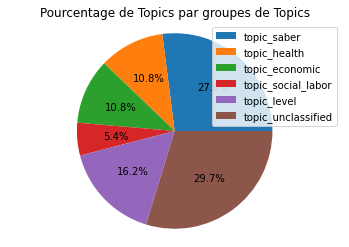

In [51]:
#On visualise : 

percentage_of_all_topics = []

for i in topic_groups:
    percentage_of_all_topics.append((len(i)/left_data_series['Topic'].nunique())*100)

plt.pie(percentage_of_all_topics, autopct='%0.1f%%')
plt.axis('equal')
plt.legend(topic_groups_name)
plt.title('Pourcentage de Topics par groupes de Topics')
plt.show()

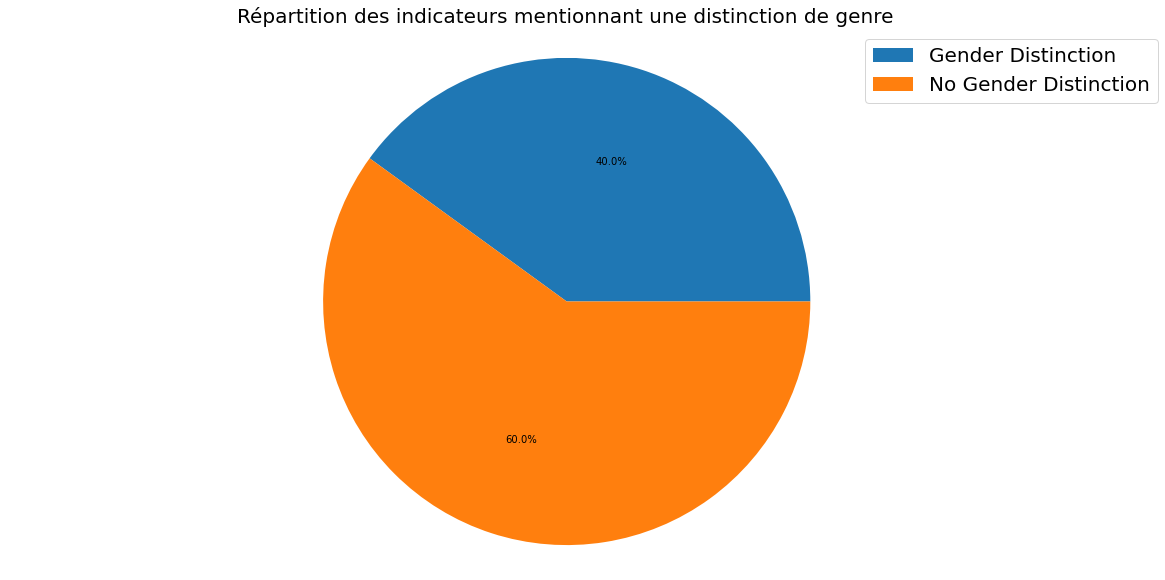

In [52]:
#Avant de passer au crible les topics qui nous intéressent on souhaite démontrer
#par la visualisation de graphiques l'intérêt de certains filtres que nous avons conçus comme : 

#le filtre par genre

specifications = re.compile('male|female|Male|Female')
z = 0
for i in left_data_series['Indicator Name'].unique():
    if specifications.search(i): z+=1
    else: pass


gender_percentages = [
(z/left_data_series['Indicator Name'].nunique())*100, 
 100 - (z/left_data_series['Indicator Name'].nunique()*100)
]

gender_labels = ['Gender Distinction', 'No Gender Distinction']
plt.figure(figsize=(20,10))
patches, texts, autotexts = plt.pie(gender_percentages, autopct='%0.1f%%')

####for j in autotexts: j.set_color(font_txt)


plt.axis('equal')

leg = plt.legend(
    gender_labels,
    fontsize=font_sizes,
    ####facecolor=legend_background,
    bbox_to_anchor=(1.04,1)
)

####for j in leg.get_texts(): j.set_color(font_txt)

plt.title(
    'Répartition des indicateurs mentionnant une distinction de genre',
    fontsize=font_sizes,
    ####color=font_txt
)

####plt.savefig('./SavedGraphs/index.png', transparent=True)

plt.show()

#40% des indicateurs mentionnent un genre, une distinction qui ne nous intéressera pas pour
#la formulation de notre réponse

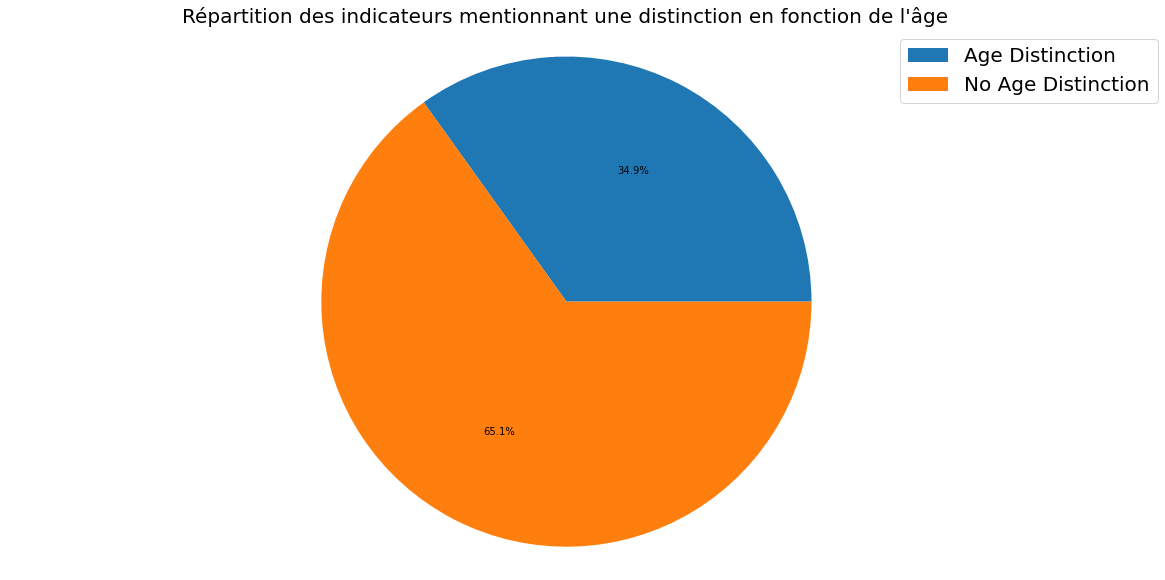

In [53]:
#par age

specifications = re.compile('age|Age')
specifications_bis = re.compile('average|Average')

e = 0
for i in left_data_series['Indicator Name'].unique():
    if specifications_bis.search(i): pass
    elif specifications.search(i): e+=1
    else: pass

age_percentages = [
(e/left_data_series['Indicator Name'].nunique())*100, 
 100 - (e/left_data_series['Indicator Name'].nunique()*100)
]

age_labels = ['Age Distinction', 'No Age Distinction']


plt.figure(figsize=(20,10))

patches, texts, autotexts = plt.pie(age_percentages, autopct='%0.1f%%')

####for j in autotexts: j.set_color(font_txt)
    
plt.axis('equal')

leg = plt.legend(
    age_labels,
    fontsize=font_sizes,
    ####facecolor=legend_background,
    bbox_to_anchor=(1.04,1)
)

####for j in leg.get_texts(): j.set_color(font_txt)
    
plt.title('Répartition des indicateurs mentionnant une distinction en fonction de l\'âge',
          fontsize=font_sizes,
          ####color=font_txt
         )
####plt.savefig('./SavedGraphs/index.png', transparent=True)

plt.show()

#34.9% des données contiennent une distinction d'age ou de tranche d'age or, Academy vise
#le niveau lycée et Université (et pas l'âge !) 

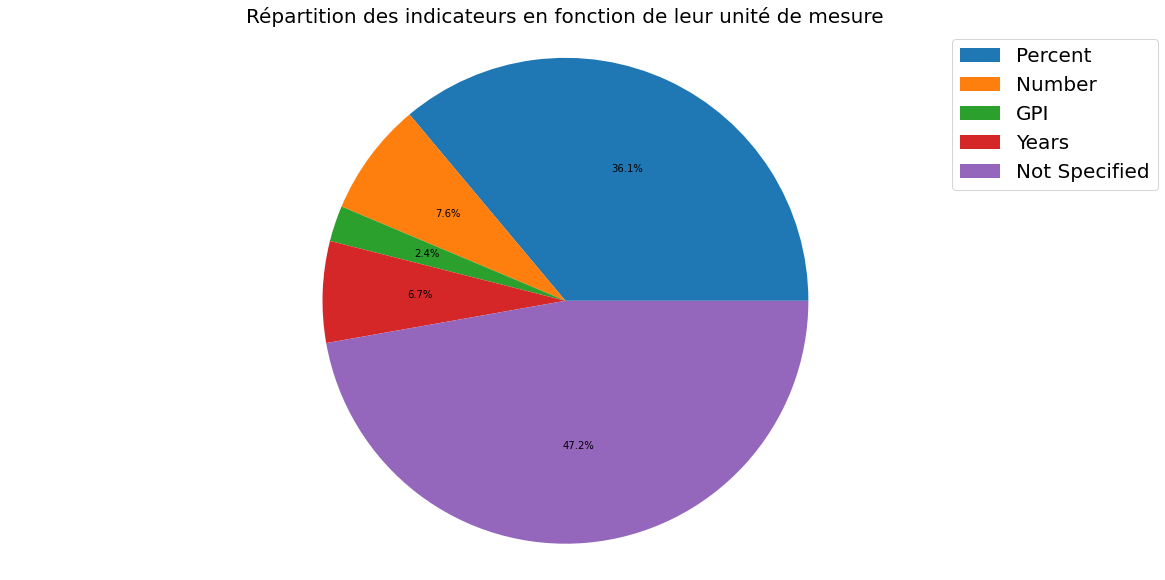

In [54]:
#par unité de mesure
percent_symbol = re.compile('(%)')
number_symbol = re.compile('(number)')
gpi_symbol = re.compile('(GPI)')
years_symbol = re.compile('(years)')

m = 0
n = 0
o = 0
p = 0
q = 0
for i in left_data_series['Indicator Name'].unique():
    if percent_symbol.search(i): m += 1
    elif number_symbol.search(i): n += 1
    elif gpi_symbol.search(i): o += 1
    elif years_symbol.search(i): p += 1
    else: q += 1 
    
unity_name = ['Percent', 'Number', 'GPI', 'Years', 'Not Specified']

unity_percentages = [
    (m/left_data_series['Indicator Name'].nunique())*100,
    (n/left_data_series['Indicator Name'].nunique())*100,
    (o/left_data_series['Indicator Name'].nunique())*100,
    (p/left_data_series['Indicator Name'].nunique())*100,
    (q/left_data_series['Indicator Name'].nunique())*100,
]

plt.figure(figsize=(20,10))

patches, texts, autotexts = plt.pie(
    unity_percentages, 
    autopct='%0.1f%%',
)

####for j in autotexts: j.set_color(font_txt)

plt.axis('equal')

leg = plt.legend(
    unity_name, 
    fontsize=font_sizes,
    ####facecolor=legend_background,
    bbox_to_anchor=(1.04,1)
)

####for j in leg.get_texts(): j.set_color(font_txt)
    
plt.title('Répartition des indicateurs en fonction de leur unité de mesure', 
          fontsize=font_sizes,
          ####color=font_txt
         )

####plt.savefig('./SavedGraphs/index.png', transparent=True)

plt.show()

Indicateur Education

In [55]:
#On s'affaire sur les Topics secondary, tertiary et secondary non tertiary car Academy vise les 
#lycées et Universités 

#nb : on rappelle que secondary inclus collège et lycées (comme en France par exemple)
#lycée équivaut à upper secondary et pas tout le secondary 

In [56]:
secondary_indicators = show_indicators('Secondary')
secondary_indicators

array(['Enrolment in Grade 1 of lower secondary general education, both sexes (number)',
       'Enrolment in Grade 1 of lower secondary general education, female (number)',
       'Enrolment in Grade 2 of lower secondary general education, both sexes (number)',
       'Enrolment in Grade 2 of lower secondary general education, female (number)',
       'Enrolment in Grade 3 of lower secondary general education, both sexes (number)',
       'Enrolment in Grade 3 of lower secondary general education, female (number)',
       'Enrolment in secondary education, both sexes (number)',
       'Enrolment in secondary education, female (number)',
       'Enrolment in secondary general, both sexes (number)',
       'Enrolment in secondary general, female (number)',
       'Enrolment in secondary vocational, both sexes (number)',
       'Enrolment in secondary vocational, female (number)',
       'Gross enrolment ratio, primary and secondary, both sexes (%)',
       'Gross enrolment ratio, primar

In [57]:
secondary_indicators_non_tertiary = show_indicators('Post-Secondary/Non-Tertiary')
secondary_indicators_non_tertiary

array(['Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)',
       'Gross enrolment ratio, post-secondary non-tertiary, female (%)',
       'Gross enrolment ratio, post-secondary non-tertiary, gender parity index (GPI)',
       'Gross enrolment ratio, post-secondary non-tertiary, male (%)',
       'Percentage of female students in post-secondary non-tertiary education enrolled in vocational programmes, female (%)',
       'Percentage of male students in post-secondary non-tertiary education enrolled in vocational programmes, male (%)',
       'Percentage of students in post-secondary non-tertiary education enrolled in vocational programmes, both sexes (%)',
       'Percentage of students in post-secondary non-tertiary vocational education who are female (%)',
       'School life expectancy, post-secondary non-tertiary, both sexes (years)',
       'School life expectancy, post-secondary non-tertiary, female (years)',
       'School life expectancy, post-secondary non-te

In [58]:
#note : on a supprimé une partie infructueuse avec une variable nommée
#tertiary_indicators d'où le "bis" ici

tertiary_indicators_bis = show_indicators('Tertiary')
tertiary_indicators_bis

array(['Enrolment in tertiary education per 100,000 inhabitants, both sexes',
       'Enrolment in tertiary education per 100,000 inhabitants, female',
       'Enrolment in tertiary education per 100,000 inhabitants, male',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Enrolment in tertiary education, all programmes, female (number)',
       'Gross enrolment ratio, primary to tertiary, both sexes (%)',
       'Gross enrolment ratio, primary to tertiary, female (%)',
       'Gross enrolment ratio, primary to tertiary, gender parity index (GPI)',
       'Gross enrolment ratio, primary to tertiary, male (%)',
       'Gross enrolment ratio, tertiary, both sexes (%)',
       'Gross enrolment ratio, tertiary, female (%)',
       'Gross enrolment ratio, tertiary, gender parity index (GPI)',
       'Gross enrolment ratio, tertiary, male (%)',
       'Percentage of students in tertiary education who are female (%)',
       'School life expectancy, primar

In [59]:
#on commence par supprimer les dicriminations de genre

secondary_indicators = remove_gender_dicrimination(secondary_indicators)
secondary_indicators_non_tertiary = remove_gender_dicrimination(secondary_indicators_non_tertiary)
tertiary_indicators_bis = remove_gender_dicrimination(tertiary_indicators_bis)

In [60]:
#on a créé des fonction (qu'on retrouve en haut de ce notebook) qui permettent de filtrer
#chaque Topic par des spécifications récurrentes : 

#même unités de mesures : (%), (number), (GPI), (years)

#On remarque que notre business sera dans la sphère privée et on souhaiterait 
#dans l'idéal avoir des informations sur la distinction privée publique

# pas besoin de secondary lower (équivalent collège en France) car notre business 
#vise le lycée et les universités

Secondary

In [61]:
secondary_indicators

['Enrolment in Grade 1 of lower secondary general education, both sexes (number)',
 'Enrolment in Grade 2 of lower secondary general education, both sexes (number)',
 'Enrolment in Grade 3 of lower secondary general education, both sexes (number)',
 'Enrolment in secondary education, both sexes (number)',
 'Enrolment in secondary general, both sexes (number)',
 'Enrolment in secondary vocational, both sexes (number)',
 'Gross enrolment ratio, primary and secondary, both sexes (%)',
 'Gross enrolment ratio, primary and secondary, gender parity index (GPI)',
 'Gross enrolment ratio, secondary, both sexes (%)',
 'Gross enrolment ratio, secondary, gender parity index (GPI)',
 'Official entrance age to lower secondary education (years)',
 'Percentage of students in secondary education enrolled in general programmes, both sexes (%)',
 'Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)',
 'School life expectancy, primary and secondary, both sexes 

In [62]:
#on filtre par unités de mesure
secondary_indicators_percentages = filter_indicators_by_measurement(secondary_indicators, 'percent')

secondary_indicators_number = filter_indicators_by_measurement(secondary_indicators, 'number')

secondary_indicators_gpi = filter_indicators_by_measurement(secondary_indicators, 'gpi')

secondary_indicators_years = filter_indicators_by_measurement(secondary_indicators, 'years')

print(len(secondary_indicators_percentages) + len(secondary_indicators_number) + len(secondary_indicators_gpi) + len(secondary_indicators_years))
print(len(secondary_indicators))

116
116


In [63]:
#on filtre par niveau
secondary_indicators_percentages_upper = filter_indicator_by_level(secondary_indicators_percentages, 'secondary')

secondary_indicators_number_upper = filter_indicator_by_level(secondary_indicators_number, 'secondary')

secondary_indicators_gpi_upper = filter_indicator_by_level(secondary_indicators_gpi, 'secondary')

secondary_indicators_years_upper = filter_indicator_by_level(secondary_indicators_years, 'secondary')

In [64]:
#on filtre par privé public 
print(filter_private_public_from_indicators(secondary_indicators_percentages_upper))
#['Percentage of enrolment in upper secondary education in private institutions (%)']
print(filter_private_public_from_indicators(secondary_indicators_number_upper))
#[['Enrolment in upper secondary education, public institutions, both sexes (number)'], 
#['Enrolment in upper secondary education, private institutions, both sexes (number)']]
print(filter_private_public_from_indicators(secondary_indicators_gpi_upper))
print(filter_private_public_from_indicators(secondary_indicators_years_upper))


[[], ['Percentage of enrolment in upper secondary education in private institutions (%)']]
[['Enrolment in upper secondary education, public institutions, both sexes (number)'], ['Enrolment in upper secondary education, private institutions, both sexes (number)']]
[[], []]
[[], []]


In [65]:
#on étudie notre sélection
show_indicators_rows(secondary_indicators_number_upper)

Out-of-school youth of upper secondary school age, both sexes (number) compte : 1489 lignes
Enrolment in upper secondary education, both sexes (number) compte : 2386 lignes
Enrolment in upper secondary education, public institutions, both sexes (number) compte : 1990 lignes
Enrolment in upper secondary general, both sexes (number) compte : 2545 lignes
Enrolment in upper secondary vocational, both sexes (number) compte : 1912 lignes
Enrolment in upper secondary education, private institutions, both sexes (number) compte : 1856 lignes


In [66]:
show_indicators_rows(secondary_indicators_percentages_upper)

Gross enrolment ratio, upper secondary, both sexes (%) compte : 2791 lignes
Percentage of enrolment in upper secondary education in private institutions (%) compte : 1845 lignes
Percentage of students in upper secondary education enrolled in general programmes, both sexes (%) compte : 2381 lignes
Percentage of students in upper secondary education enrolled in vocational programmes, both sexes (%) compte : 1983 lignes
Rate of out-of-school youth of upper secondary school age, both sexes (%) compte : 1489 lignes
Adjusted net enrolment rate, upper secondary, both sexes (%) compte : 773 lignes
Net enrolment rate, upper secondary, both sexes (%) compte : 773 lignes


In [67]:
show_indicators_rows(secondary_indicators_number_upper)

Out-of-school youth of upper secondary school age, both sexes (number) compte : 1489 lignes
Enrolment in upper secondary education, both sexes (number) compte : 2386 lignes
Enrolment in upper secondary education, public institutions, both sexes (number) compte : 1990 lignes
Enrolment in upper secondary general, both sexes (number) compte : 2545 lignes
Enrolment in upper secondary vocational, both sexes (number) compte : 1912 lignes
Enrolment in upper secondary education, private institutions, both sexes (number) compte : 1856 lignes


In [68]:
show_indicators_rows(secondary_indicators_years_upper)

Theoretical duration of upper secondary education (years) compte : 9464 lignes
Official entrance age to upper secondary education (years) compte : 3669 lignes


In [69]:
selection_indicators_secondary = [
    'Enrolment in upper secondary education, both sexes (number)', #1999 - 2015 ; 2376 lignes
    
    #Pour plus de granularité on pourra se pencher sur : 
    'Theoretical duration of upper secondary education (years)', 
    #1970-2016 ; 9417 lignes utile pour avoir valeur 
    'Percentage of enrolment in upper secondary education in private institutions (%)'
    #1998-2015 #1844 lignes
]

Tertiary

In [70]:
tertiary_indicators_bis

['Enrolment in tertiary education per 100,000 inhabitants, both sexes',
 'Enrolment in tertiary education, all programmes, both sexes (number)',
 'Gross enrolment ratio, primary to tertiary, both sexes (%)',
 'Gross enrolment ratio, primary to tertiary, gender parity index (GPI)',
 'Gross enrolment ratio, tertiary, both sexes (%)',
 'Gross enrolment ratio, tertiary, gender parity index (GPI)',
 'School life expectancy, primary to tertiary, both sexes (years)',
 'School life expectancy, primary to tertiary, gender parity index (GPI)',
 'School life expectancy, tertiary, both sexes (years)',
 'School life expectancy, tertiary, gender parity index (GPI)',
 'Graduates from tertiary education, both sexes (number)',
 'Gross outbound enrolment ratio, all regions, both sexes (%)',
 'Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)',
 'Inbound mobility rate, both sexes (%)',
 'Net flow of internationally mobile students (inbound - outbo

In [71]:
#Rappel : déjà filtré par genre, on filtre ici par mesures 
#on filtre par unités de mesure

tertiary_indicators_bis_percentages = filter_indicators_by_measurement(tertiary_indicators_bis, 'percent')

tertiary_indicators_bis_number = filter_indicators_by_measurement(tertiary_indicators_bis, 'number')

tertiary_indicators_bis_gpi = filter_indicators_by_measurement(tertiary_indicators_bis, 'gpi')

tertiary_indicators_bis_years = filter_indicators_by_measurement(tertiary_indicators_bis, 'years')

print(len(tertiary_indicators_bis_percentages) + len(tertiary_indicators_bis_number) + len(tertiary_indicators_bis_gpi) + len(tertiary_indicators_bis_years))
print(len(tertiary_indicators_bis))

54
55


In [72]:
print(tertiary_indicators_bis_percentages, '\n\n')
print(tertiary_indicators_bis_gpi, '\n\n')
print(tertiary_indicators_bis_years, '\n\n')
#'School life expectancy, tertiary, both sexes (years)' #5129 lignes
print(tertiary_indicators_bis_number, '\n\n')
#'Enrolment in tertiary education, all programmes, both sexes (number)' #5475 lignes
#'Enrolment in post-secondary non-tertiary education, both sexes (number)' #1219

['Gross enrolment ratio, primary to tertiary, both sexes (%)', 'Gross enrolment ratio, tertiary, both sexes (%)', 'Gross outbound enrolment ratio, all regions, both sexes (%)', 'Inbound mobility rate, both sexes (%)', 'Net flow ratio of internationally mobile students (inbound - outbound), both sexes (%)', 'Outbound mobility ratio, all regions, both sexes (%)', 'Percentage of all students in tertiary education enrolled in ISCED 5, both sexes (%)', 'Percentage of all students in tertiary education enrolled in ISCED 8, both sexes (%)', 'Percentage of enrolment in tertiary education in private institutions (%)', 'Percentage of students in tertiary education enrolled in Agriculture programmes, both sexes (%)', 'Percentage of students in tertiary education enrolled in Education programmes, both sexes (%)', 'Percentage of students in tertiary education enrolled in Engineering, Manufacturing and Construction programmes, both sexes (%)', 'Percentage of students in tertiary education enrolled i

In [73]:
#on filtre par privé public
print(filter_private_public_from_indicators(tertiary_indicators_bis_percentages)) 
#'Percentage of enrolment in tertiary education in private institutions (%)'
#1503 lignes 
print(filter_private_public_from_indicators(tertiary_indicators_bis_gpi))
print(filter_private_public_from_indicators(tertiary_indicators_bis_years))
print(filter_private_public_from_indicators(tertiary_indicators_bis_number))


[[], ['Percentage of enrolment in tertiary education in private institutions (%)']]
[[], []]
[[], []]
[['Enrolment in post-secondary non-tertiary education, public institutions, both sexes (number)'], []]


In [74]:
#On vérifie le nombre de ligne avec show_indicators_rows() et on le repporte à côté 
#des commentaires ci-dessus

show_indicators_rows(tertiary_indicators_bis_number)

Enrolment in tertiary education, all programmes, both sexes (number) compte : 5468 lignes
Graduates from tertiary education, both sexes (number) compte : 3538 lignes
Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number) compte : 3139 lignes
Net flow of internationally mobile students (inbound - outbound), both sexes (number) compte : 1388 lignes
Enrolment in tertiary education, ISCED 5 programmes, both sexes (number) compte : 1530 lignes
Total inbound internationally mobile students, both sexes (number) compte : 1345 lignes
Enrolment in tertiary education, ISCED 8 programmes, both sexes (number) compte : 1378 lignes
Enrolment in post-secondary non-tertiary education, both sexes (number) compte : 1225 lignes
Graduates from ISCED 5 programmes in tertiary education, both sexes (number) compte : 1168 lignes
Enrolment in post-secondary non-tertiary education, public institutions, both sexes (number) compte : 1062 lignes
Graduates from IS

In [75]:
#on rapporte l'interval de l'ensemble années pour chacun des indicateurs
#on rapporte également celui de 'Percentage of enrolment in upper secondary education in 
#private institutions (%)' dans selection_indicators_secondary

ind = 'Percentage of enrolment in tertiary education in private institutions (%)'

print(left_data_series[left_data_series['Indicator Name'] == ind]['Year'].max())
print(left_data_series[left_data_series['Indicator Name'] == ind]['Year'].min())

2016
1998


In [76]:
#on sélectionne 
selection_indicators_tertiary = [
    'Enrolment in tertiary education, all programmes, both sexes (number)', 
    #5475 lignes #1970-2016
    'Enrolment in post-secondary non-tertiary education, both sexes (number)',
    #1219 lignes #1999-2015
    
    
    #Pour plus de granularité on pourra se pencher sur : 
    'School life expectancy, tertiary, both sexes (years)',
    #5129 lignes #1970-2015
    'Percentage of enrolment in tertiary education in private institutions (%)',
    #1503 lignes #1998-2015
]

Post Secondary Non Tertiary

In [77]:
#On se rappelle que la discrimination de genre à déjà été supprimée

secondary_indicators_non_tertiary

#on pourra retenir : 
#'Percentage of enrolment in post-secondary non-tertiary education in private institutions (%)'
#'School life expectancy, post-secondary non-tertiary, both sexes (years)'

['Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)',
 'Gross enrolment ratio, post-secondary non-tertiary, gender parity index (GPI)',
 'Percentage of students in post-secondary non-tertiary education enrolled in vocational programmes, both sexes (%)',
 'School life expectancy, post-secondary non-tertiary, both sexes (years)',
 'School life expectancy, post-secondary non-tertiary, gender parity index (GPI)',
 'Percentage of enrolment in post-secondary non-tertiary education in private institutions (%)',
 'Percentage of students in post-secondary non-tertiary education enrolled in general programmes, both sexes (%)',
 'Enrolment in post-secondary non-tertiary education, private institutions, both sexes (number)']

In [78]:
#ici on regarde le nombre de lignes par indicateurs 
show_indicators_rows(secondary_indicators_non_tertiary)

Gross enrolment ratio, post-secondary non-tertiary, both sexes (%) compte : 1188 lignes
Gross enrolment ratio, post-secondary non-tertiary, gender parity index (GPI) compte : 1138 lignes
Percentage of students in post-secondary non-tertiary education enrolled in vocational programmes, both sexes (%) compte : 1059 lignes
School life expectancy, post-secondary non-tertiary, both sexes (years) compte : 1210 lignes
School life expectancy, post-secondary non-tertiary, gender parity index (GPI) compte : 1161 lignes
Percentage of enrolment in post-secondary non-tertiary education in private institutions (%) compte : 671 lignes
Percentage of students in post-secondary non-tertiary education enrolled in general programmes, both sexes (%) compte : 528 lignes
Enrolment in post-secondary non-tertiary education, private institutions, both sexes (number) compte : 674 lignes


In [79]:
#on regarde avec discrimination de genre 
show_indicators('Post-Secondary/Non-Tertiary')

#nb le nombre d'inscriptions (enrollment) se trouve dans tertiary 
#c.f 'Enrolment in post-secondary non-tertiary education, both sexes (number)'

array(['Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)',
       'Gross enrolment ratio, post-secondary non-tertiary, female (%)',
       'Gross enrolment ratio, post-secondary non-tertiary, gender parity index (GPI)',
       'Gross enrolment ratio, post-secondary non-tertiary, male (%)',
       'Percentage of female students in post-secondary non-tertiary education enrolled in vocational programmes, female (%)',
       'Percentage of male students in post-secondary non-tertiary education enrolled in vocational programmes, male (%)',
       'Percentage of students in post-secondary non-tertiary education enrolled in vocational programmes, both sexes (%)',
       'Percentage of students in post-secondary non-tertiary vocational education who are female (%)',
       'School life expectancy, post-secondary non-tertiary, both sexes (years)',
       'School life expectancy, post-secondary non-tertiary, female (years)',
       'School life expectancy, post-secondary non-te

In [80]:
filter_indicator_by_level(tertiary_indicators_bis, 'tertiary')
#On revérifie isced4 dans tertiary car est relatif au post-secondaruy non-tertiary

['Percentage of all students in tertiary education enrolled in ISCED 5, both sexes (%)',
 'Percentage of all students in tertiary education enrolled in ISCED 8, both sexes (%)',
 'Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, both sexes (%)',
 'Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, gender parity index (GPI)',
 'Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)',
 'Enrolment in tertiary education, ISCED 8 programmes, both sexes (number)',
 'Graduates from ISCED 5 programmes in tertiary education, both sexes (number)',
 'Graduates from ISCED 8 programmes in tertiary education, both sexes (number)',
 'Enrolment in tertiary education, ISCED 6 programmes, both sexes (number)',
 'Graduates from ISCED 6 programmes in tertiary education, both sexes (number)',
 'Percentage of all students in tertiary education enrolled in ISCED 6, both sexes (%)',
 'Enrolment in tertiary educ

In [81]:
#On récapitule et ajoute les indicateurs retenus

selection_indicators_secondary = [
    'Enrolment in upper secondary education, both sexes (number)', #1999 - 2015 ; 2376 lignes
    
    #Pour plus de granularité on pourra se pencher sur : 
    'Theoretical duration of upper secondary education (years)', 
    #1970-2016 ; 9417 lignes utile pour avoir valeur 
    'Percentage of enrolment in upper secondary education in private institutions (%)'
    #1998-2015 #1844 lignes
]


selection_indicators_tertiary = [
    'Enrolment in tertiary education, all programmes, both sexes (number)', 
    #5475 lignes #1970-2016
    'Enrolment in post-secondary non-tertiary education, both sexes (number)',
    #1219 lignes #1999-2015
    
    #Pour plus de granularité on pourra se pencher sur : 
    'School life expectancy, tertiary, both sexes (years)',
    #5129 lignes #1970-2015
    'Percentage of enrolment in tertiary education in private institutions (%)',
    #1503 lignes #1998-2015
    #nous pousse à ajouter la mesure en % dans selection_indicators_secondary
]

#ajout ici : 
selection_indicators_non_tertiary = [
    'Percentage of enrolment in post-secondary non-tertiary education in private institutions (%)',
    #670 lignes
    'School life expectancy, post-secondary non-tertiary, both sexes (years)'
    #1209 lignes
]

Indicateur Economique

In [82]:
#Topics intéressants 
#on a créé des subdivisions de topics afin d'évaluer par parties nos indicateurs


economic_topics_group = [ 
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators', 
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators', 
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita', 
 'Economic Policy & Debt: Purchasing power parity',
 
] 

labor_topics_group = [
 'Social Protection & Labor: Unemployment',
 'Social Protection & Labor: Labor force structure',
]

expenditures_topics_group = [
    'Expenditures'
]

In [83]:
#on regroupé tous les indicateurs économiques
economic_topics_group_all = return_all_indicators_from_several_lists(economic_topics_group)

In [84]:
economic_topics_group_all

['GDP (current US$)',
 'GDP per capita (current US$)',
 'GNI (current US$)',
 'GDP (constant 2010 US$)',
 'GDP per capita (constant 2010 US$)',
 'GNI per capita, Atlas method (current US$)',
 'GDP per capita, PPP (constant 2011 international $)',
 'GDP per capita, PPP (current international $)',
 'GDP, PPP (constant 2011 international $)',
 'GDP, PPP (current international $)',
 'GNI per capita, PPP (current international $)',
 'GNI, PPP (current international $)']

In [85]:
show_indicators_rows(economic_topics_group_all)

GDP (current US$) compte : 8101 lignes
GDP per capita (current US$) compte : 8098 lignes
GNI (current US$) compte : 7723 lignes
GDP (constant 2010 US$) compte : 7765 lignes
GDP per capita (constant 2010 US$) compte : 7762 lignes
GNI per capita, Atlas method (current US$) compte : 7356 lignes
GDP per capita, PPP (constant 2011 international $) compte : 4946 lignes
GDP per capita, PPP (current international $) compte : 4941 lignes
GDP, PPP (constant 2011 international $) compte : 4949 lignes
GDP, PPP (current international $) compte : 4944 lignes
GNI per capita, PPP (current international $) compte : 4803 lignes
GNI, PPP (current international $) compte : 4806 lignes


In [86]:
show_min_max_year_per_indicators(economic_topics_group_all)

GDP (current US$) : [ 1970 ; 2016 ]
GDP per capita (current US$) : [ 1970 ; 2016 ]
GNI (current US$) : [ 1970 ; 2016 ]
GDP (constant 2010 US$) : [ 1970 ; 2016 ]
GDP per capita (constant 2010 US$) : [ 1970 ; 2016 ]
GNI per capita, Atlas method (current US$) : [ 1970 ; 2016 ]
GDP per capita, PPP (constant 2011 international $) : [ 1990 ; 2016 ]
GDP per capita, PPP (current international $) : [ 1990 ; 2016 ]
GDP, PPP (constant 2011 international $) : [ 1990 ; 2016 ]
GDP, PPP (current international $) : [ 1990 ; 2016 ]
GNI per capita, PPP (current international $) : [ 1990 ; 2016 ]
GNI, PPP (current international $) : [ 1990 ; 2016 ]


In [87]:
gdp_specification = re.compile('GDP')

economic_topics_group_gdp = []

for i in economic_topics_group_all:
    if gdp_specification.search(i):
        economic_topics_group_gdp.append(i)
    else: pass
    
economic_topics_group_gni = [i for i in economic_topics_group_all if i not in economic_topics_group_gdp]

In [88]:
economic_topics_group_gdp

['GDP (current US$)',
 'GDP per capita (current US$)',
 'GDP (constant 2010 US$)',
 'GDP per capita (constant 2010 US$)',
 'GDP per capita, PPP (constant 2011 international $)',
 'GDP per capita, PPP (current international $)',
 'GDP, PPP (constant 2011 international $)',
 'GDP, PPP (current international $)']

In [89]:
economic_topics_group_gni

['GNI (current US$)',
 'GNI per capita, Atlas method (current US$)',
 'GNI per capita, PPP (current international $)',
 'GNI, PPP (current international $)']

In [90]:
show_min_max_year_per_indicators(economic_topics_group_gdp)

GDP (current US$) : [ 1970 ; 2016 ]
GDP per capita (current US$) : [ 1970 ; 2016 ]
GDP (constant 2010 US$) : [ 1970 ; 2016 ]
GDP per capita (constant 2010 US$) : [ 1970 ; 2016 ]
GDP per capita, PPP (constant 2011 international $) : [ 1990 ; 2016 ]
GDP per capita, PPP (current international $) : [ 1990 ; 2016 ]
GDP, PPP (constant 2011 international $) : [ 1990 ; 2016 ]
GDP, PPP (current international $) : [ 1990 ; 2016 ]


In [91]:
show_min_max_year_per_indicators(economic_topics_group_gni)

GNI (current US$) : [ 1970 ; 2016 ]
GNI per capita, Atlas method (current US$) : [ 1970 ; 2016 ]
GNI per capita, PPP (current international $) : [ 1990 ; 2016 ]
GNI, PPP (current international $) : [ 1990 ; 2016 ]


In [92]:
#On sélectionne : 
#nb : pas d'indice de gini, difficile d'appréhender la répartition des richesses des pays

selection_indicators_economic_topics_group = [
    #gni 
    'GNI per capita, PPP (current international $)', #niveau de vie
    'GNI, PPP (current international $)', #richesse pays comparable
    'GNI per capita, Atlas method (current US$)', #niveau de vie
    #gdp, pour comparaison de tendances fgrace au volume
    'GDP per capita, PPP (constant 2011 international $)', #niveau de vie
    'GDP, PPP (constant 2011 international $)',#richesse pays comparable
]

Indicateur Technologique

In [93]:
#on a deux indicateurs technologiques disponibles

infrastructure_indicators = show_indicators('Infrastructure: Communications')
infrastructure_indicators

array(['Internet users (per 100 people)',
       'Personal computers (per 100 people)'], dtype=object)

In [94]:
show_indicators_rows(infrastructure_indicators)
#internet users à plus de données

Internet users (per 100 people) compte : 4832 lignes
Personal computers (per 100 people) compte : 2390 lignes


In [95]:
internet_users = left_data_series[left_data_series['Indicator Name'] == 'Internet users (per 100 people)']
internet_users.head()

,Country Name,Country Code,Indicator Code,Year,Result,Topic,Indicator Name,Long definition
7412,Botswana,BWA,IT.NET.USER.P2,1970,0.0,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...
9381,Burundi,BDI,IT.NET.USER.P2,1970,0.0,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...
23147,Grenada,GRD,IT.NET.USER.P2,1970,0.0,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...
38140,Maldives,MDV,IT.NET.USER.P2,1970,0.0,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...
59745,Syrian Arab Republic,SYR,IT.NET.USER.P2,1970,0.0,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...


<Figure size 432x288 with 0 Axes>

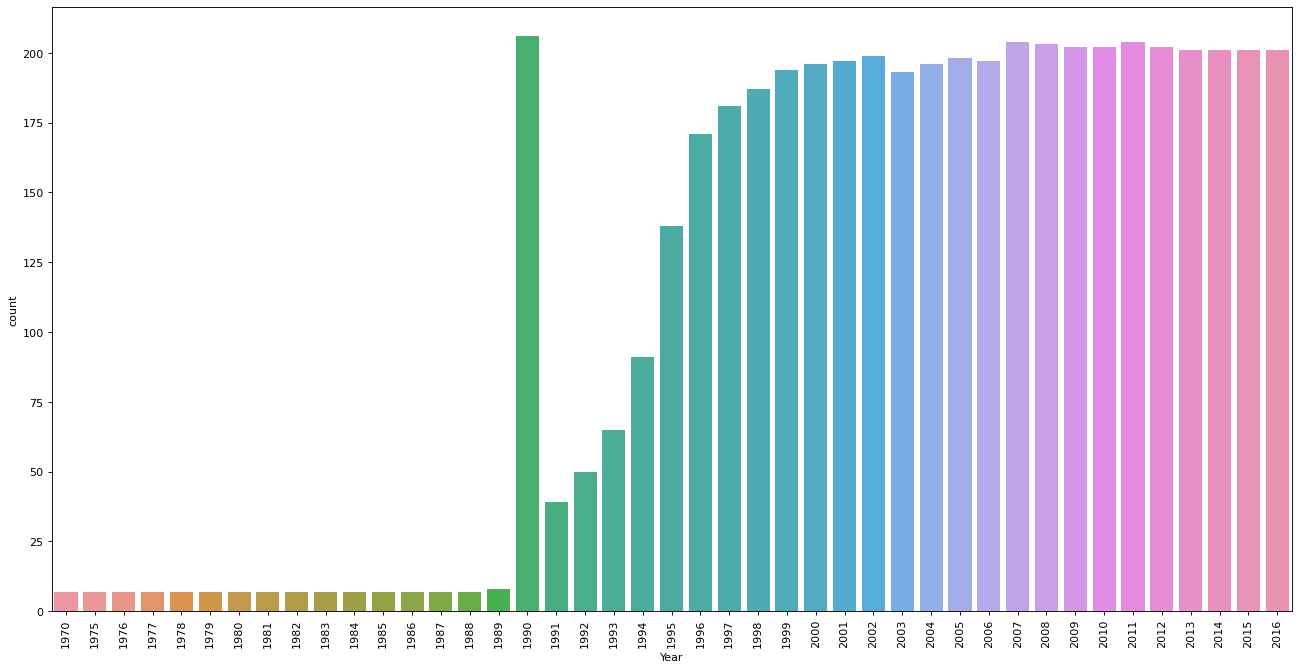

In [96]:
#on visualise
plt.clf()
plt.figure(figsize=(20,10), dpi=80)
ax = plt.subplot()
sns.countplot(data = internet_users, x = 'Year')
ax.set_xticks(range(internet_users['Year'].nunique()))
ax.set_xticklabels(labels = internet_users['Year'].unique(), rotation=90)
plt.show()

In [97]:
personal_computers = left_data_series[left_data_series['Indicator Name'] == 'Personal computers (per 100 people)']
personal_computers.head()

,Country Name,Country Code,Indicator Code,Year,Result,Topic,Indicator Name,Long definition
12958,Comoros,COM,IT.CMP.PCMP.P2,1970,0.0,Infrastructure: Communications,Personal computers (per 100 people),Personal computers are self-contained computer...
210679,Comoros,COM,IT.CMP.PCMP.P2,1975,0.0,Infrastructure: Communications,Personal computers (per 100 people),Personal computers are self-contained computer...
284610,Comoros,COM,IT.CMP.PCMP.P2,1976,0.0,Infrastructure: Communications,Personal computers (per 100 people),Personal computers are self-contained computer...
317709,Comoros,COM,IT.CMP.PCMP.P2,1977,0.0,Infrastructure: Communications,Personal computers (per 100 people),Personal computers are self-contained computer...
350729,Comoros,COM,IT.CMP.PCMP.P2,1978,0.0,Infrastructure: Communications,Personal computers (per 100 people),Personal computers are self-contained computer...


<Figure size 432x288 with 0 Axes>

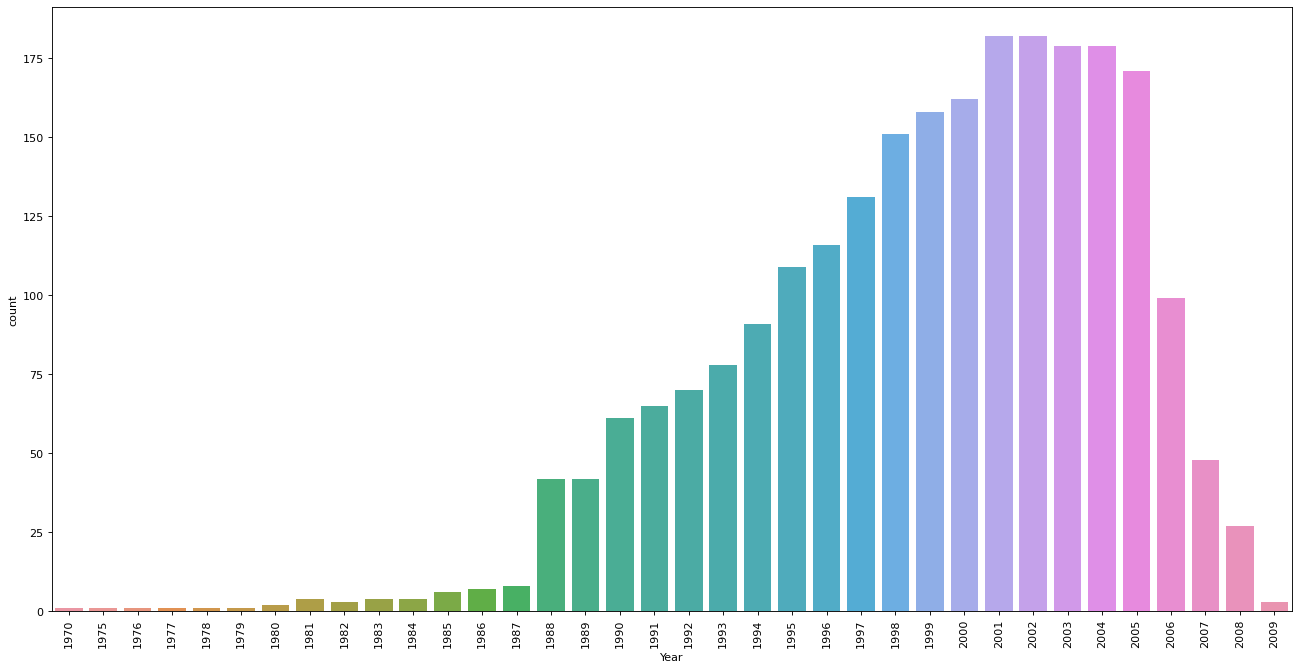

In [98]:
#on visualise
plt.clf()
plt.figure(figsize=(20,10), dpi=80)
ax = plt.subplot()
sns.countplot(data = personal_computers, x = 'Year')
ax.set_xticks(range(personal_computers['Year'].nunique()))
ax.set_xticklabels(labels = personal_computers['Year'].unique(), rotation=90)
plt.show()

In [99]:
#A l'évidence nous reriendrons internet Users car il y a davantage de données, et que ces données
#sont également plus récentes

Indicateur Démographique

In [100]:
health_population_structure_indicators = show_indicators('Health: Population: Structure')
health_population_structure_indicators

array(['Population ages 0-14 (% of total)',
       'Population ages 0-14, female', 'Population ages 0-14, male',
       'Population ages 0-14, total',
       'Population ages 15-64 (% of total)',
       'Population ages 15-64, female', 'Population ages 15-64, male',
       'Population ages 15-64, total', 'Population, female',
       'Population, female (% of total)', 'Population, male',
       'Population, male (% of total)', 'Population, total'], dtype=object)

In [101]:
show_indicators_rows(health_population_structure_indicators)
#Population total pourrait nous intéresser, il a le plus de données et engloble tous les autres

Population ages 0-14 (% of total) compte : 9067 lignes
Population ages 0-14, female compte : 9036 lignes
Population ages 0-14, male compte : 9036 lignes
Population ages 0-14, total compte : 9036 lignes
Population ages 15-64 (% of total) compte : 9071 lignes
Population ages 15-64, female compte : 9036 lignes
Population ages 15-64, male compte : 9036 lignes
Population ages 15-64, total compte : 9036 lignes
Population, female compte : 9036 lignes
Population, female (% of total) compte : 9067 lignes
Population, male compte : 9036 lignes
Population, male (% of total) compte : 9067 lignes
Population, total compte : 9989 lignes


In [102]:
population_total = left_data_series[left_data_series['Indicator Name'] == 'Population, total']
population_total

,Country Name,Country Code,Indicator Code,Year,Result,Topic,Indicator Name,Long definition
481,Afghanistan,AFG,SP.POP.TOTL,1970,11126123.0,Health: Population: Structure,"Population, total",Total population is based on the de facto defi...
926,Albania,ALB,SP.POP.TOTL,1970,2135479.0,Health: Population: Structure,"Population, total",Total population is based on the de facto defi...
1342,Algeria,DZA,SP.POP.TOTL,1970,14550034.0,Health: Population: Structure,"Population, total",Total population is based on the de facto defi...
1349,American Samoa,ASM,SP.POP.TOTL,1970,27292.0,Health: Population: Structure,"Population, total",Total population is based on the de facto defi...
1385,Andorra,AND,SP.POP.TOTL,1970,24276.0,Health: Population: Structure,"Population, total",Total population is based on the de facto defi...
...,...,...,...,...,...,...,...,...
3922821,Virgin Islands (U.S.),VIR,SP.POP.TOTL,2016,102951.0,Health: Population: Structure,"Population, total",Total population is based on the de facto defi...
3922886,West Bank and Gaza,PSE,SP.POP.TOTL,2016,4551566.0,Health: Population: Structure,"Population, total",Total population is based on the de facto defi...
3922937,"Yemen, Rep.",YEM,SP.POP.TOTL,2016,27584213.0,Health: Population: Structure,"Population, total",Total population is based on the de facto defi...
3923004,Zambia,ZMB,SP.POP.TOTL,2016,16591390.0,Health: Population: Structure,"Population, total",Total population is based on the de facto defi...


<Figure size 432x288 with 0 Axes>

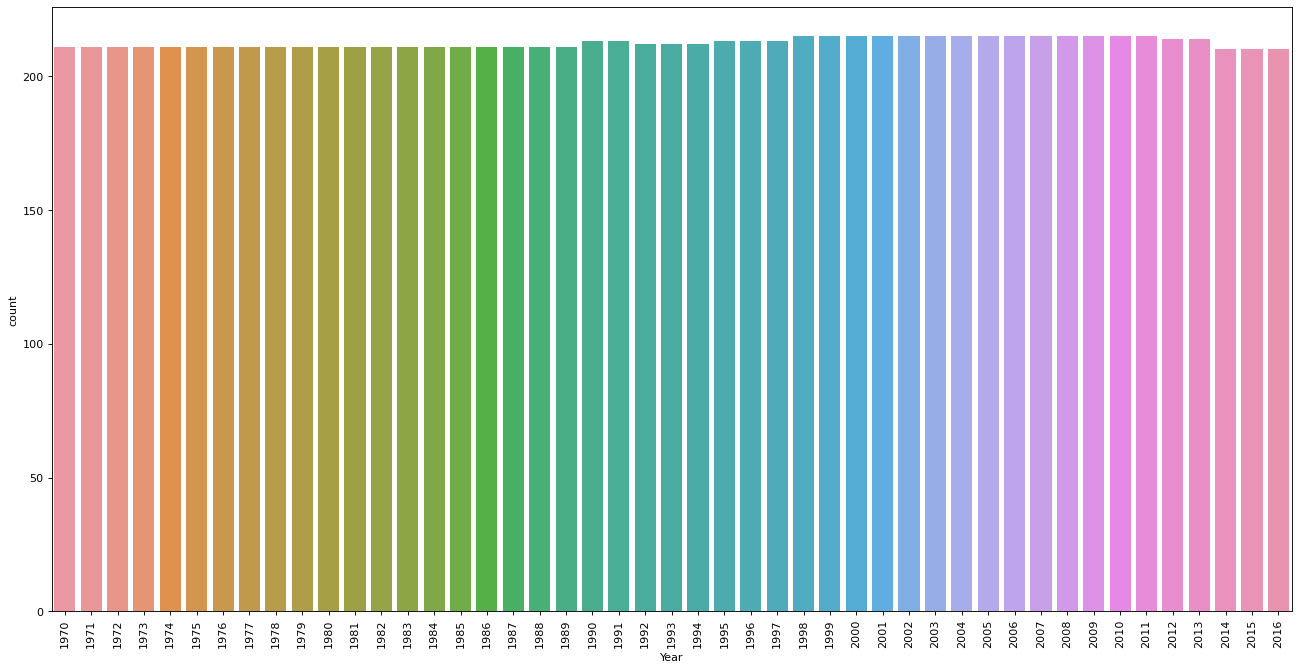

In [103]:
#on visualise
plt.clf()
plt.figure(figsize=(20,10), dpi=80)
ax = plt.subplot()
sns.countplot(data = population_total, x = 'Year')
ax.set_xticks(range(population_total['Year'].nunique()))
ax.set_xticklabels(labels = population_total['Year'].unique(), rotation=90)
plt.show()

#Nous le sélectionnons

Parenthèse : Attainment

In [104]:
#A la question où se trouvent les données projectives : 

left_data_series_2020_plus = left_data_series[left_data_series['Year'] > '2017']
left_data_series_2020_plus['Topic'].unique()
#On voit que toute les projections se trouvent dans l'attainment

array(['Attainment'], dtype=object)

In [105]:
#on inscpecte Attainment
attainment_indicators = show_indicators('Attainment')
attainment_indicators
#nb : soit Barro-Lee soit UIS = unesco institute of statistics soit projection

array(['Barro-Lee: Average years of primary schooling, age 15+, female',
       'Barro-Lee: Average years of primary schooling, age 15+, total',
       'Barro-Lee: Average years of primary schooling, age 15-19, female',
       'Barro-Lee: Average years of primary schooling, age 15-19, total',
       'Barro-Lee: Average years of primary schooling, age 20-24, female',
       'Barro-Lee: Average years of primary schooling, age 20-24, total',
       'Barro-Lee: Average years of primary schooling, age 25+, female',
       'Barro-Lee: Average years of primary schooling, age 25+, total',
       'Barro-Lee: Average years of primary schooling, age 25-29, female',
       'Barro-Lee: Average years of primary schooling, age 25-29, total',
       'Barro-Lee: Average years of primary schooling, age 30-34, female',
       'Barro-Lee: Average years of primary schooling, age 30-34, total',
       'Barro-Lee: Average years of primary schooling, age 35-39, female',
       'Barro-Lee: Average years of pri

In [106]:
#Il convient de remarquer que les indicateurs se répètent sur des intervalles différents 
#Les intervals font référence à des âges. Nous nous proposons de créer une df uniquement pour 
#Attainment afin de rendre ce topic plus abordable

#on crée la df attainment_df
attainment_df = left_data_series[left_data_series['Topic'] == 'Attainment'].copy()

In [107]:
left_data_series[left_data_series['Topic'] == 'Attainment']['Indicator Name'].tolist()

['Barro-Lee: Average years of primary schooling, age 15+, female',
 'Barro-Lee: Average years of primary schooling, age 15+, total',
 'Barro-Lee: Average years of primary schooling, age 15-19, female',
 'Barro-Lee: Average years of primary schooling, age 15-19, total',
 'Barro-Lee: Average years of primary schooling, age 20-24, female',
 'Barro-Lee: Average years of primary schooling, age 20-24, total',
 'Barro-Lee: Average years of primary schooling, age 25+, female',
 'Barro-Lee: Average years of primary schooling, age 25+, total',
 'Barro-Lee: Average years of primary schooling, age 25-29, female',
 'Barro-Lee: Average years of primary schooling, age 25-29, total',
 'Barro-Lee: Average years of primary schooling, age 30-34, female',
 'Barro-Lee: Average years of primary schooling, age 30-34, total',
 'Barro-Lee: Average years of primary schooling, age 35-39, female',
 'Barro-Lee: Average years of primary schooling, age 35-39, total',
 'Barro-Lee: Average years of primary schooling, 

In [108]:
#on crée une colonne age 
attainment_df['Age'] = attainment_df['Indicator Name'].apply(lambda x : re.sub("[^\d]", "", x))

In [109]:
#si pas d'age on remplace valeur par NaN
attainment_df['Age'] = attainment_df['Age'].replace('', np.nan)

In [110]:
attainment_df['Age'].unique()
#'252'-'257' => UIS ISCED NUMBER HERE ex : 252 = 25+   isced2 

array(['15', '1519', '2024', '25', '2529', '3034', '3539', '4044', '4549',
       '5054', '5559', '6064', '6569', '7074', '75', '252', '254', '251',
       '253', '255', '258', '256', '257', '019', '2039', '2064', '4064',
       '60', '65', '80', nan], dtype=object)

In [111]:
#on définit une fonction pour formatter les ages : 

def format_age(string_age):
    string_age = str(string_age)
    if len(string_age) == 4: 
        return string_age[0:2] + '-' + string_age[2:4]
    elif string_age == '019':
        return string_age[0:1] + '-' + string_age[1:3]
    elif len(string_age) == 3:
        return string_age[0:2] + '+'
    elif len(string_age) == 2:
        return string_age + '+'
    else: pass

In [112]:
attainment_df['Age'] = attainment_df['Age'].apply(lambda x : format_age(x))
attainment_df['Age'] = attainment_df['Age'].replace('na+', np.nan)

In [113]:
attainment_df['Indicator Renamed'] = attainment_df['Indicator Name'].apply(lambda x : re.sub(r"[\d,\+-]+|(age)", "", x)).apply(lambda x : x.replace('   ', ' '))
#attention - sont supprimés => BarroLee par exemple
#attention age supprimé => donc:  aver  age supprimé !

In [114]:
attainment_df.columns

Index(['Country Name', 'Country Code', 'Indicator Code', 'Year', 'Result',
       'Topic', 'Indicator Name', 'Long definition', 'Age',
       'Indicator Renamed'],
      dtype='object')

In [115]:
#on réorganise la df
attainment_df = attainment_df[['Country Name', 'Year', 'Indicator Renamed', 'Age', 'Result','Long definition',
                               'Indicator Name', 'Country Code', 'Indicator Code', 'Topic']]

In [116]:
#on saisit à nouveau les indicateurs (ici renamed) pour les étudier
attainment_df['Indicator Renamed'].unique()

array(['BarroLee: Aver years of primary schooling female',
       'BarroLee: Aver years of primary schooling total',
       'BarroLee: Aver years of secondary schooling female',
       'BarroLee: Aver years of secondary schooling total',
       'BarroLee: Aver years of tertiary schooling female',
       'BarroLee: Aver years of tertiary schooling total',
       'BarroLee: Aver years of total schooling female',
       'BarroLee: Aver years of total schooling total',
       'BarroLee: Percent of female population with no education',
       'BarroLee: Percent of female population with primary schooling. Completed Primary',
       'BarroLee: Percent of female population with primary schooling. Total (Incomplete and Completed Primary)',
       'BarroLee: Percent of female population with secondary schooling. Completed Secondary',
       'BarroLee: Percent of female population with secondary schooling. Total (Incomplete and Completed Secondary)',
       'BarroLee: Percent of female populatio

In [117]:
attainment_indicators_reworked = attainment_df['Indicator Renamed'].unique()

In [118]:
#on divise les projections des "faits"
projection_specification = re.compile('Projection')

attainment_projection_indicators_reworked = [i for i in attainment_indicators_reworked if projection_specification.search(str(i))]
attainment_facts_indicators_reworked = [i for i in attainment_indicators_reworked if i not in attainment_projection_indicators_reworked]

In [119]:
print(len(attainment_projection_indicators_reworked))
print(len(attainment_facts_indicators_reworked))
print(attainment_indicators_reworked.shape[0])

58
89
147


In [120]:
#on enlève la discrimination par genre

attainment_projection_indicators_no_gender_reworked = remove_gender_dicrimination(attainment_projection_indicators_reworked)
attainment_facts_indicators_no_gender_reworked = remove_gender_dicrimination(attainment_facts_indicators_reworked)

attainment_facts

In [121]:
attainment_facts_indicators_no_gender_reworked 
#on a perdu l'information sur les ISCED car regex sur les chiffres 
#mais juste avant se trouve le niveau équivalent ! 
#les "Male" n'ont pas été bien filtrés du fait de la casse

['BarroLee: Aver years of primary schooling total',
 'BarroLee: Aver years of secondary schooling total',
 'BarroLee: Aver years of tertiary schooling total',
 'BarroLee: Aver years of total schooling total',
 'BarroLee: Percent of population with no education',
 'BarroLee: Percent of population with primary schooling. Completed Primary',
 'BarroLee: Percent of population with primary schooling. Total (Incomplete and Completed Primary)',
 'BarroLee: Percent of population with secondary schooling. Completed Secondary',
 'BarroLee: Percent of population with secondary schooling. Total (Incomplete and Completed Secondary)',
 'BarroLee: Percent of population with tertiary schooling. Completed Tertiary',
 'BarroLee: Percent of population with tertiary schooling. Total (Incomplete and Completed Tertiary)',
 'BarroLee: Population in thousands total',
 'UIS: Mean years of schooling of the population  . Male',
 'UIS: Mean years of schooling of the population  . Total',
 'UIS: Percent of populat

In [122]:
#on filtre les "Male" ; les "primary" égaement ; gender parity index également ; 'lower secondary'
specifications = re.compile("(Male)|(primary)|(Gender Parity Index)|(lower secondary)")

theta_list = []

for i in attainment_facts_indicators_no_gender_reworked: 
    if specifications.search(i): pass
    else : theta_list.append(i)
        
attainment_facts_indicators_no_gender_reworked = theta_list

In [123]:
#on adapte notre fonction show_indicators_rows

def show_indicators_rows_for_attainment(list_indicators_name):
    for i in list_indicators_name:
        lignes = attainment_df[attainment_df['Indicator Renamed'] == i].shape[0]
        print(i, 'compte :', lignes, 'lignes')

In [124]:
#on analyse le nombre de lignes 

show_indicators_rows_for_attainment(attainment_facts_indicators_no_gender_reworked)
#il faut diviser BarooLee par le nombre d'ages => 19440/15 = 1296 lignes par tranche d'age

BarroLee: Aver years of secondary schooling total compte : 19440 lignes
BarroLee: Aver years of tertiary schooling total compte : 19440 lignes
BarroLee: Aver years of total schooling total compte : 19440 lignes
BarroLee: Percent of population with no education compte : 19440 lignes
BarroLee: Percent of population with secondary schooling. Completed Secondary compte : 19440 lignes
BarroLee: Percent of population with secondary schooling. Total (Incomplete and Completed Secondary) compte : 19440 lignes
BarroLee: Percent of population with tertiary schooling. Completed Tertiary compte : 19440 lignes
BarroLee: Percent of population with tertiary schooling. Total (Incomplete and Completed Tertiary) compte : 19440 lignes
BarroLee: Population in thousands total compte : 19440 lignes
UIS: Mean years of schooling of the population  . Total compte : 569 lignes
UIS: Percent of population with at least completed postsecondary education (ISCED  or higher). Total compte : 788 lignes
UIS: Percent of 

In [125]:
#on fait  une sélection 
#attention les noms sont indicator Rename
#donc s'applique uniquement sur df : attainment_df

selection_indicators_attainment_facts = [
    'BarroLee: Aver years of secondary schooling total',
    #19440 lignes soit 1296 lignes par tranche d'age 
    #attention cela dit car inclus lower et upper 
    'BarroLee: Aver years of tertiary schooling total',
    #19440 lignes soit 1296 lignes par tranche d'age
    'BarroLee: Percent of population with secondary schooling. Total (Incomplete and Completed Secondary)', 
    #idem lignes, idem pb lower + upper ici
    'BarroLee: Percent of population with tertiary schooling. Total (Incomplete and Completed Tertiary)',
    #idem lignes
    'BarroLee: Population in thousands total', 
    #idem lignes
]

attainment_projection

In [126]:
#on filtre les "Male" et "Female" ; "Primary" ;  "Lower Secondary" ; "No Education" ; "Gender Gap"
specifications_projection = re.compile("(Male)|(Female)|(Primary)|(Lower Secondary)|(No Education)|(Gender Gap)")

delta_list = []

for i in attainment_projection_indicators_reworked: 
    if specifications_projection.search(i): pass
    else : delta_list.append(i)
        
attainment_projection_indicators_reworked = delta_list

In [127]:
attainment_projection_indicators_reworked

['Projection: Mean years of schooling. Age . Total',
 'Projection: Percent of the population by highest level of educational attainment. Post Secondary. Total',
 'Projection: Percent of the population by highest level of educational attainment. Upper Secondary. Total',
 'Projection: Percent of the total population by highest level of educational attainment. Post Secondary. Total',
 'Projection: Percent of the total population by highest level of educational attainment. Upper Secondary. Total',
 'Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total',
 'Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total']

In [128]:
attainment_df[attainment_df['Indicator Renamed'] == 'Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total']['Long definition'].tolist()[0]
#ici post secondary inclue post sec non tertiary et tertiary 

"Total population in thousands in the specified age group that has completed post-secondary or tertiary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/"

In [129]:
attainment_df[attainment_df['Indicator Renamed'] == 'Projection: Percent of the population by highest level of educational attainment. Upper Secondary. Total']['Long definition'].tolist()[0]

"Share of the population of the stated age group that has completed upper secondary or incomplete post-secondary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/"

In [130]:
show_indicators_rows_for_attainment(attainment_projection_indicators_reworked)

Projection: Mean years of schooling. Age . Total compte : 37848 lignes
Projection: Percent of the population by highest level of educational attainment. Post Secondary. Total compte : 31540 lignes
Projection: Percent of the population by highest level of educational attainment. Upper Secondary. Total compte : 31540 lignes
Projection: Percent of the total population by highest level of educational attainment. Post Secondary. Total compte : 3154 lignes
Projection: Percent of the total population by highest level of educational attainment. Upper Secondary. Total compte : 3154 lignes
Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total compte : 12616 lignes
Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total compte : 12616 lignes


In [131]:
attainment_df[attainment_df['Indicator Renamed'] == 'Projection: Percent of the population by highest level of educational attainment. Post Secondary. Total']['Age'].unique()

array(['15+', '15-19', '20-24', '20-39', '20-64', '25+', '25-29', '40-64',
       '60+', '80+'], dtype=object)

In [132]:
attainment_df[attainment_df['Indicator Renamed'] == 'Projection: Percent of the population by highest level of educational attainment. Post Secondary. Total']['Country Name'].nunique()

166

In [133]:
attainment_df[attainment_df['Indicator Renamed'] == 'Projection: Percent of the population by highest level of educational attainment. Post Secondary. Total']['Year'].unique()

array(['2010', '2015', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085',
       '2090', '2095', '2100'], dtype=object)

In [134]:
attainment_df[attainment_df['Indicator Renamed'] == 'Projection: Percent of the total population by highest level of educational attainment. Post Secondary. Total']['Indicator Name'].unique()

array(['Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total'],
      dtype=object)

In [135]:
attainment_df[attainment_df['Indicator Renamed'] == 'Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total']['Age'].value_counts(dropna=False)

NaN      3154
15-19    3154
20-24    3154
25-29    3154
Name: Age, dtype: int64

In [136]:
selection_indicators_attainment_projections = [
    'Projection: Mean years of schooling. Age . Total',
    
    #Upper Secondary
    'Projection: Percent of the population by highest level of educational attainment. Upper Secondary. Total',
    #31450 / 10 car 10 tranches d'ages 
    'Projection: Percent of the total population by highest level of educational attainment. Upper Secondary. Total',
    #3145 pas divisé par 10 car = niveau le plus haut atteint/population totale (qu'importe l'age)
    'Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total',
    #12616 lignes / 4 = 3154 car 3 tranches d'age : 25-29; 20-24 ; 15-19 + Nan chacun a 3145 lignes (dicriminé par l'âge)
    
    #Post Secondary
    'Projection: Percent of the population by highest level of educational attainment. Post Secondary. Total',
    #31450 / 10 car 10 tranches d'ages 
    'Projection: Percent of the total population by highest level of educational attainment. Post Secondary. Total',
    #3145 pas divisé par 10 car = niveau le plus haut atteint/population totale 
    'Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total',
    #12616 lignes / 4 = 3154 car 3 tranches d'age : 25-29; 20-24 ; 15-19 + Nan chacun a 3145 lignes
]

Selection Finale

In [137]:
#Notes importantes sur des indicateurs enlevés

#Note sur Post secondary non tertiary

#On remarquera que nous nous sommes séparés de post secondary non tertiary car ces indicateurs, 
#en plus d'avoir peu de données, nous renseignaient sur les formations professionnelles très souvent
#manuelles et qui ne correpondent pas vraissemblablement à une formation en distanciel (sauf si 
#Academy avait été très innovante en proposant des cours en distanciel malgrès tout - on peut
#s'imaginer des cours de cuisine, de maquillage en ligne par exemple - mais rien ne le suggère 
#car il n'y a aucune mention sur les équipements requis pour suivre la formation - sauf un 
#ordinateur que nous induisons du 'Tech' -  et que ceux-ci auraient suggérés des formations à 
#dimensions manuelles)

#Note sur Attainment

#On s'est rendu compte a posteriori que les indicateurs d'Attainment ne nous serviraient pas.
#Nous les avions gardés dans l'idée de faire des projections, car c'est le seul topic qui 
#contient des données projectives. Cependant, la discrimination par l'âge ne nous semble pas 
#être pertinente (et elle est omniprésente dans ce Topic). Si l'on s'inspire de Business 
#sur le marché on peut se rendre compte que la demande répond également à un désir de 
#reconversion professionnelle et suggère qu'une segmentation client qui considère l'âge pourrait 
#"cacher" une partie importante de ce marché. Nous parlons de niveau, pas d'âge dans le sujet. 
#Nous nous sommes donc séparés des indicateurs d'attainment.

In [138]:
#on récapitule les indicateurs de l'éductaion sélectionnés : 

selection_indicators_secondary = [
    'Enrolment in upper secondary education, both sexes (number)', #1999 - 2015 ; 2376 lignes
    
    #Pour plus de granularité on pourra se pencher sur : 
    'Theoretical duration of upper secondary education (years)', 
    #1970-2016 ; 9417 lignes utile pour avoir valeur 
    'Percentage of enrolment in upper secondary education in private institutions (%)'
    #1998-2015 #1844 lignes
]



selection_indicators_tertiary = [
    'Enrolment in tertiary education, all programmes, both sexes (number)', 
    #5475 lignes #1970-2016
    
    #Pour plus de granularité on pourra se pencher sur : 
    'School life expectancy, tertiary, both sexes (years)',
    #5129 lignes #1970-2015
    'Percentage of enrolment in tertiary education in private institutions (%)',
    #1503 lignes #1998-2015
    #nous pousse à ajouter la mesure en % dans selection_indicators_secondary
]

In [139]:
#sélection économie 

#nb : pas d'indice de gini != gni, difficile d'appréhender la répartition des richesses des pays

selection_indicators_economic_topics_group = [
    #gni 
    'GNI per capita, PPP (current international $)', #niveau de vie
    'GNI, PPP (current international $)', #richesse pays comparable
    'GNI per capita, Atlas method (current US$)', #niveau de vie
    #gdp, pour comparaison de tendances grace au volume
    'GDP, PPP (constant 2011 international $)',#richesse pays comparable
    'GDP per capita, PPP (constant 2011 international $)', #niveau de vie
    #'GDP (constant 2010 US$)',
    #'GDP per capita (constant 2010 US$)',
    #Change de nom du fait de la jointure non gardée (voir ci-après - bloc 11) devient : 
    'GDP at market prices (current US$)'
]

In [140]:
#pour la population on garde le'indicateurs de health :

selection_indicators_population = [
    'Population, total',
]

In [141]:
#pour l'aspect technique on garde :
selection_indicators_technic = [   
    'Internet users (per 100 people)',
]

<h3 id='3'>3. On précise notre sélection</h3>

Note importante

In [142]:
#Récap : Ici on a nos indicateurs

#Nous avons des indicateurs dont nous ne pourrons nous passer : 

#'Enrolment in tertiary education, all programmes, both sexes (number)',
#'Enrolment in upper secondary education, both sexes (number)',
#'GNI per capita, PPP (current international $)',
#'Internet users (per 100 people)',
#'Population, total'

#car ils nous renseignent chacuns sur : 

#Scolarité Niveau Lycée
#Scolarité Niveau Université
#L'économie (le PPP est important pour la comparaison de pays, le per capita pour le niveau de vie
#et pour les calculs que nous ferons ensuite)
#La technologie
#La taille de la population

#On souhaite ici étudier la corrélations de tous les indicateurs sélectionnés précédemment
#afin de savoir si nous pouvons nous passer de certains d'entre eux

#Pour ce faire, on va reprendre à 0 nos tables pour repartir sur de nouvelles variables "rw" (reworked)

In [143]:
#On a es_data qui contient tous les résultats des indicateurs dans des colonnes années 

#1. On en fait une nouvelle copie
rw_data = es_data.copy()

#2. On melt afin d'avoir une seule colonne années qu'on appelle Year
rw_data = pd.melt(rw_data, id_vars=['Country Name', 'Country Code', 'Indicator Name', 
                       'Indicator Code','Unnamed: 69'], value_vars=['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
                       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
                       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
                       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
                       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
                       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
                       '2095', '2100'], var_name="Year", value_name="Result")

#3. On drop les colonnes dont nous n'auront plus besoin : 
# Unnamed (car pas de valeur dans cette dernière) ainsi qu'indicator Code

rw_data.drop(['Unnamed: 69', 'Indicator Code'], axis=1, inplace=True)


#4. On supprime les lignes sans résultats : 
rw_data.dropna(subset=['Result'], inplace=True)

#5. Il n'y a plus de valeur manquantes
print(rw_data.isna().sum())

#6. On change le type de Year:

rw_data['Year'] = pd.to_datetime(rw_data['Year'], format='%Y')
rw_data['Year'] = rw_data['Year'].dt.year

Country Name      0
Country Code      0
Indicator Name    0
Year              0
Result            0
dtype: int64


In [144]:
#On se souvient que dans es_country, il y a des agrégations dans la colonne pays

#7. On fait une copie "rw" de es_country

rw_country = es_country.copy()

#8. On retrouve ces agrégations dans les NaN de ['Region']
#On rassemble le nom des pays aisni que leur code dans une df : 

not_a_country = rw_country[rw_country['Region'].isna()][['Short Name', 'Country Code']]

#9. On s'assure que deux pays ne peuvent pas avoir le même country code : 
print("#9. Il y a", rw_country['Country Code'].duplicated().sum(), "code pays dupliqués\n")

#10. On enlève les lignes données par les agrégats de rw_country à rw_data via not_a_country :
rw_data = rw_data[~rw_data['Country Code'].isin(not_a_country['Country Code'].values)]

#11. On enlève également à rw_country ces pays : 
rw_country.dropna(subset=['Region'], inplace=True)

#12. On se souvient de la différence de pays entre rw_country et rw_data:
print("#12. Il y a", rw_data['Country Code'].nunique()-rw_country['Country Code'].nunique(), "pays qui n'est pas dans les deux df")

#13. On se souvient que ce pays est 'British Virgin Islands' dont le country code est : 
print("#13. Le country code de ce pays est :", [i for i in rw_data['Country Code'].unique() if i not in rw_country['Country Code'].unique()][0])

#14. Nous l'enlevons de rw_data:
rw_data = rw_data[~rw_data['Country Code'].isin(['VGB'])]

#9. Il y a 0 code pays dupliqués

#12. Il y a 1 pays qui n'est pas dans les deux df
#13. Le country code de ce pays est : VGB


In [145]:
#Par rapport à es_series on avait effectué une jointure (left_data_series) afin de sélectionner
#nos indicateurs. Nous n'avons pas besoin d'effectuer cette jointure à nouveau. 

#Nous allons chercher à alléger notre df en ne gardant que les indicateurs que nous avons
#sélectionnés

#15. On crée un tableau avec toutes nos sélections :

selection_all = [
    selection_indicators_secondary,
    selection_indicators_tertiary,
    selection_indicators_economic_topics_group,
    selection_indicators_population,
    selection_indicators_technic,
]


#16. On le transforme en une liste de noms d'indicateurs (pas une liste de listes)

selection_all_in_one = []

for i in range(len(selection_all)):
    for j in range(len(selection_all[i])):
        selection_all_in_one.append(selection_all[i][j])
    
#NB : on garde une copie de rw_data tel quel pour plus tard (cf : Projections)

rw_data_fork_1 = rw_data.copy()

#17. On ne garde que les indicateurs dans notre df rw_data:

rw_data = rw_data[rw_data['Indicator Name'].isin(selection_all_in_one)]

#18. On peut réduire notre scope d'étude entre 2000 et 2016 
#Seuil temporel n = 18 car nous souhaitons étudier les corrélations dans un premier temps 
rw_data_00_16 = rw_data[(rw_data['Year'] >= 2000) & (rw_data['Year'] <= 2016)]

#19. On souhaite effectuer un pivot afin d'avoir une colonne pour un indicateur

rw_data_00_16 = rw_data_00_16.pivot(
    columns='Indicator Name',
    index=['Country Name','Year'], #On ne conserve pas country code par ailleurs
    values='Result'
).reset_index()

On étudie les corrélations fortes : $r \geq 0.7$

In [146]:
rw_data_00_16.head()

Indicator Name,Country Name,Year,"Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",GDP at market prices (current US$),"GDP per capita, PPP (constant 2011 international $)","GDP, PPP (constant 2011 international $)","GNI per capita, Atlas method (current US$)","GNI per capita, PPP (current international $)","GNI, PPP (current international $)",Internet users (per 100 people),Percentage of enrolment in tertiary education in private institutions (%),Percentage of enrolment in upper secondary education in private institutions (%),"Population, total","School life expectancy, tertiary, both sexes (years)",Theoretical duration of upper secondary education (years)
0,Afghanistan,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20093756.0,NaN,3.0
1,Afghanistan,2001,NaN,159952.0,2.461666e+09,NaN,NaN,NaN,NaN,NaN,0.004723,NaN,NaN,20966463.0,NaN,3.0
2,Afghanistan,2002,NaN,NaN,4.128821e+09,1063.635574,2.337863e+10,NaN,870.0,1.920217e+10,0.004561,NaN,NaN,21979923.0,NaN,3.0
3,Afghanistan,2003,26211.0,115583.0,4.583644e+09,1099.194507,2.535276e+10,NaN,920.0,2.125201e+10,0.087891,NaN,NaN,23064851.0,0.06284,3.0
4,Afghanistan,2004,27648.0,173356.0,5.285466e+09,1062.249360,2.562037e+10,210.0,920.0,2.213485e+10,0.105809,NaN,NaN,24118979.0,0.06280,3.0


In [147]:
#                                        !!!ATTENTION !!!
#                            Cette cell consomme beaucoup de ressources
#                                 Nous la mettons en commentaire

#Cette cell met en évidence qu'il y a différents outliers qui peuvent changer les corrélations
#Les trois groupes de points que nous distingons fréquemment sont les pays : Inde, Chine, USA
#
#g = sns.pairplot(rw_data_00_16)

#for ax in g.axes.flatten():
#    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
#    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
#    ax.yaxis.get_label().set_horizontalalignment('right')

In [148]:
for k in range(2000, 2017):
    
    available_values = (
        rw_data_00_16[rw_data_00_16['Year'] == k].shape[0] 
        - 
        rw_data_00_16[rw_data_00_16['Year'] == k].isna().sum().values)
    available_values

    j = 0 
    
    for i in available_values:
        j += i
    
    print(k, 
          ":", 
          j,
         'valeurs affectées')
    
#on va étudier les corrélations de l'année 2011 car cette année à le plus de valeurs disponibles

2000 : 2695 valeurs affectées
2001 : 2709 valeurs affectées
2002 : 2770 valeurs affectées
2003 : 2765 valeurs affectées
2004 : 2795 valeurs affectées
2005 : 2784 valeurs affectées
2006 : 2784 valeurs affectées
2007 : 2807 valeurs affectées
2008 : 2825 valeurs affectées
2009 : 2837 valeurs affectées
2010 : 2853 valeurs affectées
2011 : 2878 valeurs affectées
2012 : 2843 valeurs affectées
2013 : 2819 valeurs affectées
2014 : 2710 valeurs affectées
2015 : 2376 valeurs affectées
2016 : 2104 valeurs affectées


In [149]:
#on utilise nos indicateurs principaux (cf "note importante" au début de cette partie)

rw_data_11 = rw_data_00_16[['Year',
     'Country Name',
     'Enrolment in tertiary education, all programmes, both sexes (number)',
     'Enrolment in upper secondary education, both sexes (number)',
     'GNI per capita, PPP (current international $)',
     'Internet users (per 100 people)',
     'Population, total'       
    ]].copy()

In [150]:
#on scope à 2011, on drop les NaN

rw_data_11 = rw_data_11[rw_data_11['Year'] == 2011].dropna()

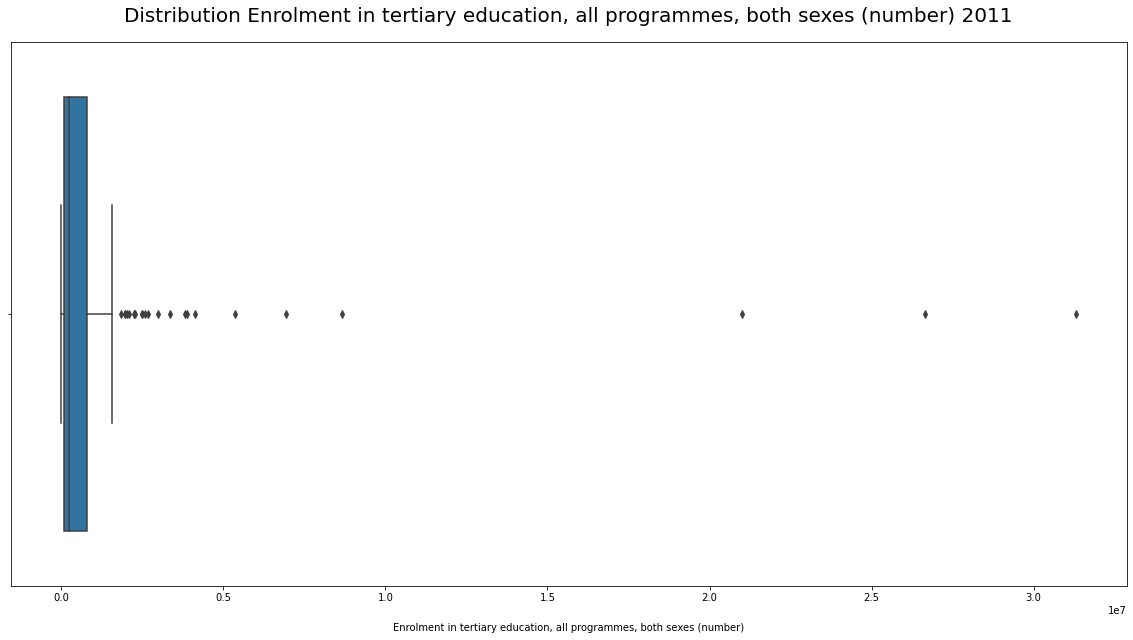

<Figure size 432x288 with 0 Axes>

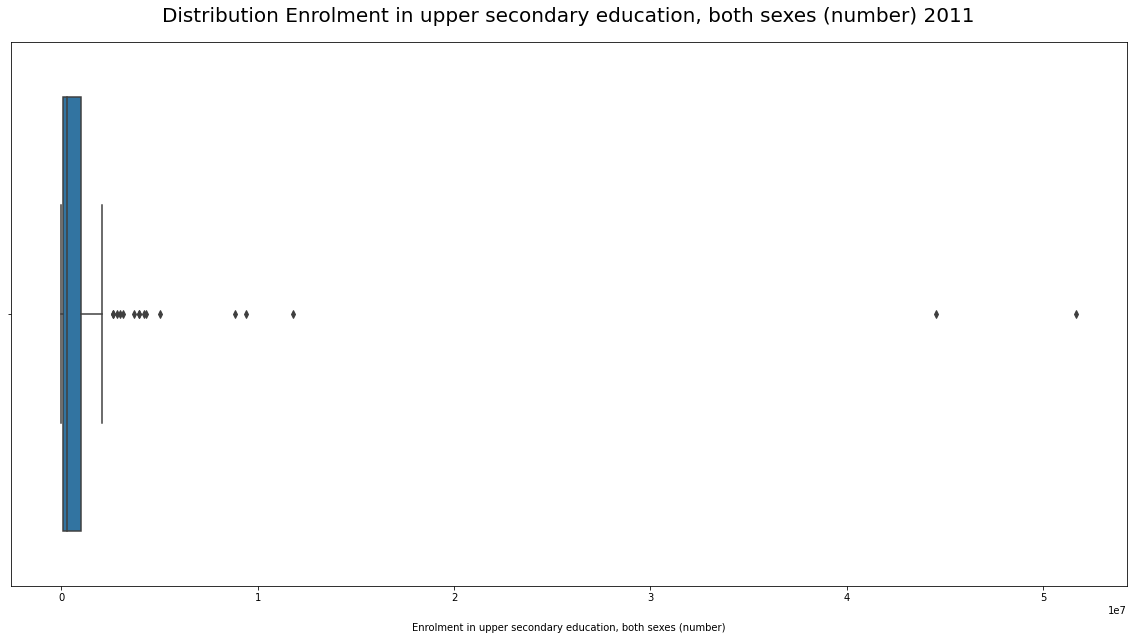

<Figure size 432x288 with 0 Axes>

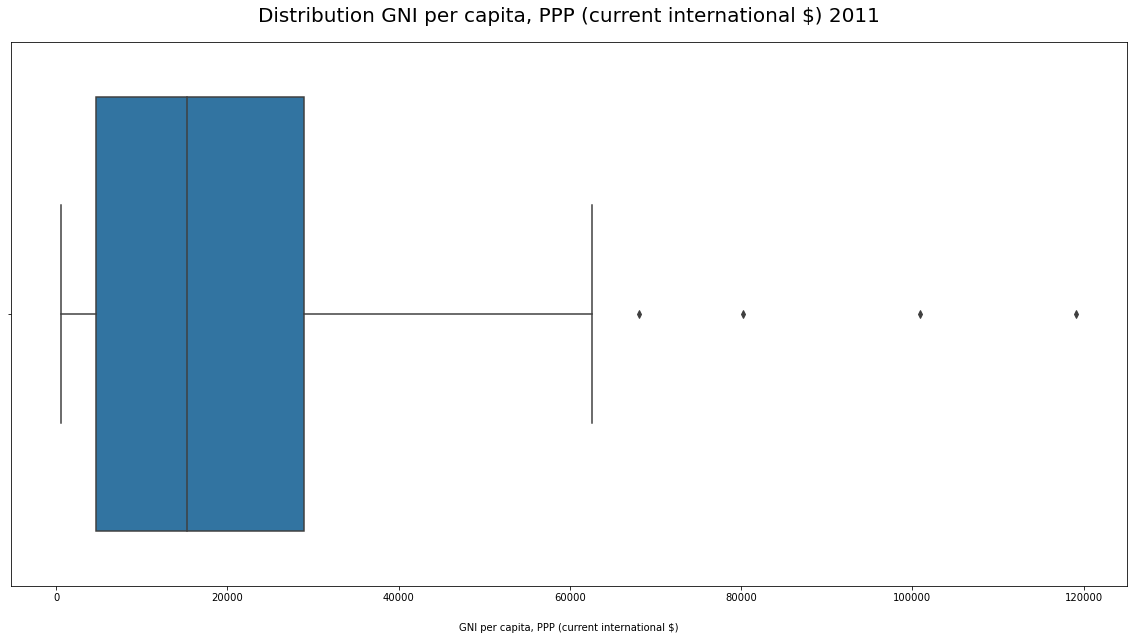

<Figure size 432x288 with 0 Axes>

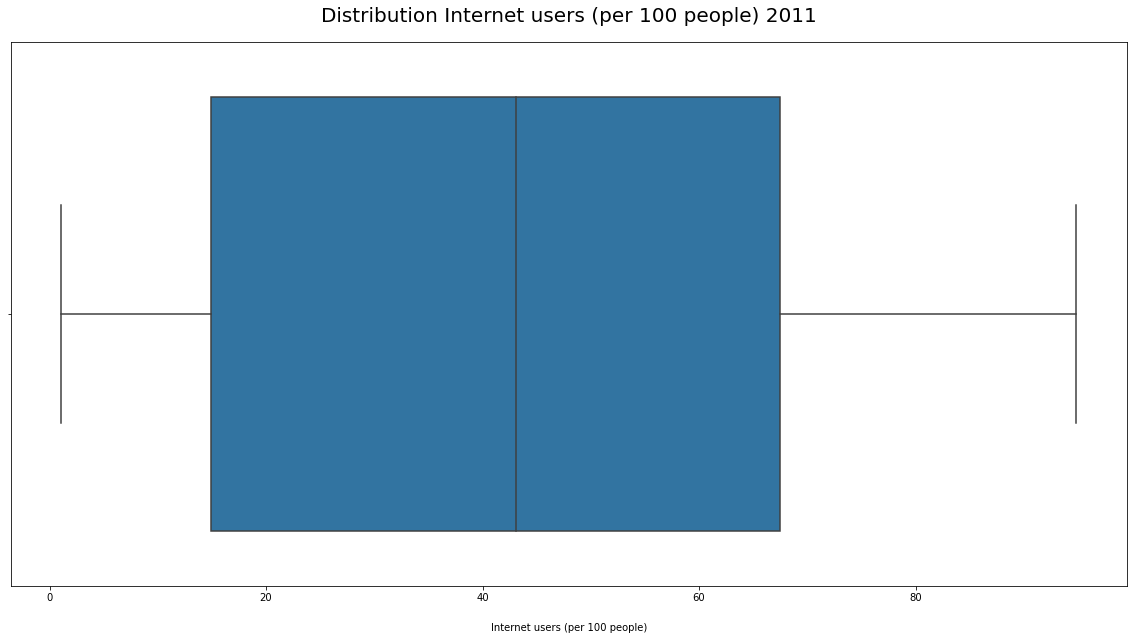

<Figure size 432x288 with 0 Axes>

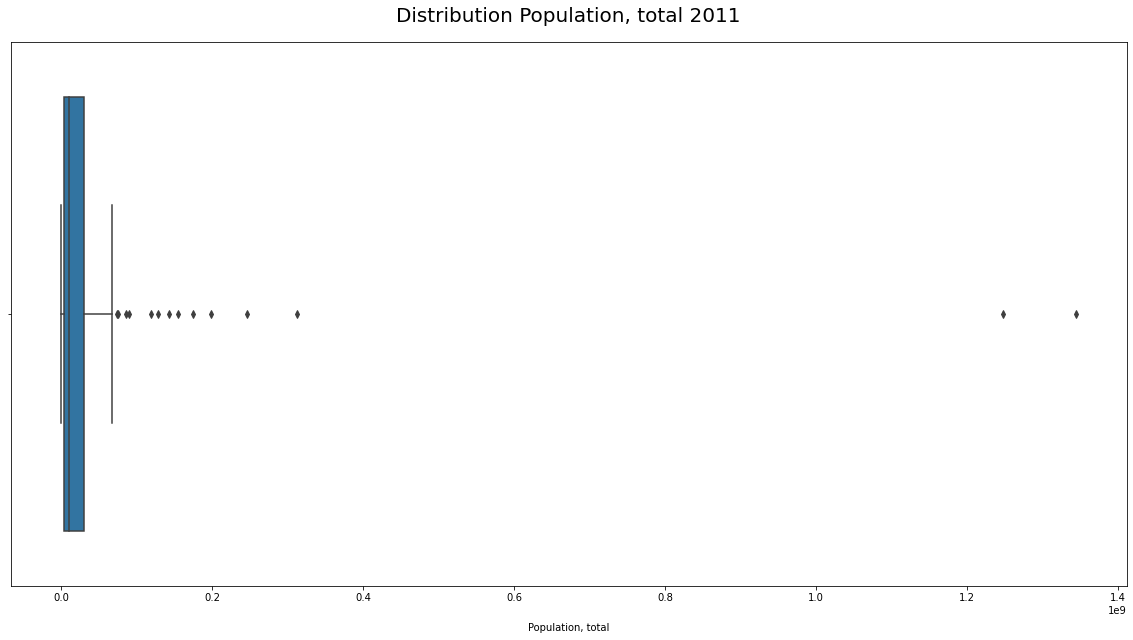

<Figure size 432x288 with 0 Axes>

In [151]:
for i in rw_data_11.columns[2:]:
    plt.figure(figsize=(20,10))
    ax = plt.subplot()
    sns.boxplot(data=rw_data_11, x=i)
    ####ax.tick_params(axis='x', colors=font_txt)
    ####ax.xaxis.label.set_color(font_txt)
    ax.xaxis.labelpad = 20
    
    plt.title(
        'Distribution {} 2011'.format(i),
        fontsize=font_sizes,
        pad=20,
        ####color=font_txt
    )
    
    ####plt.savefig('./SavedGraphs/index.png', transparent=True)
    plt.show()
    plt.clf()

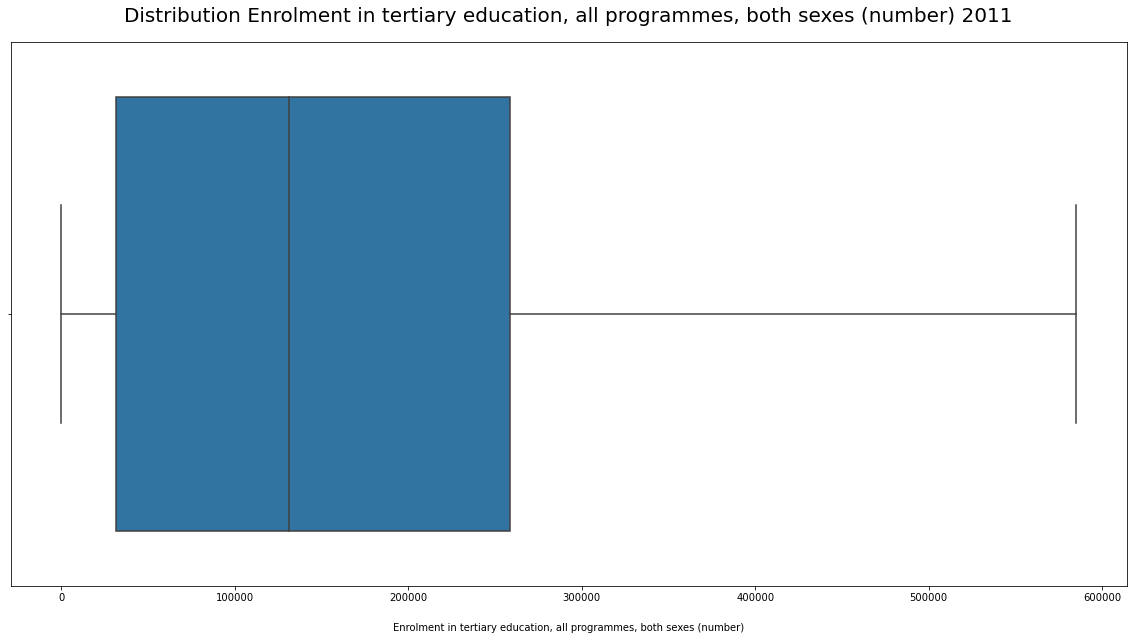

<Figure size 432x288 with 0 Axes>

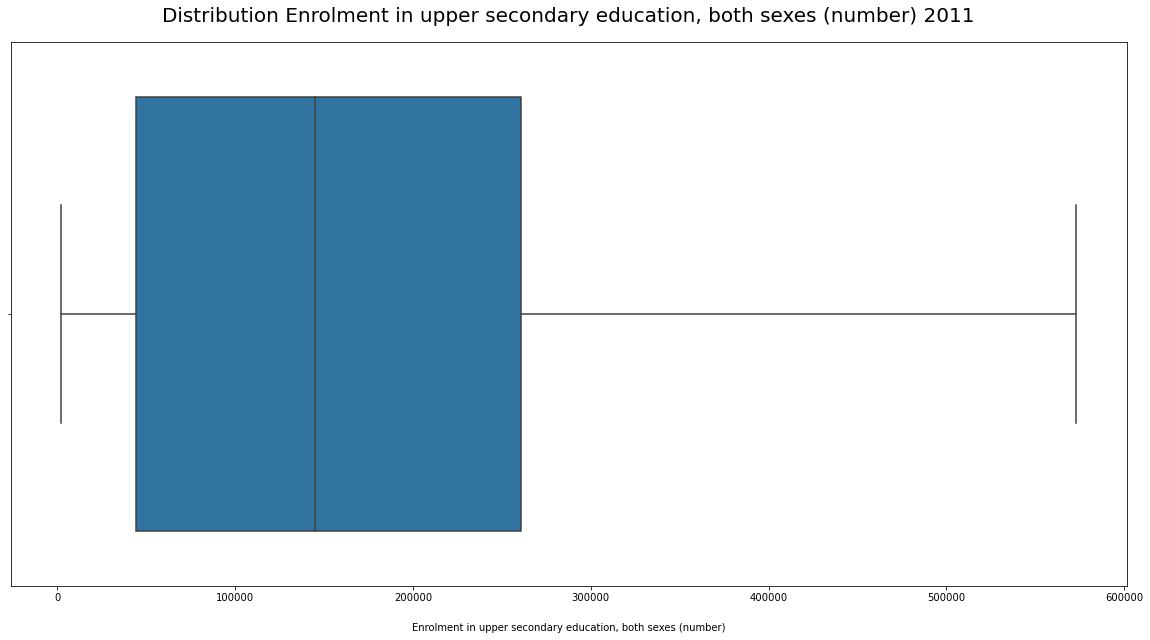

<Figure size 432x288 with 0 Axes>

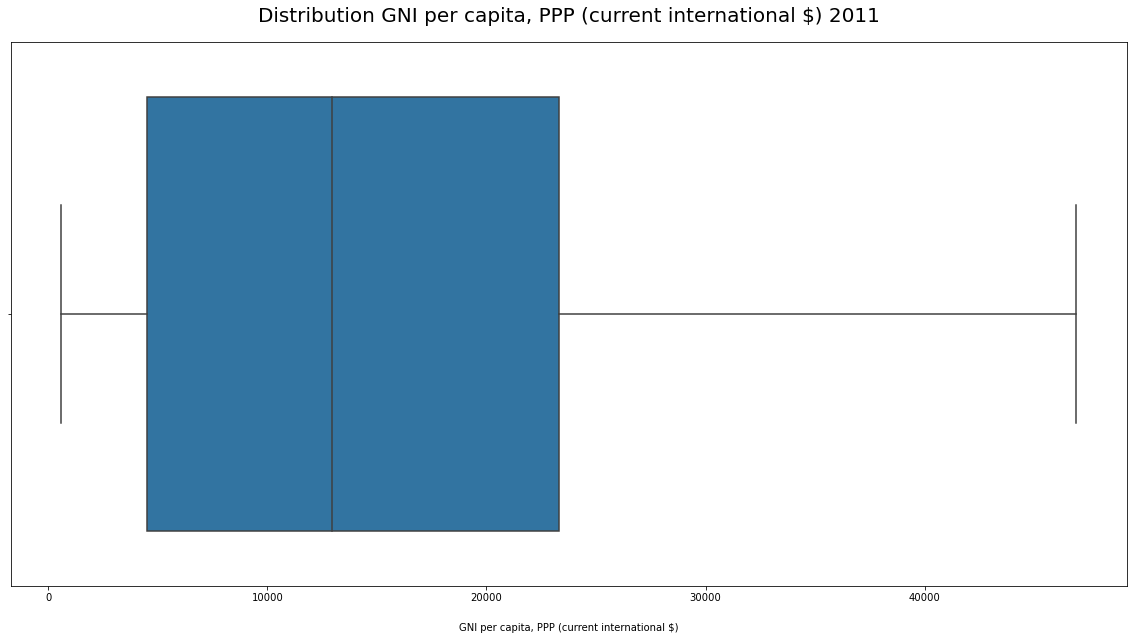

<Figure size 432x288 with 0 Axes>

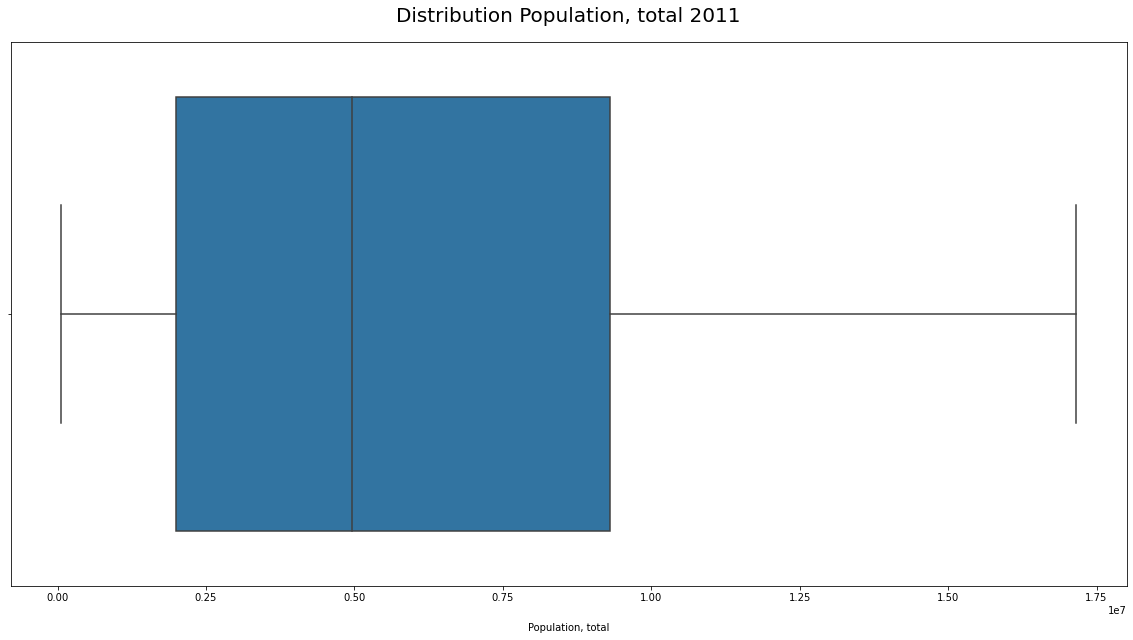

<Figure size 432x288 with 0 Axes>

In [152]:
#on va "tweaker" avec les limites afin d'isoler les outliers pour chacun des boxplots sauf pour 
#Internet Users qui n'en a pas

limit = [
    6*1e5,
    6*1e5,
    5*1e4,
    2*1e7,
]
j = 0

for i in rw_data_11.columns[2:]:
    if i == 'Internet users (per 100 people)': pass
    else:
        plt.figure(figsize=(20,10))
        ax = plt.subplot()
        sns.boxplot(data=rw_data_11[rw_data_11[i] < limit[j]], x=i)
        ####ax.tick_params(axis='x', colors=font_txt)
        ####ax.xaxis.label.set_color(font_txt)
        ax.xaxis.labelpad = 20
    
        plt.title(
            'Distribution {} 2011'.format(i),
            fontsize=font_sizes,
            pad=20,
            ####color=font_txt
        )
        ####plt.savefig('./SavedGraphs/index.png', transparent=True)
        plt.show()
        plt.clf()
        j += 1 

In [153]:
j = 0
empty_list_outliers = []
for i in rw_data_11.columns[2:]:
    if i == 'Internet users (per 100 people)': pass
    else:
        empty_list_outliers.append(
            rw_data_11[rw_data_11[i] > limit[j]]['Country Name'].tolist()
        )
        j += 1 

In [154]:
list_outliers = []
for i in range(len(empty_list_outliers)):
    list_outliers.extend(empty_list_outliers[i])
    
list_outliers = np.unique(list_outliers)

list_outliers 
#outliers qui apparraissent dans au moins un de nos 5 indicateurs principaux en 2011

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Bangladesh', 'Bermuda', 'Brazil', 'Brunei Darussalam', 'Cameroon',
       'Chile', 'China', 'Colombia', 'Congo, Dem. Rep.',
       'Egypt, Arab Rep.', 'Ethiopia', 'France', 'Ghana', 'Greece',
       'Hong Kong SAR, China', 'India', 'Indonesia', 'Iran, Islamic Rep.',
       'Italy', 'Japan', 'Kazakhstan', 'Korea, Rep.', 'Macao SAR, China',
       'Madagascar', 'Malaysia', 'Mexico', 'Morocco', 'Mozambique',
       'Nepal', 'Netherlands', 'Norway', 'Pakistan', 'Poland', 'Qatar',
       'Romania', 'Russian Federation', 'Spain', 'Sri Lanka', 'Sudan',
       'Switzerland', 'Thailand', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uzbekistan', 'Yemen, Rep.'], dtype='<U20')

In [155]:
#on reprend rw_data_00_16 pour retrouver nos indicateurs
rw_data_00_16_no_outliers = rw_data_00_16[~rw_data_00_16['Country Name'].isin(list_outliers)]

<Figure size 432x288 with 0 Axes>

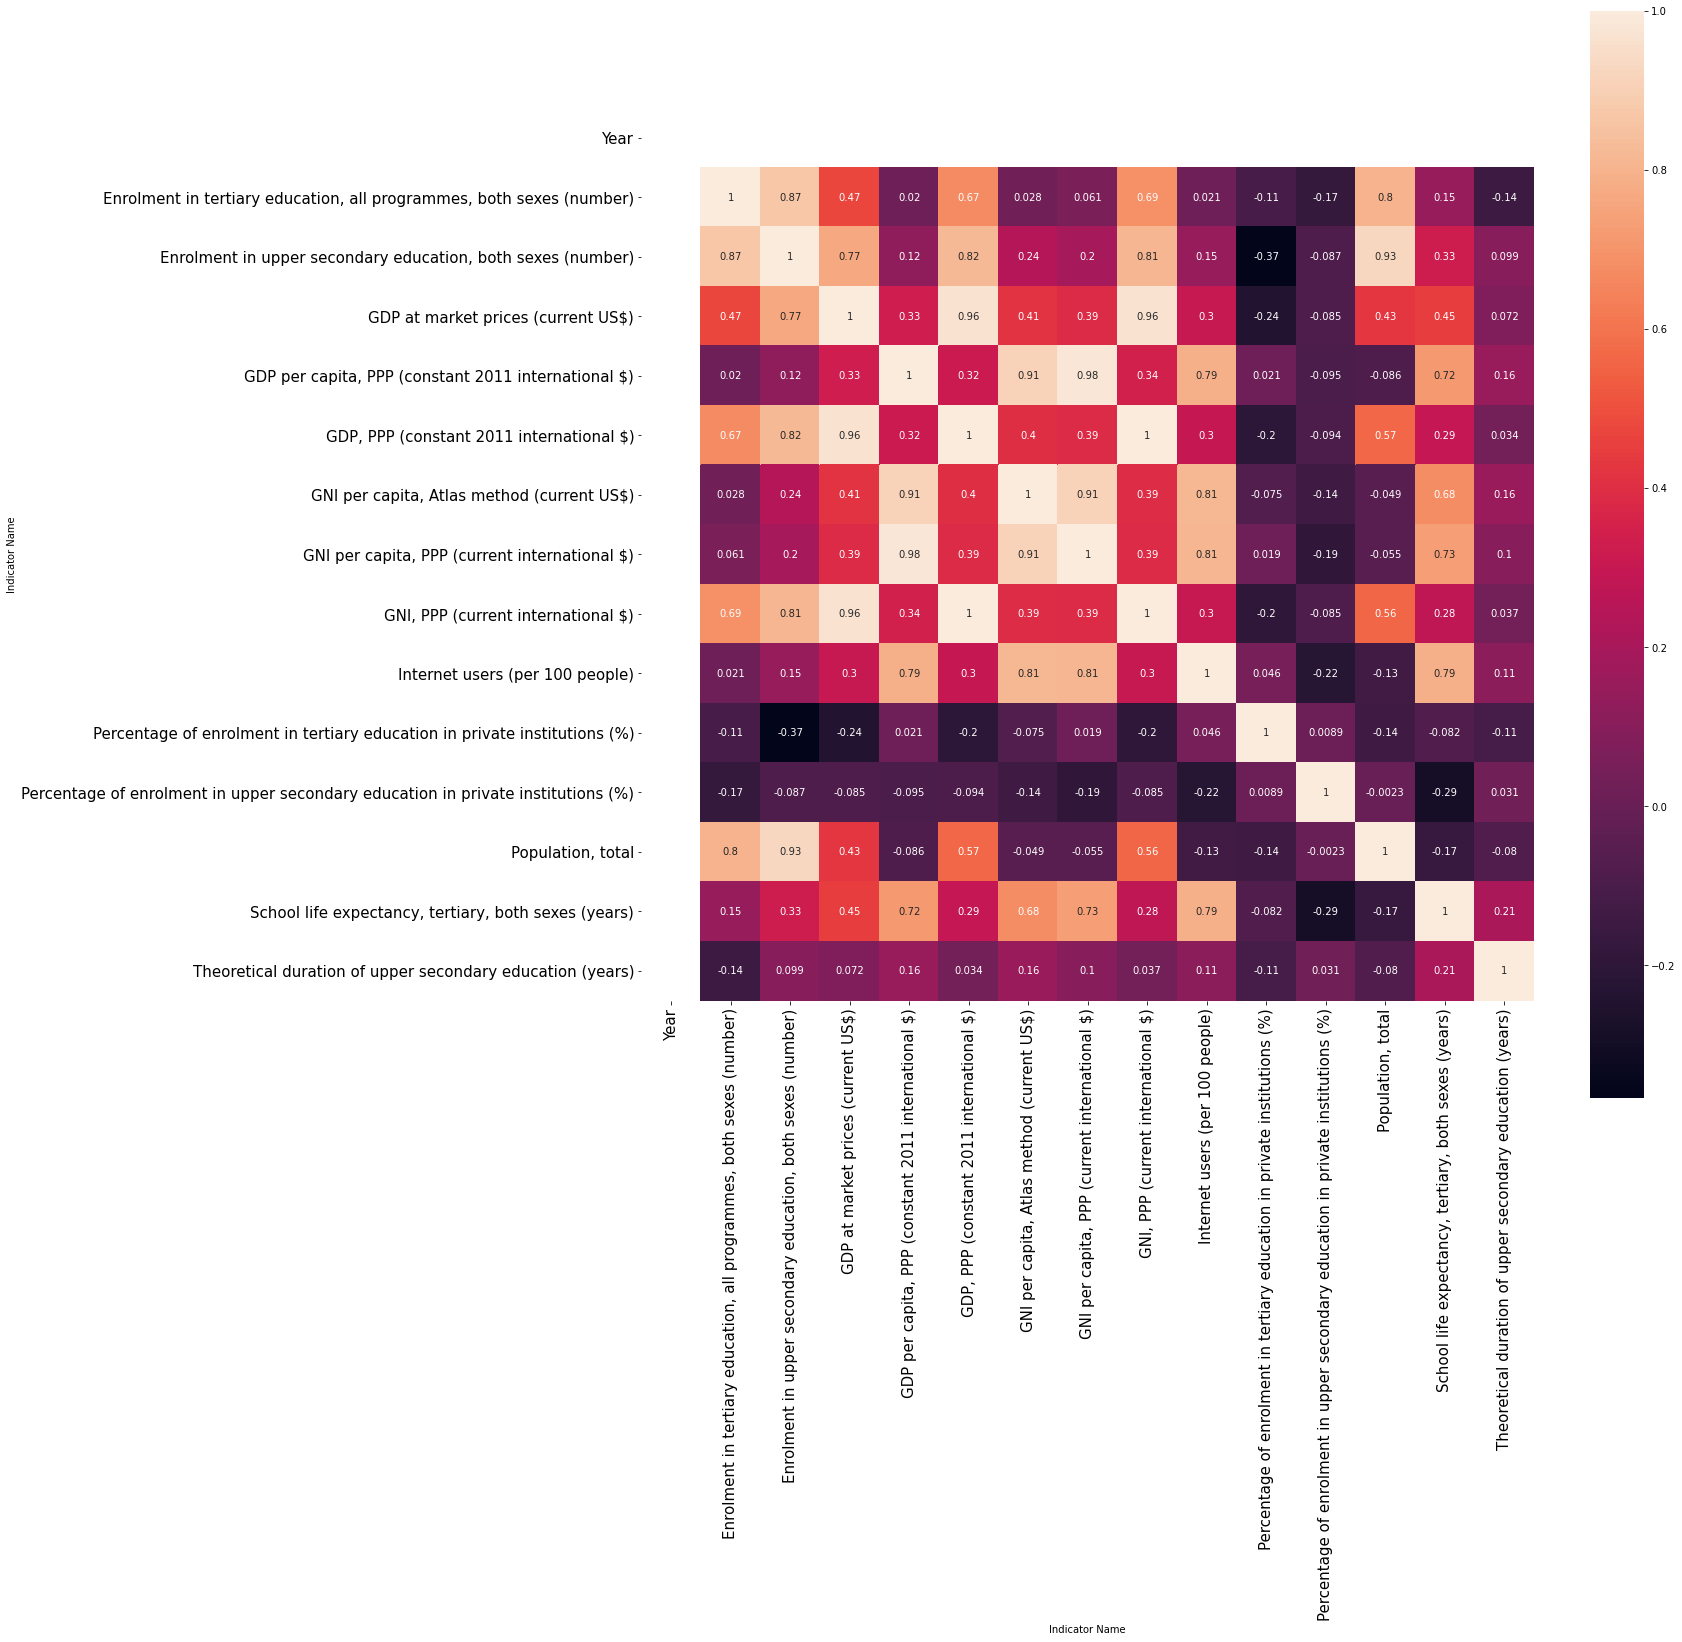

In [156]:
plt.clf()
plt.figure(figsize=(20,20))

ax = plt.subplot()
sns.heatmap(
    data=rw_data_00_16_no_outliers[rw_data_00_16_no_outliers['Year'] == 2011].corr(), 
    square=True, 
    annot=True)

ax.tick_params(
    axis='x', 
    ####colors=font_txt,
    labelsize= 15,
)

ax.tick_params(
    axis='y', 
    ####colors=font_txt,
    labelsize= 15,
)

####plt.savefig('./SavedGraphs/index.png', transparent=True)

plt.show()

#on distingue trois carrés principaux : 

    #angle haut gauche = Entrolment Tertiary; #angle bas droite = GDP market Price
        #nous donne l'idée que nous pourrons combinner les inscriptions pour avoir
        #les inscriptions totale
    
    #angle haut gauche = GDP market Price; #angle bas droite = Internet Users
        #deux sous carrés (per capita vs pas per capita): 
        #GDP market price, GDP PPP, GNI, PPP fortement corrélés
        #GDP Capita PPP, GNI capita PPP, GNI Atlas Capita
        #on priviligiera per capita (niveau de vie, plus facile à appréhender)
        #Dans capita on priviligiera le PPP (car plus connu que Atlas), et GNI car
        #on souhaiterait idéalement exprimer la richesse des citoyens plutôt que de la population
        #sur le territoire (ex : un espagnol en France impacte le PIB de la France et le RNB 
        #de l'Espage. Ainsi si les cours sont en espagnols, on préfère connaître la richesse
        #des Espagnols dans le monde (RNB) car cet Espagnol où qu'il soit dans le 
        #le monde est un client potentiel alors qu'un anglais en Espagne (compté dans le PIB 
        #espagnol _ PIB = Richesse pays) ne pourra pas suivre le cours s'il ne parle pas Espagnol)
        
    #angle haut gauche = Percent Tertiary Education; #angle bas droite = Theorical
        #Pas de corrélations si ce n'est la School life Expectancy qui est un indicateur relativement 
        #stable et se corrèle avec les autres indicateurs stables que nous avons sélectionnés
        #Nous ne le supprimons pas car il a un intérêt pour nos calculs (il permettra d'exprimer
        #le nombre d'inscription dans les lycées sur une année)
    

<h3 id='4'>4. Statistiques de nos indicateurs principaux par région du monde</h3>

rw_data_regions_00_16

In [157]:
#On souhaite analyser par région les 4 indicateurs principaux que nous avons sélectionnés

#On commence par effectuer une jointure entre rw_data_00_16 et es_country afin d'accéder 
#aux régions du monde

#On renomme Table Name car le format des noms des pays est quasi semblable

#on formatte quelques noms de pays avant
es_country['Table Name'] = es_country['Table Name'].apply(format_table_name)

es_country.rename({'Table Name' : 'Country Name'}, axis=1, inplace=True)

In [158]:
#Il existe des NaN dans nos régions, on les supprime : 

es_country.dropna(subset=['Region'], inplace=True)

In [159]:
#on effectue notre jointure : 

regions = es_country[['Country Name', 'Region']].copy()

rw_data_regions_00_16 = rw_data_00_16.merge(regions, on=['Country Name'], how='left')

In [160]:
#On conserve les indicateurs que nous souhaitons étudier

rw_data_regions_00_16 = rw_data_regions_00_16[
    ['Year',
     'Country Name',
     'Region',
     'Enrolment in tertiary education, all programmes, both sexes (number)',
     'Enrolment in upper secondary education, both sexes (number)',
     'GNI per capita, PPP (current international $)',
     'Internet users (per 100 people)',
     'Population, total'       
    ]
].copy()

#si une ligne n'est pas totalement remplie, elle est inexploitable 
rw_data_regions_00_16.dropna(inplace=True)

#on cherche la ligne avec l'année la plus récente par pays
rw_data_regions_00_16_max_year = rw_data_regions_00_16.groupby('Country Name').max().reset_index()[['Year', 'Country Name']]

#on effectue une jointure afin d'avoir les données les plus actuelles par pays
rw_data_regions_00_16 = rw_data_regions_00_16_max_year.merge(rw_data_regions_00_16, on=['Year', 'Country Name'])

#on combine upper secondary et tertiary 

rw_data_regions_00_16['Total enrolment tertiary and upper secondary (number)'] = (
    rw_data_regions_00_16['Enrolment in tertiary education, all programmes, both sexes (number)'] + 
    rw_data_regions_00_16['Enrolment in upper secondary education, both sexes (number)'])

#on supprime les inscriptions par niveau 
rw_data_regions_00_16.drop([
    'Enrolment in tertiary education, all programmes, both sexes (number)',
    'Enrolment in upper secondary education, both sexes (number)'], axis=1, 
    inplace=True
)

In [161]:
#La plupart des données se concentrent au dessus de 2010

rw_data_regions_00_16['Year'].value_counts()

#Il est bon de le prendre en considération
#On choisit de garder tous les pays cela dit 

2014    78
2013    35
2012    13
2011     9
2010     7
2004     5
2000     4
2009     4
2015     4
2001     3
2002     3
2008     3
2003     2
2005     2
2007     2
2006     1
Name: Year, dtype: int64

In [162]:
main_list_region_data = []

for j in rw_data_regions_00_16['Region'].unique():
    
    
    region_data_list = []

    for i in rw_data_regions_00_16.columns[3:]:
        empty_list = []
        empty_list.append(['Moyenne',np.mean(rw_data_regions_00_16[rw_data_regions_00_16['Region'] == j][i])])
        empty_list.append(['Médianne',np.median(rw_data_regions_00_16[rw_data_regions_00_16['Region'] == j][i])]) 
        empty_list.append(['Mode',st.mode(rw_data_regions_00_16[rw_data_regions_00_16['Region'] == j][i])[0][0]])  
        empty_list.append(['Ecart Type',np.std(rw_data_regions_00_16[rw_data_regions_00_16['Region'] == j][i])]) 
        empty_list.append(['Skewness',st.skew(rw_data_regions_00_16[rw_data_regions_00_16['Region'] == j][i])]) 
        
        region_data_list.append([i, empty_list])

    region_data_list

    main_list_region_data.append({
        'Region':j, 
        'n':rw_data_regions_00_16[rw_data_regions_00_16['Region'] == j]['Country Name'].nunique(),
        'Statistics':region_data_list
    })

In [163]:
for i in range(len(main_list_region_data)):
    print('-------------------------------------------------------\n')
    
    print('\t\t',main_list_region_data[i]['Region'], ':\n')
    print('Nombre de Pays : n=', main_list_region_data[i]['n'],'\n')
    
    for j in range(len(main_list_region_data[i]['Statistics'])):
        print(main_list_region_data[i]['Statistics'][j][0], ':')
        print('\n')
        for k in range(len(main_list_region_data[i]['Statistics'][j][1])):
            print('\t',main_list_region_data[i]['Statistics'][j][1][k][0], ':',
                 main_list_region_data[i]['Statistics'][j][1][k][1])
        print('\n')
    print('\n')

-------------------------------------------------------

		 South Asia :

Nombre de Pays : n= 8 

GNI per capita, PPP (current international $) :


	 Moyenne : 5426.25
	 Médianne : 5140.0
	 Mode : 1890.0
	 Ecart Type : 2810.311092655046
	 Skewness : 0.39204158888625856


Internet users (per 100 people) :


	 Moyenne : 13.369776357500001
	 Médianne : 13.55
	 Mode : 5.0
	 Ecart Type : 6.540313401776895
	 Skewness : 0.0828871159191525


Population, total :


	 Moyenne : 212862972.5
	 Médianne : 30707151.0
	 Mode : 304000.0
	 Ecart Type : 408232956.6831167
	 Skewness : 2.1529345825157407


Total enrolment tertiary and upper secondary (number) :


	 Moyenne : 12756213.0
	 Médianne : 1672189.0
	 Mode : 2645.0
	 Ecart Type : 26833478.454428215
	 Skewness : 2.2244883349781333




-------------------------------------------------------

		 Europe & Central Asia :

Nombre de Pays : n= 48 

GNI per capita, PPP (current international $) :


	 Moyenne : 27731.666666666668
	 Médianne : 25360.0
	 Mod

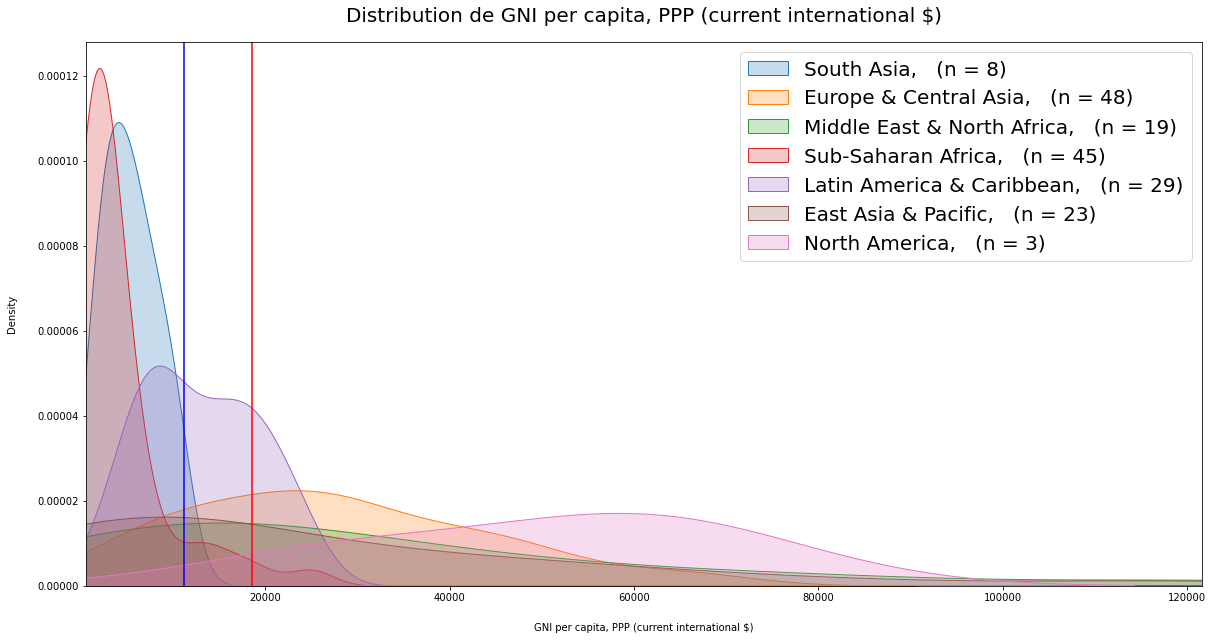

GNI per capita, PPP (current international $) :

MOYENNE : 18627.371428571427
MEDIAN : 11200.0
STANDARD DEVIATION : 20796.091169923136
SKEWNESS : 2.0946319259780557


<Figure size 432x288 with 0 Axes>

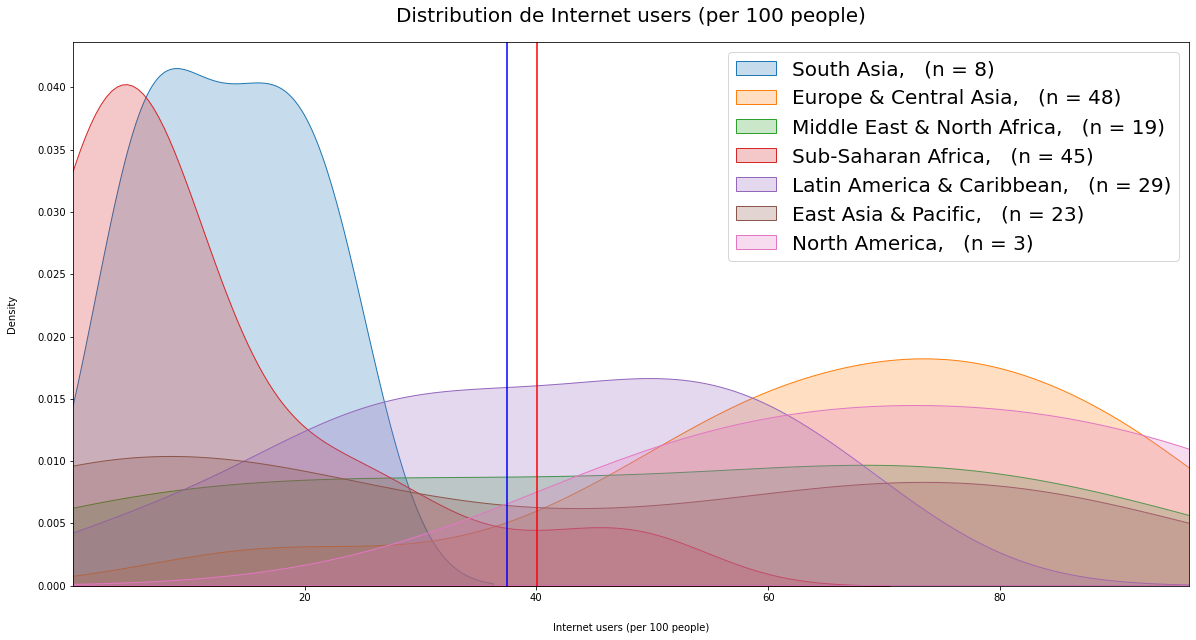

Internet users (per 100 people) :

MOYENNE : 40.02892740715428
MEDIAN : 37.5
STANDARD DEVIATION : 30.69897234020601
SKEWNESS : 0.22004854880183725


<Figure size 432x288 with 0 Axes>

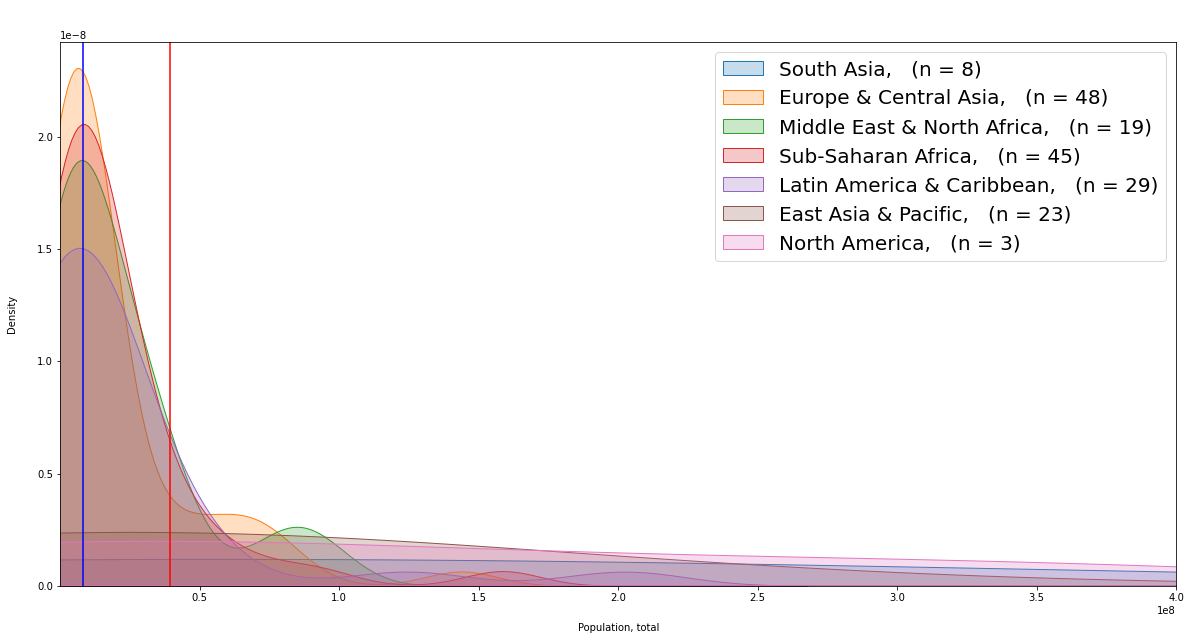

Population, total :

MOYENNE : 39496168.764223784
MEDIAN : 8188649.0
STANDARD DEVIATION : 145018098.51958045
SKEWNESS : 7.996650349176444


<Figure size 432x288 with 0 Axes>

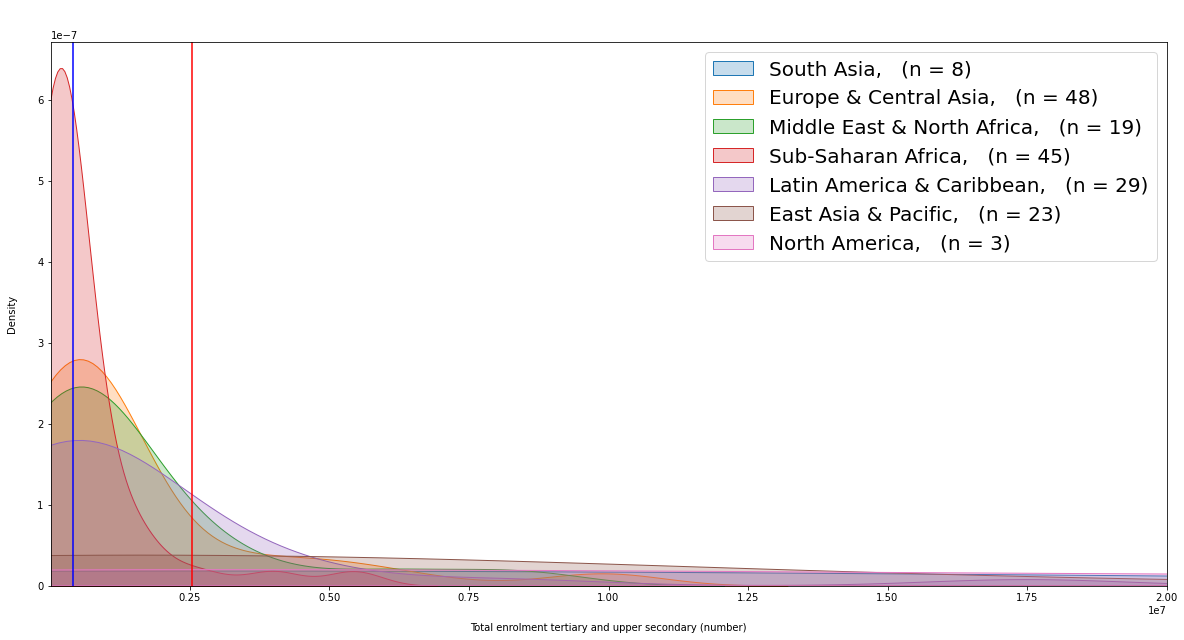

Total enrolment tertiary and upper secondary (number) :

MOYENNE : 2533657.9251785716
MEDIAN : 405404.0
STANDARD DEVIATION : 9461920.909474617
SKEWNESS : 7.643601105682084


<Figure size 432x288 with 0 Axes>

In [164]:
k = 0
for j in rw_data_regions_00_16.columns[3:]:
    
    mini = rw_data_regions_00_16[j].min()
    maxi = [rw_data_regions_00_16[j].max(),rw_data_regions_00_16[j].max(),0.4*1e9, 2*1e7]
    
    plt.figure(figsize=(20,10))
    legend_list = []
    
    ax = plt.subplot()
    
    ####ax.tick_params(axis='x', colors=font_txt)
    ####ax.tick_params(axis='y', colors=font_txt)
    
    ####ax.xaxis.label.set_color(font_txt)
    ####ax.yaxis.label.set_color(font_txt)
    
    ax.xaxis.labelpad = 20
    ax.yaxis.labelpad = 20
    
    for i in range(len(main_list_region_data)):
        legend_list.append(main_list_region_data[i]['Region'] + ',   (n = ' +str(main_list_region_data[i]['n']) + ')')
        sns.kdeplot(
            rw_data_regions_00_16[rw_data_regions_00_16['Region'] == main_list_region_data[i]['Region']][j],
            shade=True
        ).set_xlim(mini, maxi[k])
        
    leg = plt.legend(
        legend_list,
        fontsize=font_sizes,
        ####facecolor=legend_background,
    )
    
    
    
    plt.axvline(rw_data_regions_00_16[j].median(), color='blue')
    plt.axvline(rw_data_regions_00_16[j].mean(), color='red')
    
    ####for l in leg.get_texts(): l.set_color(font_txt)
    
    if k > 1:
        plt.title(
            'Distribution de {} [zoom]'.format(j),
            fontsize=font_sizes,
            pad = 20,
            color=font_txt
        )
    else: 
        plt.title(
            'Distribution de {}'.format(j),
            fontsize=font_sizes,
            pad = 20,
            ####color=font_txt
        )
    
    ####plt.savefig('./SavedGraphs/index.png', transparent=True)
    plt.show()
    plt.clf()
    k += 1
    
    print(j, ':\n')
    print('MOYENNE :', rw_data_regions_00_16[j].mean())
    print('MEDIAN :', rw_data_regions_00_16[j].median())
    print('STANDARD DEVIATION :', np.std(rw_data_regions_00_16[j], ddof=0))
    print('SKEWNESS :', st.skew(rw_data_regions_00_16[j]))    

Boxplot 

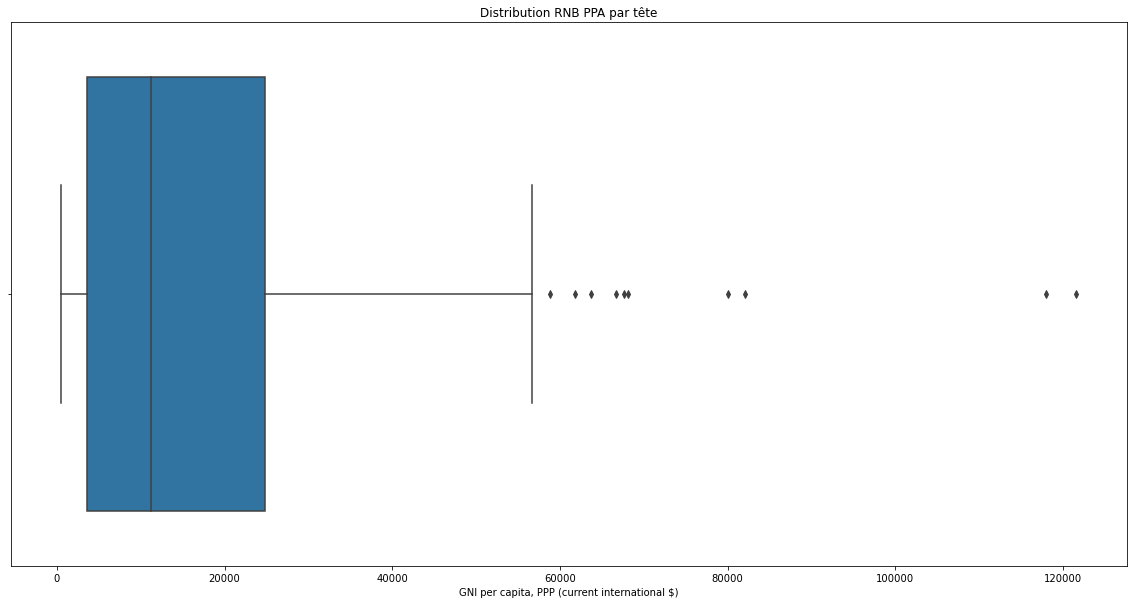

<Figure size 432x288 with 0 Axes>

In [165]:
#Ici on veut avoir une idée des outliers avec des boxplots pour nos indicateurs 

#GNI 
plt.figure(figsize=(20,10))
sns.boxplot(data=rw_data_regions_00_16, x='GNI per capita, PPP (current international $)')
####ax.tick_params(axis='x', colors=font_txt)
####ax.xaxis.label.set_color(font_txt)
plt.title('Distribution RNB PPA par tête')
plt.show()
plt.clf()

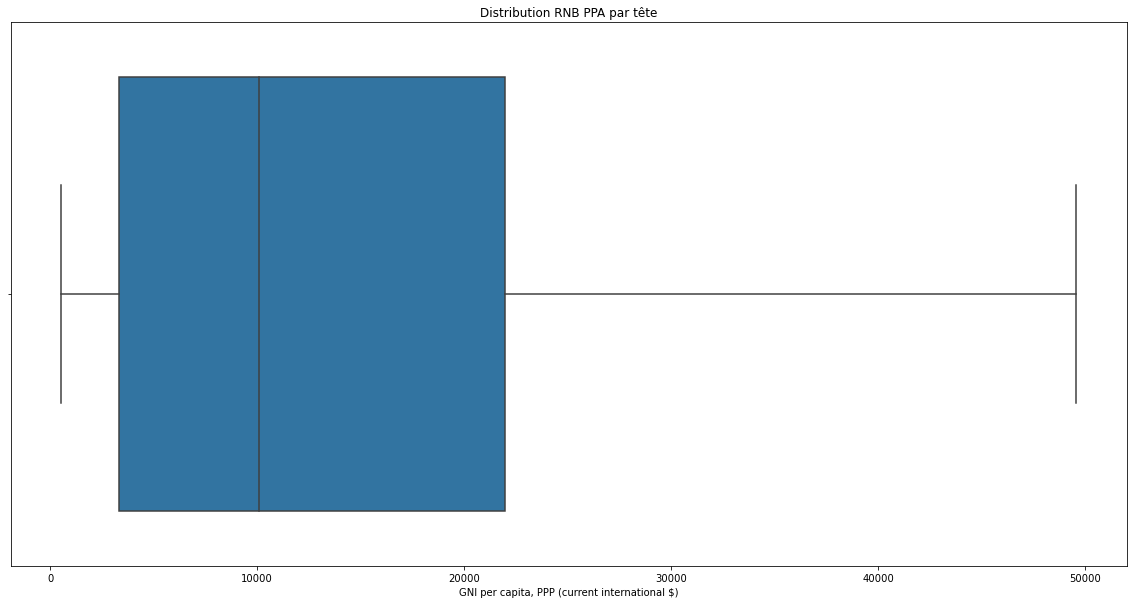

<Figure size 432x288 with 0 Axes>

In [166]:
#on scope gni
scope_gni = rw_data_regions_00_16[rw_data_regions_00_16['GNI per capita, PPP (current international $)'] < 50000]

plt.figure(figsize=(20,10))
sns.boxplot(data=scope_gni, x='GNI per capita, PPP (current international $)')
####ax.tick_params(axis='x', colors=font_txt)
####ax.xaxis.label.set_color(font_txt)
plt.title('Distribution RNB PPA par tête')
plt.show()
plt.clf()

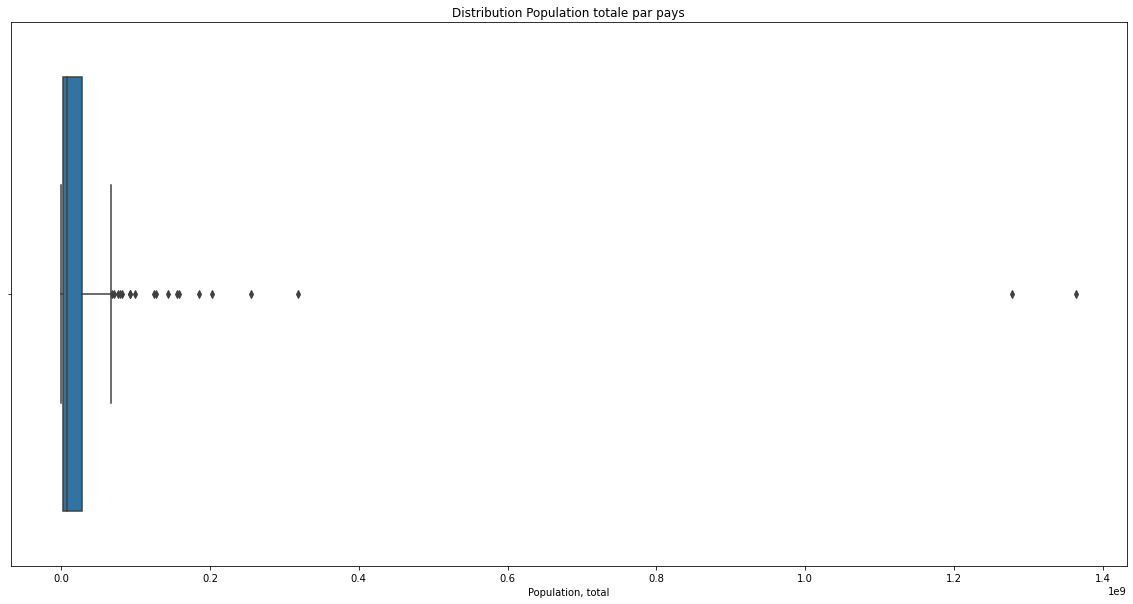

<Figure size 432x288 with 0 Axes>

In [167]:
#Population Totale

plt.figure(figsize=(20,10))
sns.boxplot(data=rw_data_regions_00_16, x='Population, total')
####ax.tick_params(axis='x', colors=font_txt)
####ax.xaxis.label.set_color(font_txt)
plt.title('Distribution Population totale par pays')
plt.show()
plt.clf()

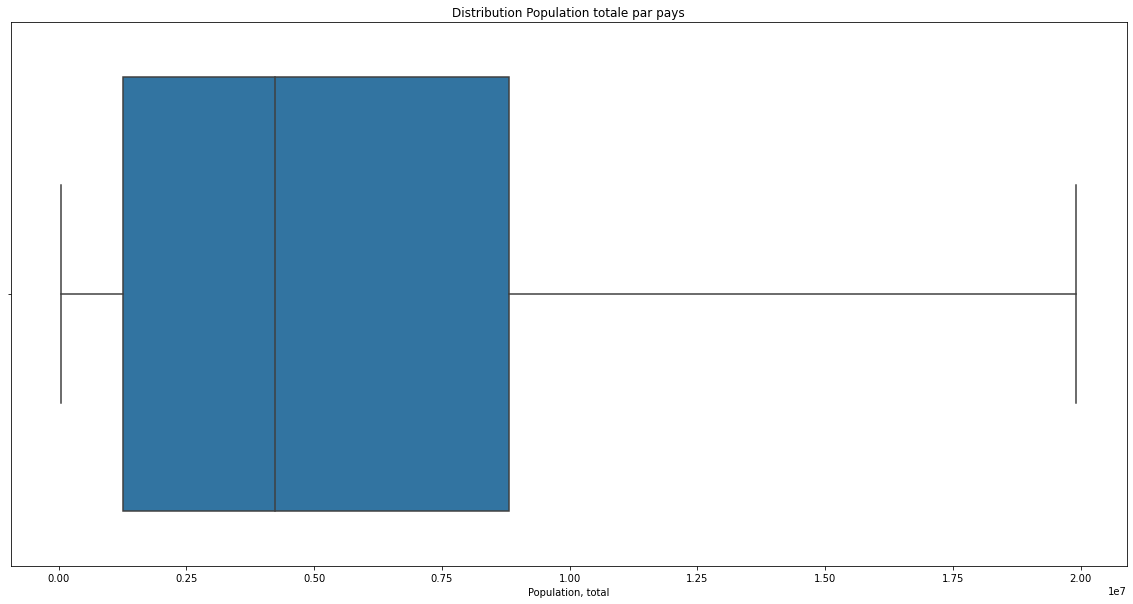

<Figure size 432x288 with 0 Axes>

In [168]:
#on scope population
scope_population = rw_data_regions_00_16[rw_data_regions_00_16['Population, total'] < 0.20*1e8]

plt.figure(figsize=(20,10))
sns.boxplot(data=scope_population, x='Population, total')
plt.title('Distribution Population totale par pays')
plt.show()
plt.clf()

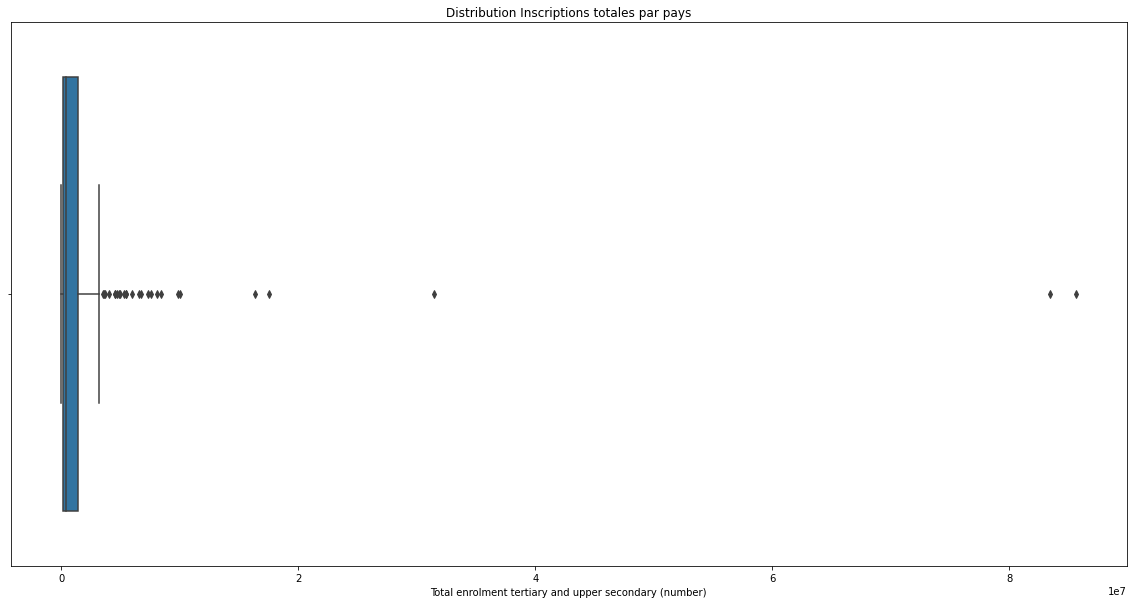

<Figure size 432x288 with 0 Axes>

In [169]:
#Total Enrolment

plt.figure(figsize=(20,10))
sns.boxplot(data=rw_data_regions_00_16, x='Total enrolment tertiary and upper secondary (number)')
plt.title('Distribution Inscriptions totales par pays')
####ax.tick_params(axis='x', colors=font_txt)
####ax.xaxis.label.set_color(font_txt)
plt.show()
plt.clf()

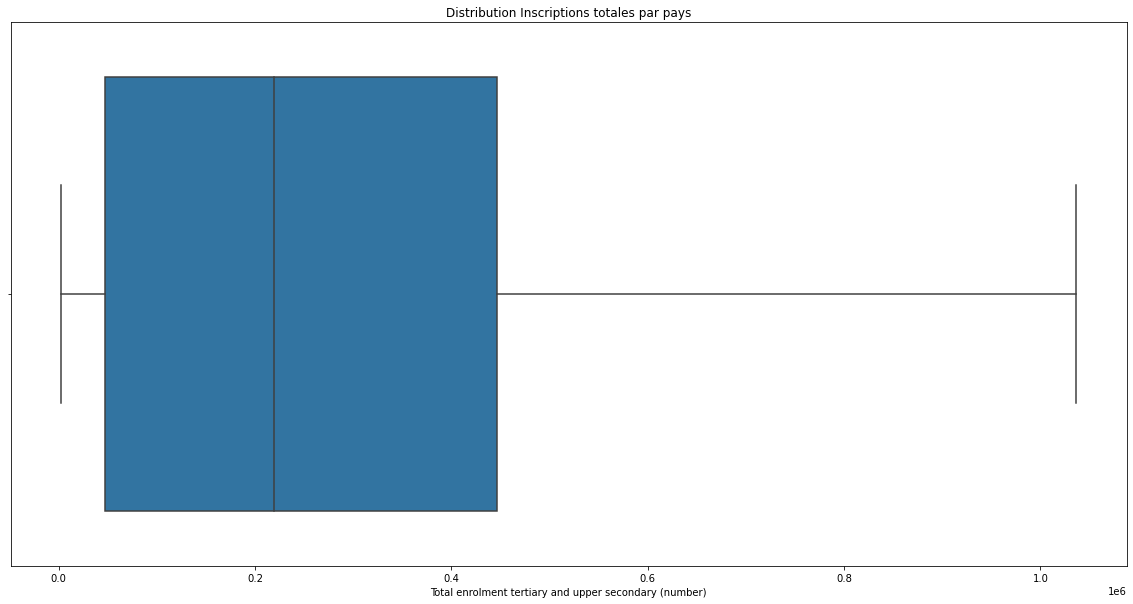

<Figure size 432x288 with 0 Axes>

In [170]:
#on scope le total des inscriptions 
scope_inscriptions = rw_data_regions_00_16[rw_data_regions_00_16['Total enrolment tertiary and upper secondary (number)'] < 1.1*1e6]

plt.figure(figsize=(20,10))
sns.boxplot(data=scope_inscriptions, x='Total enrolment tertiary and upper secondary (number)')
plt.title('Distribution Inscriptions totales par pays')
plt.show()
plt.clf()

In [171]:
#on prélève nos outliers (on les a rapporté plus haut pour les corrélations)
outliers_gni = rw_data_regions_00_16[rw_data_regions_00_16['GNI per capita, PPP (current international $)'] > 50000]['Country Name'].unique()
gni_limit = 50000
outliers_gni

array(['Bermuda', 'Brunei Darussalam', 'Hong Kong SAR, China', 'Kuwait',
       'Luxembourg', 'Macao SAR, China', 'Norway', 'Qatar',
       'Saudi Arabia', 'Singapore', 'Switzerland', 'United Arab Emirates',
       'United States'], dtype=object)

In [172]:
outliers_population = rw_data_regions_00_16[rw_data_regions_00_16['Population, total'] > 0.2*1e8]['Country Name'].unique()
population_limit = 0.2*1e8
outliers_population

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Bangladesh', 'Brazil', 'Cameroon', 'Canada', 'China', 'Colombia',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Egypt, Arab Rep.',
       'Ethiopia', 'France', 'Germany', 'Ghana', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Italy', 'Japan', 'Kenya',
       'Korea, Rep.', 'Madagascar', 'Malaysia', 'Mexico', 'Morocco',
       'Mozambique', 'Myanmar', 'Nepal', 'Nigeria', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Russian Federation', 'Saudi Arabia',
       'South Africa', 'Spain', 'Sri Lanka', 'Sudan', 'Tanzania',
       'Thailand', 'Turkey', 'Uganda', 'Ukraine', 'United Kingdom',
       'United States', 'Uzbekistan', 'Venezuela, RB', 'Yemen, Rep.'],
      dtype=object)

In [173]:
outliers_enrolment = rw_data_regions_00_16[rw_data_regions_00_16['Total enrolment tertiary and upper secondary (number)'] > 1.1*1e6]['Country Name'].unique()
enrolment_limit = 1.1*1e6
outliers_enrolment

array(['Afghanistan', 'Algeria', 'Argentina', 'Australia', 'Bangladesh',
       'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia',
       'Congo, Dem. Rep.', 'Ecuador', 'Egypt, Arab Rep.', 'Ethiopia',
       'France', 'Germany', 'Ghana', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Italy', 'Japan', 'Kazakhstan', 'Kenya',
       'Korea, Rep.', 'Malaysia', 'Mexico', 'Morocco', 'Myanmar', 'Nepal',
       'Netherlands', 'Nigeria', 'Pakistan', 'Peru', 'Philippines',
       'Poland', 'Romania', 'Russian Federation', 'Saudi Arabia',
       'South Africa', 'Spain', 'Sri Lanka', 'Sudan', 'Thailand',
       'Turkey', 'Ukraine', 'United Kingdom', 'United States',
       'Uzbekistan', 'Venezuela, RB'], dtype=object)

In [174]:
#Ce qu'il y a de plus frappant est la grandeur des écarts types qui témoignent de la présence de 
#mastodontes, d'outliers. Pour se donner un ordre d'idée, il y a plus de personnes incrites
#dans le upper secondary et les universités en Chine qu'il y a d'habitants en France, c'est la 
#même chose pour l'Inde, aux USA, les étudiants dans les niveaux qui nous intéressent représentent
#environ la moitié du nombre d'habitants en France. 

#Pour ce qui est de la disparité de nos indicateurs, jusqu'au troisième quartile de chacun 
#(Internet Users exclu) les données ne sont pas très dispersées comparé aux données au dessus du 3
#ème quartile qui s'"envolent" et présentent une forte disparité.

#Evidemment l'asymétrie de la densité des indicateurs est marquée avec une queue toujours à droite
#sauf pour internet Users qui est compris entre [0 et 100]. Ce qu'il y a d'amusant est l'écart type
#d'internet Users (environ 30) qui suggère qu'il y a peu de données au centre et donc soit des 
#pays très avancés technologiquement parlant (en termes d'accès à internet) soit beaucoup moins ! 

#Pour ce qui est des régions, 

#On voit des zones qui se démarquent : L'Amérique du nord ainsi que l'Europe 
#(ces régions sont en tête). On gardera cela dit à l'esprit que l'Amérique du Nord ne compte que
#3 pays. L'Afrique du Nord et de l'Est ainsi que l'Amérique Latine et les Caraïbes se disputent 
#la troisième place. On pourra remarquer que l'Amérique Latine semble avoir "deux vitesses" 
#puisqu'on lui distingue deux modes. 

#Pour ce qui est d'internet on distingue trois groupes : les plus avancés sont les régions de 
#l'Amérique du Nord et l'Europe. Ces régions se situent en majorité au dessus de la moyenne et 
#de la médiane de nos indicateurs.
#Viennent ensuite l'Afrique du Nord et de l'Est ainsi que l'Amérique Latine qui sont elles 
#dispersées autour de la moyenne et de la médiane. 
#Enfin, on trouve l'Asie du Sud ainsi que l'Afrique Sub-saharienne qui se trouvent en deça de la
#moyenne et de la médine. 

#On remarquera que la position des régions est similaires dans les deux indicateurs sus-mentionnés

#Pour ce qui est de la population, on a des régions qui se superposent et dont le mode le plus haut
#est tranversé par la médiane de notre indicateur. La plupart des régions est multimodale, on a
#comme des "rebonds" 

#Pour ce qui est des inscriptions dans les niveaux qui nous intéressent, on ressent la corrélation 
#avec la population quoi que les courbes semblent s'aplatir et suggèrent une plus grande disparité 
#entre ses valeurs que dans l'indicateur population

<h3 id='5'>5. Classement</h3>

Seuils

In [175]:
#On souhaite aboutir avec un classement par rapport à (tertiary+upper)*gni per capita
#en multipliant les inscriptions par la revenu par tête on peut exprimer les incriptions en 
#"masse monétaire" par pays. 

rw_treshold = rw_data_00_16[
    ['Year',
     'Country Name',
     'Enrolment in tertiary education, all programmes, both sexes (number)',
     'Enrolment in upper secondary education, both sexes (number)',
     'GNI per capita, PPP (current international $)',
     'Internet users (per 100 people)',
     'Population, total'       
    ]
].copy()

#si une ligne n'est pas totalement remplie, elle est inexploitable 
rw_treshold.dropna(inplace=True)

#on cherche la ligne avec l'année la plus récente par pays
rw_treshold_max_year = rw_treshold.groupby('Country Name').max().reset_index()[['Year', 'Country Name']]

#on effectue une jointure afin d'avoir les données les plus actuelles par pays
rw_treshold = rw_treshold_max_year.merge(rw_treshold, on=['Year', 'Country Name'])

rw_treshold

Indicator Name,Year,Country Name,"Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, total"
0,2014,Afghanistan,262874.0,968769.0,1890.0,7.000000,32758020.0
1,2014,Albania,173819.0,151937.0,11200.0,60.100000,2889104.0
2,2011,Algeria,1188562.0,1332584.0,12850.0,14.900000,36819558.0
3,2011,Angola,142798.0,303568.0,5360.0,3.100000,24218565.0
4,2012,Antigua and Barbuda,1792.0,2951.0,18580.0,58.000000,96777.0
...,...,...,...,...,...,...,...
170,2011,Uzbekistan,277437.0,1643267.0,4650.0,18.600000,29339400.0
171,2004,Vanuatu,955.0,4880.0,2080.0,4.746603,204143.0
172,2009,"Venezuela, RB",2123041.0,772871.0,16370.0,32.700000,28587323.0
173,2011,"Yemen, Rep.",267498.0,627316.0,3530.0,14.905000,24252206.0


In [176]:
#on additionne ici tertiary et upper 

rw_treshold['Total enrolment tertiary and upper secondary (number)'] = (
    rw_treshold['Enrolment in tertiary education, all programmes, both sexes (number)'] + 
    rw_treshold['Enrolment in upper secondary education, both sexes (number)'])

In [177]:
rw_treshold.drop([
    'Enrolment in tertiary education, all programmes, both sexes (number)', 
    'Enrolment in upper secondary education, both sexes (number)'
], axis=1, inplace=True)

In [178]:
#On choisit de sélectionner les pays qui sont au dessus de toutes les médianes à la fois
#c'est à dire au dessus des 50% des pays dans les quatres indicateurs
#Ci-après on renvoie les seuils (50% ; médiane)

medians = [] 
for i in rw_treshold.columns[2:]:
    medians.append([rw_treshold[i].median(), i])
    
contries_above_median = []
for i in medians:
    contries_above_median.append([i[0], i[1], rw_treshold[rw_treshold[i[1]] > i[0]]['Country Name'].unique()])
    
all_above_median = [*contries_above_median[0][2], 
 *contries_above_median[1][2],
 *contries_above_median[2][2],
 *contries_above_median[3][2],
]

all_above_median = np.array(all_above_median)

values, counts = np.unique(all_above_median, return_counts=True)

omega_array = []
for i in range(len(counts)):
    if counts[i] == 4:
        omega_array.append(values[i])
        
omega_array

['Argentina',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Brazil',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Czech Republic',
 'Dominican Republic',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iran, Islamic Rep.',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Korea, Rep.',
 'Malaysia',
 'Mexico',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'Saudi Arabia',
 'South Africa',
 'Spain',
 'Sweden',
 'Turkey',
 'United Kingdom',
 'United States']

In [179]:
contries_above_median

[[11200.0,
  'GNI per capita, PPP (current international $)',
  array(['Algeria', 'Antigua and Barbuda', 'Argentina', 'Australia',
         'Austria', 'Azerbaijan', 'Bahrain', 'Barbados', 'Belarus',
         'Belgium', 'Bermuda', 'Bosnia and Herzegovina', 'Botswana',
         'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Canada', 'Chile',
         'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
         'Czech Republic', 'Denmark', 'Dominican Republic', 'Estonia',
         'Finland', 'France', 'Gabon', 'Germany', 'Greece',
         'Hong Kong SAR, China', 'Hungary', 'Iceland', 'Iran, Islamic Rep.',
         'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Korea, Rep.',
         'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg',
         'Macao SAR, China', 'Macedonia, FYR', 'Malaysia', 'Malta',
         'Mauritius', 'Mexico', 'Montenegro', 'Netherlands', 'New Zealand',
         'Norway', 'Oman', 'Panama', 'Poland', 'Portugal', 'Puerto Rico',
         'Qatar',

Result_1

In [180]:
rw_treshold = rw_treshold[rw_treshold['Country Name'].isin(omega_array)]

rw_treshold

Indicator Name,Year,Country Name,"GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, total",Total enrolment tertiary and upper secondary (number)
5,2013,Argentina,19730.0,59.900000,4.253992e+07,4.490911e+06
7,2014,Australia,45220.0,84.000000,2.346069e+07,2.557683e+06
8,2014,Austria,49070.0,80.995825,8.541575e+06,7.844124e+05
9,2014,Azerbaijan,17100.0,75.000016,9.535079e+06,5.680420e+05
13,2014,Belarus,18320.0,59.020000,9.474511e+06,7.184780e+05
14,2014,Belgium,45030.0,85.000000,1.120906e+07,1.272323e+06
22,2013,Brazil,15780.0,51.040000,2.024086e+08,1.749070e+07
30,2000,Canada,28420.0,51.300000,3.076970e+07,2.521905e+06
33,2014,Chile,22280.0,61.110000,1.761380e+07,2.237223e+06
34,2014,China,13460.0,47.900000,1.364270e+09,8.563342e+07


In [181]:
rw_treshold = rw_treshold.copy()
rw_treshold['Enrolment*GNI'] = rw_treshold['Total enrolment tertiary and upper secondary (number)']*rw_treshold['GNI per capita, PPP (current international $)']

In [182]:
rw_treshold = rw_treshold.sort_values(by=['Enrolment*GNI'], ascending=False)

rw_treshold.columns.name = 'Classement'

In [183]:
rw_treshold = rw_treshold.reset_index()

In [184]:
rw_treshold.index += 1 
rw_treshold.drop(['index'], axis=1, inplace=True)

In [185]:
rw_treshold
#remarque : les données du Canada datent de 2000 ! 

Classement,Year,Country Name,"GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, total",Total enrolment tertiary and upper secondary (number),Enrolment*GNI
1,2014,United States,56160.0,73.000000,3.185635e+08,3.143654e+07,1.765476e+12
2,2014,China,13460.0,47.900000,1.364270e+09,8.563342e+07,1.152626e+12
3,2013,Japan,40280.0,88.219429,1.274450e+08,7.545669e+06,3.039395e+11
4,2013,Brazil,15780.0,51.040000,2.024086e+08,1.749070e+07,2.760032e+11
5,2014,Germany,48130.0,86.190000,8.098250e+07,5.492156e+06,2.643375e+11
6,2014,United Kingdom,40180.0,91.610000,6.461316e+07,6.548014e+06,2.630992e+11
7,2014,Russian Federation,24650.0,70.520000,1.438197e+08,9.818736e+06,2.420318e+11
8,2013,Turkey,22110.0,46.250000,7.578733e+07,9.971313e+06,2.204657e+11
9,2014,France,40800.0,83.750000,6.633196e+07,4.987237e+06,2.034793e+11
10,2013,"Korea, Rep.",32850.0,84.770000,5.042889e+07,5.246121e+06,1.723351e+11


In [186]:
#Premier top 15 
result_1 = rw_treshold
result_1.head(15)

#On trouvera des représentation graphiques plus bas

#Note le canada arrive en 20 ème alors que ses données datente de 2000 !

Classement,Year,Country Name,"GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, total",Total enrolment tertiary and upper secondary (number),Enrolment*GNI
1,2014,United States,56160.0,73.000000,3.185635e+08,31436535.00,1.765476e+12
2,2014,China,13460.0,47.900000,1.364270e+09,85633424.00,1.152626e+12
3,2013,Japan,40280.0,88.219429,1.274450e+08,7545669.00,3.039395e+11
4,2013,Brazil,15780.0,51.040000,2.024086e+08,17490695.00,2.760032e+11
5,2014,Germany,48130.0,86.190000,8.098250e+07,5492155.75,2.643375e+11
6,2014,United Kingdom,40180.0,91.610000,6.461316e+07,6548014.25,2.630992e+11
7,2014,Russian Federation,24650.0,70.520000,1.438197e+08,9818736.00,2.420318e+11
8,2013,Turkey,22110.0,46.250000,7.578733e+07,9971313.00,2.204657e+11
9,2014,France,40800.0,83.750000,6.633196e+07,4987237.00,2.034793e+11
10,2013,"Korea, Rep.",32850.0,84.770000,5.042889e+07,5246121.00,1.723351e+11


Result_2

In [187]:
#On essaie de préciser la taille du marché en conservants les seuils choisis
#Pour ce faire on ajoute des indicateurs à nos pays

#Cette fois on va chercher à exprimer en "masse monétaire" le nombre d'incrits sur un an et dans
#les établissements privés (cela a son importance car Academy est une start up et donc va faire
#payer ses cours). Le fait que cela soit exprimé sur une année à également son importance car 
#si l'on prend un exemple : le nombre d'incrits dans l'upper sec en France et en Australie 
#ne sont pas comparables immédiatement car en France le lycée dure 3 années tandis qu'en 
#Australie l'upper secondary dure 4 ans. Il vaut mieux avoir les chiffres pour une année afin
#d'appréhender avec plus de précision les opportunités du marché

rw_treshold_private_insight = rw_data_00_16[
    [
    'Country Name',
    'Year',
    'GNI per capita, PPP (current international $)',
    'Enrolment in tertiary education, all programmes, both sexes (number)',
    'Enrolment in upper secondary education, both sexes (number)',
    'Percentage of enrolment in upper secondary education in private institutions (%)',
    'Percentage of enrolment in tertiary education in private institutions (%)',
    'School life expectancy, tertiary, both sexes (years)',
    'Theoretical duration of upper secondary education (years)',]
].copy()

In [188]:
#Après itération des opérations qui suivent nous savons que nous perdons 
#de notre classement la Grèce et le Canada 

rw_treshold_private_insight[rw_treshold_private_insight['Country Name'].isin(['Canada', 'Greece'])]

Indicator Name,Country Name,Year,"GNI per capita, PPP (current international $)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Percentage of enrolment in upper secondary education in private institutions (%),Percentage of enrolment in tertiary education in private institutions (%),"School life expectancy, tertiary, both sexes (years)",Theoretical duration of upper secondary education (years)
578,Canada,2000,28420.0,1212161.0,1309744.0,5.54750,NaN,2.94418,3.0
579,Canada,2001,29220.0,NaN,NaN,NaN,NaN,NaN,3.0
580,Canada,2002,30070.0,NaN,NaN,NaN,NaN,NaN,3.0
581,Canada,2003,31390.0,NaN,NaN,NaN,NaN,NaN,3.0
582,Canada,2004,33020.0,NaN,NaN,NaN,NaN,NaN,4.0
583,Canada,2005,35390.0,NaN,1758100.0,6.00324,NaN,NaN,4.0
584,Canada,2006,37400.0,NaN,1789544.0,5.82025,NaN,NaN,4.0
585,Canada,2007,38860.0,NaN,1821362.0,NaN,NaN,NaN,4.0
586,Canada,2008,39680.0,NaN,1824860.0,6.01202,NaN,NaN,4.0
587,Canada,2009,38120.0,NaN,1828985.0,6.41569,NaN,NaN,4.0


In [189]:
#Nous souhaitons imputer par la valeur médiane de notre classement le pourcentage d'inscriptions
#dans le privé dans les universités dans ces pays

#Mediane = 22.86 %

rw_treshold_private_insight.loc[
    rw_treshold_private_insight['Country Name'].isin(['Canada', 'Greece']),
    'Percentage of enrolment in tertiary education in private institutions (%)'
] = rw_treshold_private_insight['Percentage of enrolment in tertiary education in private institutions (%)'].median()

In [190]:
#si une ligne n'est pas totalement remplie, elle est inexploitable 
rw_treshold_private_insight.dropna(inplace=True)

In [191]:
#on cherche la ligne avec l'année la plus récente par pays
rw_treshold_private_insight_max_year = rw_treshold_private_insight.groupby(
    'Country Name').max().reset_index()[['Year', 'Country Name']]

In [192]:
rw_treshold_private_insight = rw_treshold_private_insight_max_year.merge(rw_treshold_private_insight, on=['Year', 'Country Name'])

In [193]:
#on récupère les pays au dessus des seuils en sus

rw_treshold_private_insight = rw_treshold_private_insight[rw_treshold_private_insight['Country Name'].isin(omega_array)]

rw_treshold_private_insight

Indicator Name,Year,Country Name,"GNI per capita, PPP (current international $)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Percentage of enrolment in upper secondary education in private institutions (%),Percentage of enrolment in tertiary education in private institutions (%),"School life expectancy, tertiary, both sexes (years)",Theoretical duration of upper secondary education (years)
5,2013,Argentina,19730.0,2.768211e+06,1.722700e+06,29.621519,26.201900,4.20124,3.0
7,2013,Australia,44530.0,1.390478e+06,1.079568e+06,36.769798,8.477660,4.26626,2.0
8,2014,Austria,49070.0,4.212248e+05,3.631876e+05,10.467810,16.463240,3.87339,4.0
9,2014,Azerbaijan,17100.0,1.954010e+05,3.726410e+05,37.393360,11.077220,1.17463,2.0
12,2014,Belarus,18320.0,5.175780e+05,2.009000e+05,1.354410,10.306470,4.03213,2.0
13,2014,Belgium,45030.0,4.959100e+05,7.764130e+05,59.175720,57.074669,3.60905,4.0
19,2012,Brazil,15070.0,7.241405e+06,9.442334e+06,17.732969,71.422653,2.26195,3.0
27,2000,Canada,28420.0,1.212161e+06,1.309744e+06,5.547500,22.864571,2.94418,3.0
30,2014,Chile,22280.0,1.205182e+06,1.032041e+06,63.031601,84.468422,4.34523,4.0
31,2014,China,13460.0,4.192420e+07,4.370922e+07,10.057040,13.297520,1.95195,3.0


In [194]:
#on effectue des calculs : 

#1. On multiplie le poucentage de privé par le nombre d'inscriptions afin d'exprimer le nombre
#d'inscrits dans le privé (Academy n'est pas publique !)

rw_treshold_private_insight['Private Tertiary Enrolment (number)'] = (
    rw_treshold_private_insight['Enrolment in tertiary education, all programmes, both sexes (number)'] *
    (rw_treshold_private_insight['Percentage of enrolment in tertiary education in private institutions (%)']/100)
)

rw_treshold_private_insight['Private Upper Secondary Enrolment (number)'] = (
    rw_treshold_private_insight['Enrolment in upper secondary education, both sexes (number)'] *
    (rw_treshold_private_insight['Percentage of enrolment in upper secondary education in private institutions (%)']/100)
)

#2. Les nombres d'inscriptions englobent toutes les années. Il convient d'exprimer ce nombre 
#pour une année dans un pays. 

rw_treshold_private_insight['One Year Private Tertiary Enrolment (number)'] = (
    rw_treshold_private_insight['Private Tertiary Enrolment (number)'] /
    rw_treshold_private_insight['School life expectancy, tertiary, both sexes (years)']
)

rw_treshold_private_insight['One Year Upper Secondary Enrolment (number)'] = (
    rw_treshold_private_insight['Private Upper Secondary Enrolment (number)'] /
    rw_treshold_private_insight['Theoretical duration of upper secondary education (years)']
)

#3. On additionne les One Year pour avoir un total d'inscription sur un an

rw_treshold_private_insight['Total One Year Private (number)'] = (
    rw_treshold_private_insight['One Year Private Tertiary Enrolment (number)']+
    rw_treshold_private_insight['One Year Upper Secondary Enrolment (number)']
)

#4. On multiplie par le RNB par tête PPA afin d'exprimer le marché en une masse monétaire

rw_treshold_private_insight['Market\'s monetary mass'] = (
    rw_treshold_private_insight['GNI per capita, PPP (current international $)']*
    rw_treshold_private_insight['Total One Year Private (number)']
)

In [195]:
result_2 = rw_treshold_private_insight.sort_values(by='Market\'s monetary mass', ascending=False)

result_2.columns.name = 'Classement'
result_2 = result_2.reset_index()

result_2.index += 1 
result_2.drop(['index'], axis=1, inplace=True)

In [196]:
#Second top 15 
result_2.head(15)

#On trouvera des représentation graphiques plus bas

Classement,Year,Country Name,"GNI per capita, PPP (current international $)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Percentage of enrolment in upper secondary education in private institutions (%),Percentage of enrolment in tertiary education in private institutions (%),"School life expectancy, tertiary, both sexes (years)",Theoretical duration of upper secondary education (years),Private Tertiary Enrolment (number),Private Upper Secondary Enrolment (number),One Year Private Tertiary Enrolment (number),One Year Upper Secondary Enrolment (number),Total One Year Private (number),Market's monetary mass
1,2014,United States,56160.0,19700220.00,11736315.0,7.976240,27.525360,4.46825,3.0,5.422556e+06,9.361167e+05,1.213575e+06,3.120389e+05,1.525614e+06,8.567848e+10
2,2014,United Kingdom,40180.0,2352932.75,4195081.5,76.587387,100.000000,2.78431,4.0,2.352933e+06,3.212903e+06,8.450685e+05,8.032258e+05,1.648294e+06,6.622847e+10
3,2014,China,13460.0,41924200.00,43709224.0,10.057040,13.297520,1.95195,3.0,5.574879e+06,4.395854e+06,2.856056e+06,1.465285e+06,4.321341e+06,5.816525e+10
4,2013,Japan,40280.0,3862749.00,3682920.0,31.694880,78.703613,3.12058,3.0,3.040123e+06,1.167297e+06,9.742173e+05,3.890990e+05,1.363316e+06,5.491438e+10
5,2012,Brazil,15070.0,7241405.00,9442334.0,17.732969,71.422653,2.26195,3.0,5.172004e+06,1.674406e+06,2.286524e+06,5.581354e+05,2.844660e+06,4.286902e+10
6,2013,"Korea, Rep.",32850.0,3342264.00,1903857.0,43.660210,80.668854,4.80646,3.0,2.696166e+06,8.312280e+05,5.609463e+05,2.770760e+05,8.380223e+05,2.752903e+10
7,2014,France,40800.0,2388880.00,2598357.0,31.050011,20.783800,3.18179,3.0,4.965000e+05,8.067901e+05,1.560442e+05,2.689300e+05,4.249743e+05,1.733895e+10
8,2014,Mexico,17230.0,3419391.00,4682336.0,19.836870,30.612289,1.54864,3.0,1.046754e+06,9.288289e+05,6.759181e+05,3.096096e+05,9.855278e+05,1.698064e+10
9,2014,"Iran, Islamic Rep.",17880.0,4685386.00,3691835.0,8.881060,41.520741,3.12260,4.0,1.945407e+06,3.278741e+05,6.230087e+05,8.196852e+04,7.049772e+05,1.260499e+10
10,2013,Australia,44530.0,1390478.00,1079568.0,36.769798,8.477660,4.26626,2.0,1.178800e+05,3.969550e+05,2.763076e+04,1.984775e+05,2.261082e+05,1.006860e+10


<h3 id='6'>6. Projections</h3>

In [197]:
selection_all_bis = [
    selection_indicators_secondary,
    selection_indicators_tertiary,
    selection_indicators_economic_topics_group,
    selection_indicators_population,
    selection_indicators_technic,
]


selection_all_in_one_bis = []

for i in range(len(selection_all_bis)):
    for j in range(len(selection_all_bis[i])):
        selection_all_in_one_bis.append(selection_all_bis[i][j])
    


rw_data_fork_1 = rw_data_fork_1[rw_data_fork_1['Indicator Name'].isin(selection_all_in_one_bis)]

rw_data_fork_1 = rw_data_fork_1.pivot(
    columns='Indicator Name',
    index=['Country Name','Year'], 
    values='Result'
).reset_index()



In [198]:
#on impute la médiane à la Grèce et au Canada de la colonne Incriptions privé Universités
#Afin de ne pas perdre ces pays :

rw_data_fork_1.loc[
    rw_data_fork_1['Country Name'].isin(['Canada', 'Greece']),
    'Percentage of enrolment in tertiary education in private institutions (%)'
] = 22.86

In [199]:
#on prépare ce dont nous aurons besoin : 

#Une df pour regrouper les projections
projections = pd.DataFrame(columns=['Year','Country Name'])

#une série Year qui va nous servir (2017 jusqu'à 2030)
projected_years = pd.Series(range(2017,2031))

#Une df pour chaque indicateur que nous allons projeter : 

#GNI
gni_indicator = 'GNI per capita, PPP (current international $)'
gni_per_capita_projection = rw_data_fork_1[['Year', 'Country Name', gni_indicator]].dropna()

#Population 
population_indicator = 'Population, total'
population_per_capita_projection = rw_data_fork_1[['Year', 'Country Name', population_indicator]].dropna()

#Internet Users
internet_indicator = 'Internet users (per 100 people)'
internet_users_percent_projection = rw_data_fork_1[['Year', 'Country Name',internet_indicator]].dropna()

#Enrolment Tertiary 
enrollment_tertiary_indicator = 'Enrolment in tertiary education, all programmes, both sexes (number)'
enrollment_tertiary_projection = rw_data_fork_1[['Year', 'Country Name', enrollment_tertiary_indicator]].dropna()

#Enrolment Upper Secondary

enrollment_upper_indicator = 'Enrolment in upper secondary education, both sexes (number)'
enrollment_upper_projection = rw_data_fork_1[['Year', 'Country Name', enrollment_upper_indicator]].dropna()

#School life expectatncy Tertiary

school_life_tertiary_indicator =  'School life expectancy, tertiary, both sexes (years)'
school_life_tertiary_projection = rw_data_fork_1[['Year','Country Name',school_life_tertiary_indicator]].dropna()

#Theoretical duration upper secondary

theorical_duration_secondary_indicator = 'Theoretical duration of upper secondary education (years)'
theorical_duration_secondary_projection = rw_data_fork_1[['Year','Country Name', theorical_duration_secondary_indicator]].dropna()

#Private Tertiary

private_tertiary_indicator = 'Percentage of enrolment in tertiary education in private institutions (%)'
private_tertiary_projection = rw_data_fork_1[['Year','Country Name', private_tertiary_indicator]].dropna()

#Private Upper Secondary 

private_upper_secondary_indicator = 'Percentage of enrolment in upper secondary education in private institutions (%)'
private_upper_secondary_projection = rw_data_fork_1[['Year','Country Name', private_upper_secondary_indicator]].dropna()


In [200]:
#on fait les calculs : 

#GNI

gni_projected, na_gni_projected = do_linear_regression(gni_per_capita_projection, gni_indicator)

#Population

population_projected, na_population_projected = do_linear_regression(population_per_capita_projection, population_indicator)

#Internet Users

internet_projected, na_internet_projected  = do_linear_regression(internet_users_percent_projection, internet_indicator, percent=True)

#Enrolment Tertiary 

enrollment_tertiary_projected, na_enrollment_tertiary_projected  = do_linear_regression(enrollment_tertiary_projection, enrollment_tertiary_indicator)

#Enrolment Upper Secondary

enrollment_upper_projected, na_enrollment_upper_projected  = do_linear_regression(enrollment_upper_projection, enrollment_upper_indicator)

#School life expectatncy Tertiary

school_life_tertiary_projected, na_school_life_tertiary_projected  = do_linear_regression(school_life_tertiary_projection, school_life_tertiary_indicator)

#Theoretical duration upper secondary

theorical_duration_secondary_projected, na_theorical_duration_secondary_projected  = do_linear_regression(theorical_duration_secondary_projection, theorical_duration_secondary_indicator)

#Private Tertiary

private_tertiary_projected, na_private_tertiary_projected  = do_linear_regression(private_tertiary_projection, private_tertiary_indicator, percent=True)

#Private Upper Secondary 

private_upper_secondary_projected, na_private_upper_secondary_projected  = do_linear_regression(private_upper_secondary_projection, private_upper_secondary_indicator, percent=True)

In [201]:
#on effectue des jointures externes pour remplir notre df projection

projections = projections.merge(gni_projected, on=['Year','Country Name'], how='outer')

projections = projections.merge(population_projected, on=['Year','Country Name'], how='outer')
projections['Year'] = projections['Year'].astype('int32')

projections = projections.merge(internet_projected, on=['Year','Country Name'], how='outer')

projections = projections.merge(enrollment_tertiary_projected, on=['Year','Country Name'], how='outer')

projections = projections.merge(enrollment_upper_projected, on=['Year','Country Name'], how='outer')

projections = projections.merge(school_life_tertiary_projected, on=['Year','Country Name'], how='outer')

projections = projections.merge(theorical_duration_secondary_projected, on=['Year','Country Name'], how='outer')

projections = projections.merge(private_tertiary_projected, on=['Year','Country Name'], how='outer')

projections = projections.merge(private_upper_secondary_projected, on=['Year','Country Name'], how='outer')

In [202]:
#Parenthèse sur les pays où l'on a effectuer une régression linéaire alors que le coefficient
#linéaire est compris entre ]-0.7 ; 0.7[ cad pas fortement corrélés au temps (aux années)

In [203]:
#On a stocké ces valeurs dans les variables na (deuxième valeur que renvoie notre fonction
#do_linear_regression)

#Les voici : 
na_gni_projected

[]

In [204]:
na_population_projected

[]

In [205]:
na_internet_projected

['American Samoa',
 'Korea, Dem. People’s Rep.',
 'Northern Mariana Islands',
 'Turks and Caicos Islands']

In [206]:
na_enrollment_tertiary_projected

['Curacao']

In [207]:
na_enrollment_upper_projected

['Curacao',
 'Korea, Dem. People’s Rep.',
 'Micronesia, Fed. Sts.',
 'Papua New Guinea',
 'Somalia',
 'Trinidad and Tobago',
 'Turkmenistan']

In [208]:
na_school_life_tertiary_projected

['Curacao', 'Singapore']

In [209]:
na_private_upper_secondary_projected

['Central African Republic',
 'Curacao',
 'Equatorial Guinea',
 'Guinea-Bissau',
 'Maldives',
 'Myanmar',
 'Sint Maarten (Dutch part)',
 'Tanzania',
 'Togo',
 'Tonga',
 'Tuvalu',
 'Uganda',
 'Vanuatu']

In [210]:
#Ici il nous faut remarquer deux cas particuliers 

In [211]:
#on ignore cette liste car les données sont stables pour cet indicateur dans les projections
#on a un "workaround" pour ce cas dans notre fonction

na_theorical_duration_secondary_projected 

['Afghanistan',
 'Algeria',
 'American Samoa',
 'Antigua and Barbuda',
 'Aruba',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'Eritrea',
 'Estonia',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Germany',
 'Greece',
 'Grenada',
 'Guinea',
 'Guyana',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Korea, Dem. People’s Rep.',
 'Korea, Rep.',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Liechtens

In [212]:
#il en va de même pour cet indicateur, certaines valeurs ne changent pas dans les projections
#deux cas possibles : soit ne change pas sachant que dans les données factuelles que nous avons
# n données > 1; soit n données factuelles =< 1 => projections ne change pas mais pas viable dans
#ce dernier cas

na_private_tertiary_projected

['Algeria',
 'Canada',
 'Congo, Dem. Rep.',
 'Greece',
 'Grenada',
 'Iraq',
 'Libya',
 'Liechtenstein',
 'Maldives',
 'Mali',
 'Marshall Islands',
 'Myanmar',
 'Nicaragua',
 'Palau',
 'Papua New Guinea',
 'Seychelles',
 'Sint Maarten (Dutch part)',
 'Sudan',
 'Timor-Leste',
 'Tonga',
 'Trinidad and Tobago',
 'Turks and Caicos Islands',
 'United Kingdom']

In [213]:
#on cherche les valeurs n données factuelles <=1 
na_private_tertiary_projected_study = rw_data_fork_1[rw_data_fork_1['Country Name'].isin(na_private_tertiary_projected)]
na_private_tertiary_projected_study = na_private_tertiary_projected_study[['Country Name', 'Year','Percentage of enrolment in upper secondary education in private institutions (%)']].dropna()

In [214]:
#les voici:

to_takeaway = []
for i in na_private_tertiary_projected:
    if na_private_tertiary_projected_study[na_private_tertiary_projected_study['Country Name'] == i].shape[0] < 2 :
        to_takeaway.append(i)

to_takeaway

['Iraq',
 'Maldives',
 'Myanmar',
 'Sint Maarten (Dutch part)',
 'Tonga',
 'Trinidad and Tobago']

In [215]:
#on crée une liste des pays qui sont sortis au moins une fois

np.unique(
    [*na_gni_projected, 
    *na_population_projected, 
    *na_internet_projected, 
    *na_enrollment_tertiary_projected,
    *na_enrollment_upper_projected,
    *na_school_life_tertiary_projected,
    *na_private_upper_secondary_projected,
    *to_takeaway
    ]
)

array(['American Samoa', 'Central African Republic', 'Curacao',
       'Equatorial Guinea', 'Guinea-Bissau', 'Iraq',
       'Korea, Dem. People’s Rep.', 'Maldives', 'Micronesia, Fed. Sts.',
       'Myanmar', 'Northern Mariana Islands', 'Papua New Guinea',
       'Singapore', 'Sint Maarten (Dutch part)', 'Somalia', 'Tanzania',
       'Togo', 'Tonga', 'Trinidad and Tobago', 'Turkmenistan',
       'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Vanuatu'],
      dtype='<U25')

In [216]:
#Nous n'en ferons rien car nous savons a posteriori que ces pays ne sont pas au dessus des seuils
#que nous filtrons

#Fin parenthèse sur les pays avec projections sachant que la corrélation linéaire est faible

<h6>Classement</h6>

2022

1

In [217]:
projections2022 = projections[projections['Year'] == 2022]

In [218]:
projections2022_1 = projections2022[
    ['Year',
     'Country Name',
     'Enrolment in tertiary education, all programmes, both sexes (number)',
     'Enrolment in upper secondary education, both sexes (number)',
     'GNI per capita, PPP (current international $)',
     'Internet users (per 100 people)',
     'Population, total'       
    ]
].copy()

#si une ligne n'est pas totalement remplie, elle est inexploitable 
projections2022_1.dropna(inplace=True)

In [219]:
#on additionne ici tertiary et upper 

projections2022_1['Total enrolment tertiary and upper secondary (number)'] = (
    projections2022_1['Enrolment in tertiary education, all programmes, both sexes (number)'] + 
    projections2022_1['Enrolment in upper secondary education, both sexes (number)'])

In [220]:
#on renvoie les seuils (50% ; médiane)

medians = [] 
for i in projections2022_1.columns[2:]:
    medians.append([projections2022_1[i].median(), i])
    
contries_above_median = []
for i in medians:
    contries_above_median.append([i[0], i[1], projections2022_1[projections2022_1[i[1]] > i[0]]['Country Name'].unique()])
    
all_above_median = [*contries_above_median[0][2], 
 *contries_above_median[1][2],
 *contries_above_median[2][2],
 *contries_above_median[3][2],
]

all_above_median = np.array(all_above_median)

values, counts = np.unique(all_above_median, return_counts=True)

zeta_array = []
for i in range(len(counts)):
    if counts[i] == 4:
        zeta_array.append(values[i])
        
zeta_array

['Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong SAR, China',
 'Hungary',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Korea, Rep.',
 'Malaysia',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'Saudi Arabia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'United States',
 'Venezuela, RB']

In [221]:
#Parenthèse sur l'Iran

In [222]:
#L'Iran, qui était haut dans nos classements précédents n'est pas au dessus de la médiane 
#des utilisateurs internet dans nos projections
for i in contries_above_median:
    if 'Iran, Islamic Rep.' in i[2]:
        print(i[1])
        
#L'Iran est au dessus de toutes les médianes sauf d'Internet Users : 

Enrolment in tertiary education, all programmes, both sexes (number)
Enrolment in upper secondary education, both sexes (number)
GNI per capita, PPP (current international $)
Population, total
Total enrolment tertiary and upper secondary (number)


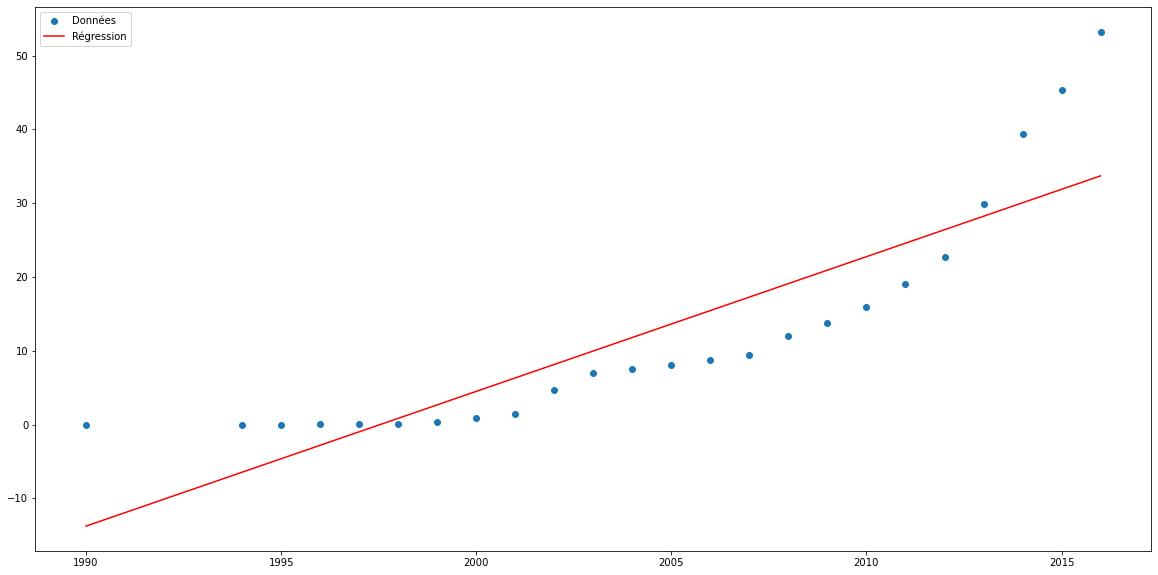

In [223]:
#Après avoir creusé la question de l'Iran on s'aperçoit que notre régression est biaisée 
#par une progression à deux vitesse
#On peut distinguer une progression lente entre 90 et 2004 avant d'entammer une phase
#de progression beaucoup plus significative entre 2004 et 2016


iran_df = rw_data_fork_1[rw_data_fork_1['Country Name'] == 'Iran, Islamic Rep.'].dropna(subset=['Internet users (per 100 people)'])

x = iran_df['Year']
y = iran_df['Internet users (per 100 people)']

res_iran = st.linregress(x, y)

plt.figure(figsize=(20,10))

plt.plot(x, y, 'o', label='Données')

plt.plot(x, res_iran.intercept + res_iran.slope*x, 'r', label='Régression')

plt.legend()

plt.show()

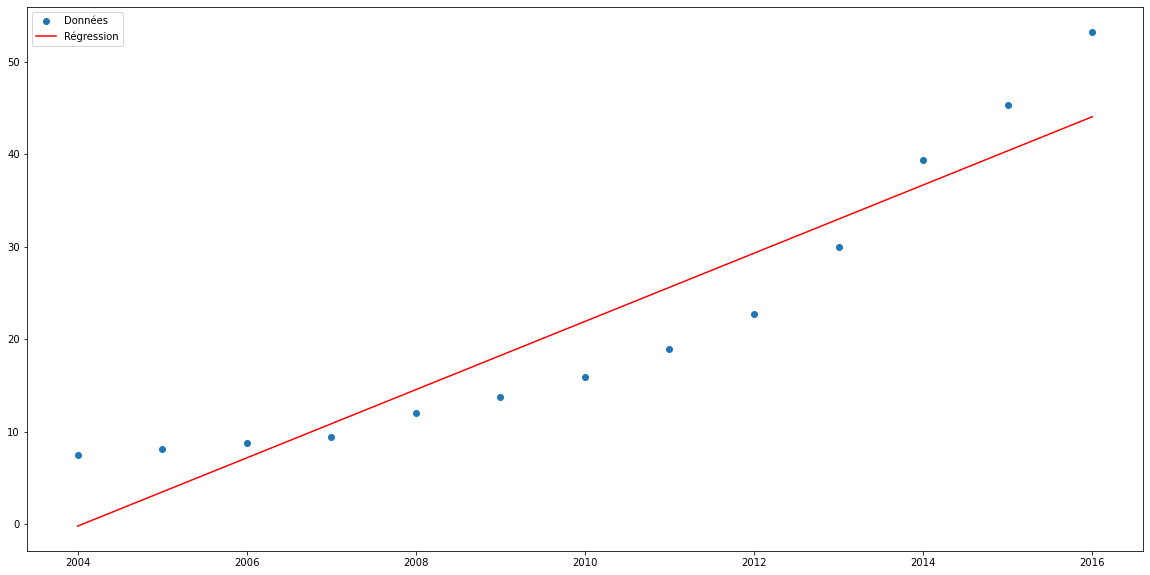

In [224]:
#Si l'on se concentre sur la période > 2003
#On obtient : 

iran_df = rw_data_fork_1[(rw_data_fork_1['Country Name'] == 'Iran, Islamic Rep.') & (rw_data_fork_1['Year'] > 2003)].dropna(subset=['Internet users (per 100 people)'])

x = iran_df['Year']
y = iran_df['Internet users (per 100 people)']

res_iran = st.linregress(x, y)

plt.figure(figsize=(20,10))

plt.plot(x, y, 'o', label='Données')

plt.plot(x, res_iran.intercept + res_iran.slope*x, 'r', label='Régression')

plt.legend()

plt.show()

In [225]:
#Numériquement : 

iran_extentsion_df = pd.DataFrame(columns=['Year','Country Name',
                             'Internet users (per 100 people)',
                            ],index=np.arange(14))

iran_extentsion_df['Country Name'] = 'Iran, Islamic Rep.'
iran_extentsion_df['Year'] = projected_years
iran_extentsion_df['Internet users (per 100 people)'] = res_iran.intercept + res_iran.slope*iran_extentsion_df['Year']

In [226]:
#La médiane estimée des utilisateurs en 2022 est de 57.01
contries_above_median[3][0]

57.01680211704843

In [227]:
iran_extentsion_df[iran_extentsion_df['Year'] == 2022]

#on peut ajouter l'iran à notre liste de pays sélectionnés

,Year,Country Name,Internet users (per 100 people)
5,2022,"Iran, Islamic Rep.",66.175993


In [228]:
#On pourra se servir de cette valeur pour justifier l'ajout de l'Iran dans les projections
#en 2030 car médiane 2030 estimée à 72.17%
iran_extentsion_df[iran_extentsion_df['Year'] == 2030]

,Year,Country Name,Internet users (per 100 people)
13,2030,"Iran, Islamic Rep.",95.67118


In [229]:
zeta_array.append('Iran, Islamic Rep.')

In [230]:
#Fin Parenthèse sur l'Iran

In [231]:
projections2022_1 = projections2022_1[projections2022_1['Country Name'].isin(zeta_array)]

In [232]:
projections2022_1 = projections2022_1.copy()
projections2022_1['Enrolment*GNI'] = projections2022_1['Total enrolment tertiary and upper secondary (number)']*projections2022_1['GNI per capita, PPP (current international $)']

In [233]:
projections_result_2022_1 = projections2022_1.sort_values(by=['Enrolment*GNI'], ascending=False)

projections_result_2022_1.columns.name = 'Classement'
projections_result_2022_1 = projections_result_2022_1.reset_index()
projections_result_2022_1.index += 1 
projections_result_2022_1.drop(['index'], axis=1, inplace=True)

In [234]:
projections_result_2022_1

#On trouvera des représentation graphiques plus bas (Comparaisons)

Classement,Year,Country Name,"Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, total",Total enrolment tertiary and upper secondary (number),Enrolment*GNI
1,2022,United States,2.148336e+07,1.300275e+07,67187.287342,100.000000,3.396130e+08,3.448612e+07,2.317029e+12
2,2022,China,3.563739e+07,6.420070e+07,16096.351241,59.762754,1.503534e+09,9.983809e+07,1.607029e+12
3,2022,Japan,4.799999e+06,2.814493e+06,47336.461131,100.000000,1.351100e+08,7.614493e+06,3.604431e+11
4,2022,United Kingdom,3.072799e+06,3.625309e+06,48984.106634,100.000000,6.432537e+07,6.698108e+06,3.281009e+11
5,2022,Germany,3.190980e+06,2.629429e+06,55164.008954,100.000000,8.331042e+07,5.820409e+06,3.210771e+11
6,2022,Brazil,7.456426e+06,9.475461e+06,17942.712658,70.762696,2.283682e+08,1.693189e+07,3.038040e+11
7,2022,Russian Federation,8.584092e+06,1.566579e+06,28952.159137,82.479284,1.493939e+08,1.015067e+07,2.938838e+11
8,2022,"Korea, Rep.",4.485370e+06,1.809533e+06,42936.776557,100.000000,5.514459e+07,6.294903e+06,2.702828e+11
9,2022,France,2.825457e+06,2.626966e+06,48765.419210,100.000000,6.842574e+07,5.452423e+06,2.658897e+11
10,2022,Turkey,4.465815e+06,5.184974e+06,26411.656492,68.085384,8.428770e+07,9.650789e+06,2.548933e+11


2

In [235]:
projections2022_2 = projections2022[
    [
        'Country Name',
        'Year',
        'GNI per capita, PPP (current international $)',
        'Enrolment in tertiary education, all programmes, both sexes (number)',
        'Enrolment in upper secondary education, both sexes (number)',
        'Percentage of enrolment in upper secondary education in private institutions (%)',
        'Percentage of enrolment in tertiary education in private institutions (%)',
        'School life expectancy, tertiary, both sexes (years)',
        'Theoretical duration of upper secondary education (years)',
    ]
].copy()

#si une ligne n'est pas totalement rempli, elle est inexploitable 
projections2022_2.dropna(inplace=True)

In [236]:
#on récupère les pays au dessus des seuils en sus

projections2022_2 = projections2022_2[projections2022_2['Country Name'].isin(zeta_array)].copy()

In [237]:
#on effectue des calculs : 

#1. On multiplie le poucentage de privé par le nombre d'inscriptions afin d'exprimer le nombre
#d'inscrits dans le privé (Academy n'est pas publique !)

projections2022_2['Private Tertiary Enrolment (number)'] = (
    projections2022_2['Enrolment in tertiary education, all programmes, both sexes (number)'] *
    (projections2022_2['Percentage of enrolment in tertiary education in private institutions (%)']/100)
)

projections2022_2['Private Upper Secondary Enrolment (number)'] = (
    projections2022_2['Enrolment in upper secondary education, both sexes (number)'] *
    (projections2022_2['Percentage of enrolment in upper secondary education in private institutions (%)']/100)
)

#2. Les nombres d'inscriptions englobent toutes les années. Il convient d'exprimer ce nombre 
#pour une année dans un pays. 

projections2022_2['One Year Private Tertiary Enrolment (number)'] = (
    projections2022_2['Private Tertiary Enrolment (number)'] /
    projections2022_2['School life expectancy, tertiary, both sexes (years)']
)

projections2022_2['One Year Upper Secondary Enrolment (number)'] = (
    projections2022_2['Private Upper Secondary Enrolment (number)'] /
    projections2022_2['Theoretical duration of upper secondary education (years)']
)

#3. On additionne les One Year pour avoir un total d'inscription sur un an

projections2022_2['Total One Year Private (number)'] = (
    projections2022_2['One Year Private Tertiary Enrolment (number)']+
    projections2022_2['One Year Upper Secondary Enrolment (number)']
)

#4. On multiplie par le RNB par tête PPA afin d'exprimer le marché en une masse monétaire

projections2022_2['Market\'s monetary mass'] = (
    projections2022_2['GNI per capita, PPP (current international $)']*
    projections2022_2['Total One Year Private (number)']
)

In [238]:
projections_result_2022_2 = projections2022_2.sort_values(by='Market\'s monetary mass', ascending=False)

projections_result_2022_2.columns.name = 'Classement'
projections_result_2022_2 = projections_result_2022_2.reset_index()
projections_result_2022_2.index += 1 
projections_result_2022_2.drop(['index'], axis=1, inplace=True)

In [239]:
projections_result_2022_2.head(15)

#On trouvera des représentation graphiques plus bas (Comparaisons)

Classement,Country Name,Year,"GNI per capita, PPP (current international $)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Percentage of enrolment in upper secondary education in private institutions (%),Percentage of enrolment in tertiary education in private institutions (%),"School life expectancy, tertiary, both sexes (years)",Theoretical duration of upper secondary education (years),Private Tertiary Enrolment (number),Private Upper Secondary Enrolment (number),One Year Private Tertiary Enrolment (number),One Year Upper Secondary Enrolment (number),Total One Year Private (number),Market's monetary mass
1,United States,2022,67187.287342,2.148336e+07,1.300275e+07,7.339174,28.644323,5.122327,3.0,6.153764e+06,9.542948e+05,1.201361e+06,3.180983e+05,1.519459e+06,1.020884e+11
2,China,2022,16096.351241,3.563739e+07,6.420070e+07,12.638424,6.311015,1.475550,2.0,2.249081e+06,8.113956e+06,1.524232e+06,4.056978e+06,5.581210e+06,8.983712e+10
3,United Kingdom,2022,48984.106634,3.072799e+06,3.625309e+06,63.570756,100.000000,3.810999,4.0,3.072799e+06,2.304637e+06,8.062975e+05,5.761591e+05,1.382457e+06,6.771840e+10
4,Japan,2022,47336.461131,4.799999e+06,2.814493e+06,32.041535,79.721188,3.503822,3.0,3.826616e+06,9.018069e+05,1.092126e+06,3.006023e+05,1.392729e+06,6.592685e+10
5,Brazil,2022,17942.712658,7.456426e+06,9.475461e+06,18.297302,80.042810,3.296194,3.0,5.968333e+06,1.733754e+06,1.810674e+06,5.779179e+05,2.388592e+06,4.285782e+10
6,"Korea, Rep.",2022,42936.776557,4.485370e+06,1.809533e+06,34.161681,80.608863,6.367887,3.0,3.615606e+06,6.181668e+05,5.677874e+05,2.060556e+05,7.738430e+05,3.322632e+10
7,France,2022,48765.419210,2.825457e+06,2.626966e+06,32.201756,24.972988,3.688002,3.0,7.056009e+05,8.459293e+05,1.913233e+05,2.819764e+05,4.732998e+05,2.308066e+10
8,Mexico,2022,20468.270248,3.551727e+06,5.545194e+06,15.146716,32.556919,1.597791,3.0,1.156333e+06,8.399148e+05,7.237072e+05,2.799716e+05,1.003679e+06,2.054357e+10
9,"Iran, Islamic Rep.",2022,22353.974359,4.414430e+06,3.165666e+06,19.336454,33.844268,2.504720,3.0,1.494032e+06,6.121275e+05,5.964865e+05,2.040425e+05,8.005290e+05,1.789501e+10
10,Saudi Arabia,2022,59117.049247,1.185665e+06,2.111354e+06,28.754914,8.419420,2.414673,3.0,9.982613e+04,6.071179e+05,4.134147e+04,2.023726e+05,2.437141e+05,1.440766e+10


2030

1

In [240]:
projections2030 = projections[projections['Year'] == 2030]

projections2030_1 = projections2030[
    ['Year',
     'Country Name',
     'Enrolment in tertiary education, all programmes, both sexes (number)',
     'Enrolment in upper secondary education, both sexes (number)',
     'GNI per capita, PPP (current international $)',
     'Internet users (per 100 people)',
     'Population, total'       
    ]
].copy()

#si une ligne n'est pas totalement remplie, elle est inexploitable 
projections2030_1.dropna(inplace=True)

#on additionne ici tertiary et upper 

projections2030_1['Total enrolment tertiary and upper secondary (number)'] = (
    projections2030_1['Enrolment in tertiary education, all programmes, both sexes (number)'] + 
    projections2030_1['Enrolment in upper secondary education, both sexes (number)'])

#on renvoie les seuils (50% ; médiane)

medians = [] 
for i in projections2030_1.columns[2:]:
    medians.append([projections2030_1[i].median(), i])
    
contries_above_median = []
for i in medians:
    contries_above_median.append([i[0], i[1], projections2030_1[projections2030_1[i[1]] > i[0]]['Country Name'].unique()])
    
all_above_median = [*contries_above_median[0][2], 
 *contries_above_median[1][2],
 *contries_above_median[2][2],
 *contries_above_median[3][2],
]

all_above_median = np.array(all_above_median)

values, counts = np.unique(all_above_median, return_counts=True)

zeta_array = []
for i in range(len(counts)):
    if counts[i] == 4:
        zeta_array.append(values[i])

#on se souvient que nous ajoutons l'Iran
zeta_array.append('Iran, Islamic Rep.')

projections2030_1 = projections2030_1[projections2030_1['Country Name'].isin(zeta_array)]

projections2030_1 = projections2030_1.copy()
projections2030_1['Enrolment*GNI'] = projections2030_1['Total enrolment tertiary and upper secondary (number)']*projections2030_1['GNI per capita, PPP (current international $)']

projections_result_2030_1 = projections2030_1.sort_values(by=['Enrolment*GNI'], ascending=False)

projections_result_2030_1.columns.name = 'Classement'
projections_result_2030_1 = projections_result_2030_1.reset_index()
projections_result_2030_1.index += 1 
projections_result_2030_1.drop(['index'], axis=1, inplace=True)

In [241]:
projections_result_2030_1

#On trouvera des représentation graphiques plus bas (Comparaisons)

Classement,Year,Country Name,"Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, total",Total enrolment tertiary and upper secondary (number),Enrolment*GNI
1,2030,United States,2.346128e+07,1.389468e+07,78386.457061,100.000000,3.609721e+08,3.735596e+07,2.928202e+12
2,2030,China,4.256887e+07,7.857848e+07,20440.234025,78.735897,1.601672e+09,1.211473e+08,2.476280e+12
3,2030,United Kingdom,3.491065e+06,3.849592e+06,57248.135938,100.000000,6.587477e+07,7.340657e+06,4.202389e+11
4,2030,Japan,5.258988e+06,2.218529e+06,54421.442816,100.000000,1.387644e+08,7.477517e+06,4.069372e+11
5,2030,Germany,3.499375e+06,2.563546e+06,64689.283679,100.000000,8.416642e+07,6.062922e+06,3.922060e+11
6,2030,Brazil,8.679871e+06,9.494015e+06,21054.654050,91.740350,2.485880e+08,1.817389e+07,3.826449e+11
7,2030,Turkey,5.281858e+06,6.160799e+06,32178.591779,88.980918,9.192997e+07,1.144266e+07,3.682086e+11
8,2030,"Korea, Rep.",5.185664e+06,1.758788e+06,51793.431013,100.000000,5.840034e+07,6.944451e+06,3.596770e+11
9,2030,Russian Federation,9.203175e+06,3.129034e+05,35744.491249,100.000000,1.512717e+08,9.516079e+06,3.401474e+11
10,2030,France,3.139864e+06,2.628456e+06,56832.574278,100.000000,7.092392e+07,5.768320e+06,3.278285e+11


2

In [242]:
projections2030_2 = projections2030[
    [
        'Country Name',
        'Year',
        'GNI per capita, PPP (current international $)',
        'Enrolment in tertiary education, all programmes, both sexes (number)',
        'Enrolment in upper secondary education, both sexes (number)',
        'Percentage of enrolment in upper secondary education in private institutions (%)',
        'Percentage of enrolment in tertiary education in private institutions (%)',
        'School life expectancy, tertiary, both sexes (years)',
        'Theoretical duration of upper secondary education (years)',
    ]
].copy()

#si une ligne n'est pas totalement remplie, elle est inexploitable 
projections2030_2.dropna(inplace=True)

#on récupère les pays au dessus des seuils en sus

projections2030_2 = projections2030_2[projections2030_2['Country Name'].isin(zeta_array)].copy()

#on effectue des calculs : 

#1. On multiplie le poucentage de privé par le nombre d'inscriptions afin d'exprimer le nombre
#d'inscrits dans le privé (Academy n'est pas publique !)

projections2030_2['Private Tertiary Enrolment (number)'] = (
    projections2030_2['Enrolment in tertiary education, all programmes, both sexes (number)'] *
    (projections2030_2['Percentage of enrolment in tertiary education in private institutions (%)']/100)
)

projections2030_2['Private Upper Secondary Enrolment (number)'] = (
    projections2030_2['Enrolment in upper secondary education, both sexes (number)'] *
    (projections2030_2['Percentage of enrolment in upper secondary education in private institutions (%)']/100)
)

#2. Les nombres d'inscriptions englobent toutes les années. Il convient d'exprimer ce nombre 
#pour une année dans un pays. 

projections2030_2['One Year Private Tertiary Enrolment (number)'] = (
    projections2030_2['Private Tertiary Enrolment (number)'] /
    projections2030_2['School life expectancy, tertiary, both sexes (years)']
)

projections2030_2['One Year Upper Secondary Enrolment (number)'] = (
    projections2030_2['Private Upper Secondary Enrolment (number)'] /
    projections2030_2['Theoretical duration of upper secondary education (years)']
)

#3. On additionne les One Year pour avoir un total d'inscription sur un an

projections2030_2['Total One Year Private (number)'] = (
    projections2030_2['One Year Private Tertiary Enrolment (number)']+
    projections2030_2['One Year Upper Secondary Enrolment (number)']
)

#4. On multiplie par le RNB par tête PPA afin d'exprimer le marché en une masse monétaire

projections2030_2['Market\'s monetary mass'] = (
    projections2030_2['GNI per capita, PPP (current international $)']*
    projections2030_2['Total One Year Private (number)']
)

projections_result_2030_2 = projections2030_2.sort_values(by='Market\'s monetary mass', ascending=False)

projections_result_2030_2.columns.name = 'Classement'
projections_result_2030_2 = projections_result_2030_2.reset_index()
projections_result_2030_2.index += 1 
projections_result_2030_2.drop(['index'], axis=1, inplace=True)

In [243]:
projections_result_2030_2

#On trouvera des représentation graphiques plus bas (Comparaisons)

Classement,Country Name,Year,"GNI per capita, PPP (current international $)","Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",Percentage of enrolment in upper secondary education in private institutions (%),Percentage of enrolment in tertiary education in private institutions (%),"School life expectancy, tertiary, both sexes (years)",Theoretical duration of upper secondary education (years),Private Tertiary Enrolment (number),Private Upper Secondary Enrolment (number),One Year Private Tertiary Enrolment (number),One Year Upper Secondary Enrolment (number),Total One Year Private (number),Market's monetary mass
1,United States,2030,78386.457061,2.346128e+07,1.389468e+07,6.662336,29.897561,5.565537,3.0,7.014352e+06,9.257103e+05,1.260319e+06,3.085701e+05,1.568889e+06,1.229797e+11
2,China,2030,20440.234025,4.256887e+07,7.857848e+07,13.361046,0.000000,1.758858,2.0,0.000000e+00,1.049891e+07,0.000000e+00,5.249453e+06,5.249453e+06,1.073001e+11
3,United Kingdom,2030,57248.135938,3.491065e+06,3.849592e+06,73.471492,100.000000,4.332561,4.0,3.491065e+06,2.828352e+06,8.057741e+05,7.070881e+05,1.512862e+06,8.660854e+10
4,Japan,2030,54421.442816,5.258988e+06,2.218529e+06,32.703976,80.349008,3.915077,3.0,4.225545e+06,7.255471e+05,1.079300e+06,2.418490e+05,1.321150e+06,7.189886e+10
5,Brazil,2030,21054.654050,8.679871e+06,9.494015e+06,20.001819,85.160579,4.198843,3.0,7.391829e+06,1.898976e+06,1.760444e+06,6.329919e+05,2.393436e+06,5.039297e+10
6,"Korea, Rep.",2030,51793.431013,5.185664e+06,1.758788e+06,26.717504,80.690992,7.407870,3.0,4.184363e+06,4.699042e+05,5.648538e+05,1.566347e+05,7.214885e+05,3.736837e+10
7,France,2030,56832.574278,3.139864e+06,2.628456e+06,32.979569,28.810482,4.126651,3.0,9.046099e+05,8.668536e+05,2.192116e+05,2.889512e+05,5.081628e+05,2.888020e+10
8,Saudi Arabia,2030,67208.282458,1.409642e+06,2.532582e+06,37.120257,11.518858,2.828433,3.0,1.623746e+05,9.401010e+05,5.740798e+04,3.133670e+05,3.707750e+05,2.491915e+10
9,Mexico,2030,24180.602361,4.087359e+06,6.506614e+06,12.755185,32.845106,1.798998,3.0,1.342497e+06,8.299306e+05,7.462474e+05,2.766435e+05,1.022891e+06,2.473412e+10
10,"Iran, Islamic Rep.",2030,26339.273504,5.187009e+06,2.534002e+06,24.604232,25.439764,2.917960,3.0,1.319563e+06,6.234717e+05,4.522210e+05,2.078239e+05,6.600449e+05,1.738510e+10


<h6>Comparaisons</h6>

'Enrolment*GNI'

<center>Results

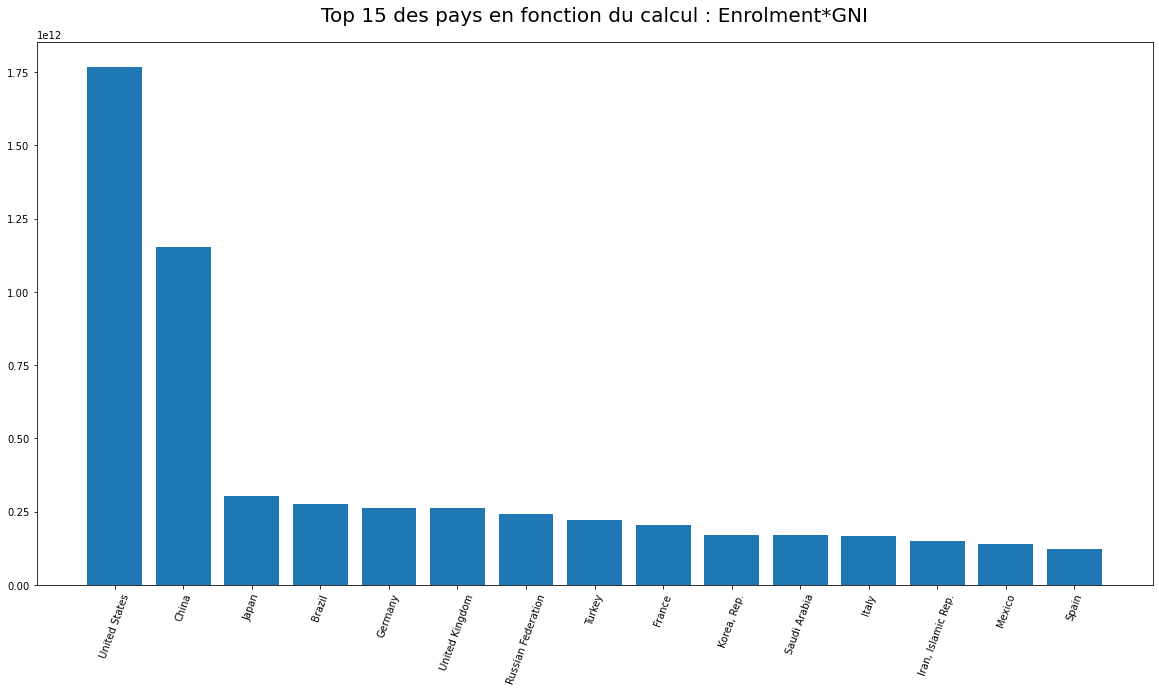

<Figure size 432x288 with 0 Axes>

In [244]:
return_barplots_ranking(15, result_1, 'Enrolment*GNI')

<center>2022

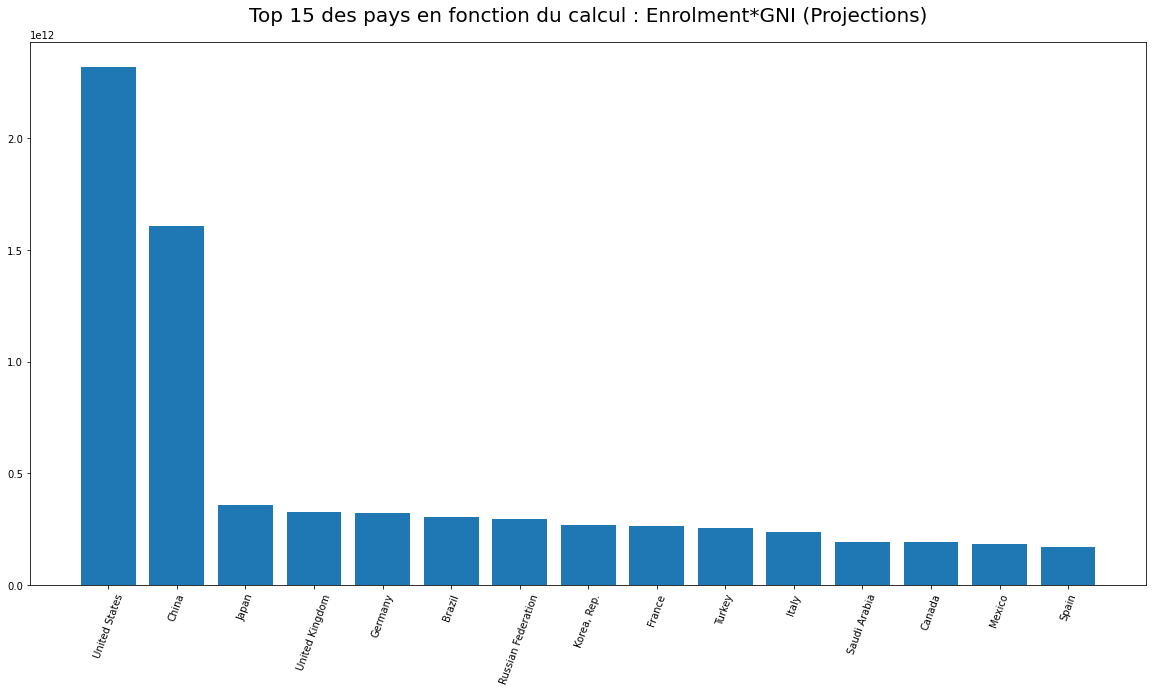

<Figure size 432x288 with 0 Axes>

In [245]:
return_barplots_ranking(15, projections_result_2022_1, 'Enrolment*GNI', projection=True)

<center>2030

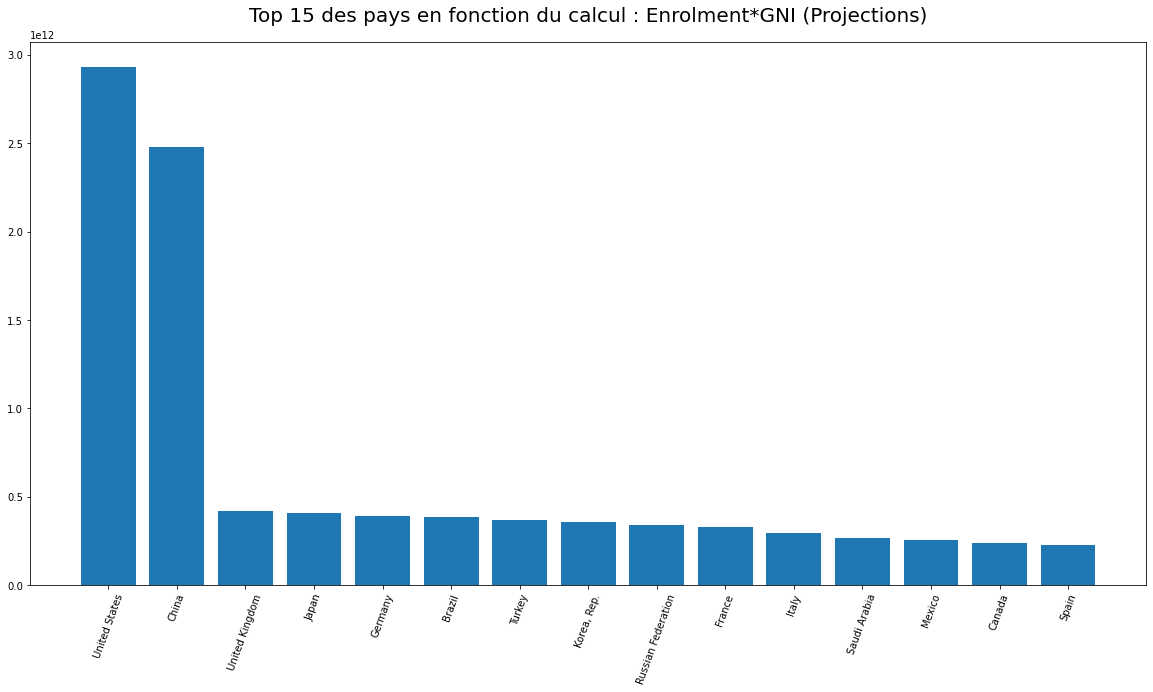

<Figure size 432x288 with 0 Axes>

In [246]:
return_barplots_ranking(15, projections_result_2030_1, 'Enrolment*GNI', projection=True)

'Market\'s monetary mass'

<center>Results

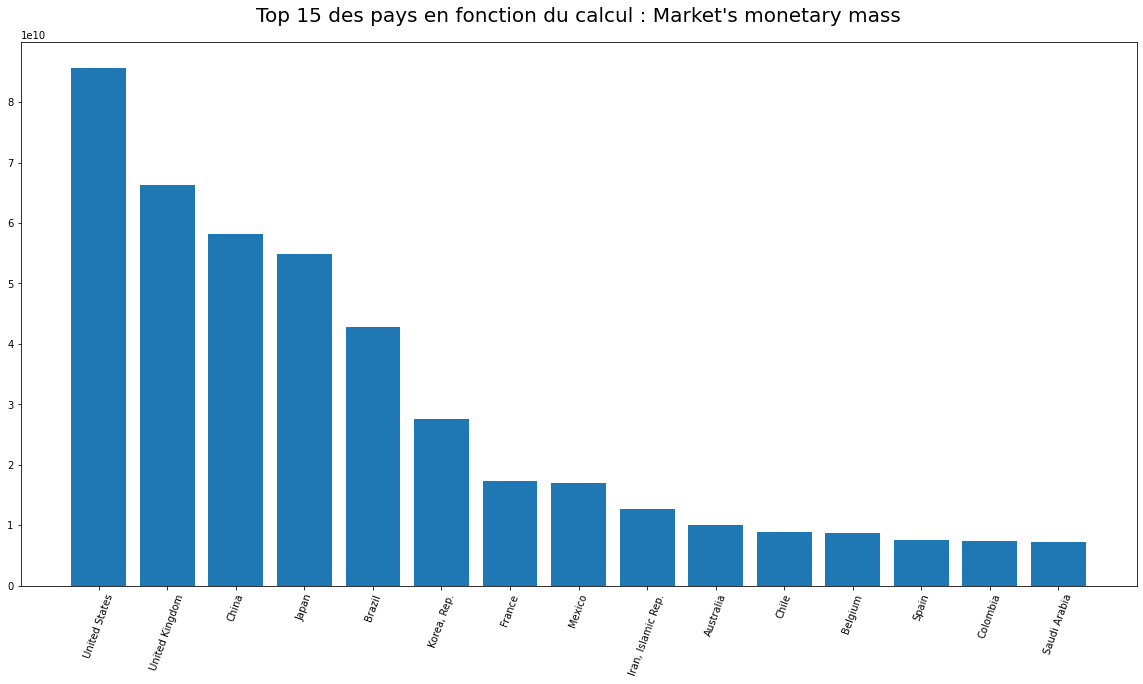

<Figure size 432x288 with 0 Axes>

In [247]:
return_barplots_ranking(15, result_2, 'Market\'s monetary mass')

<center>2022

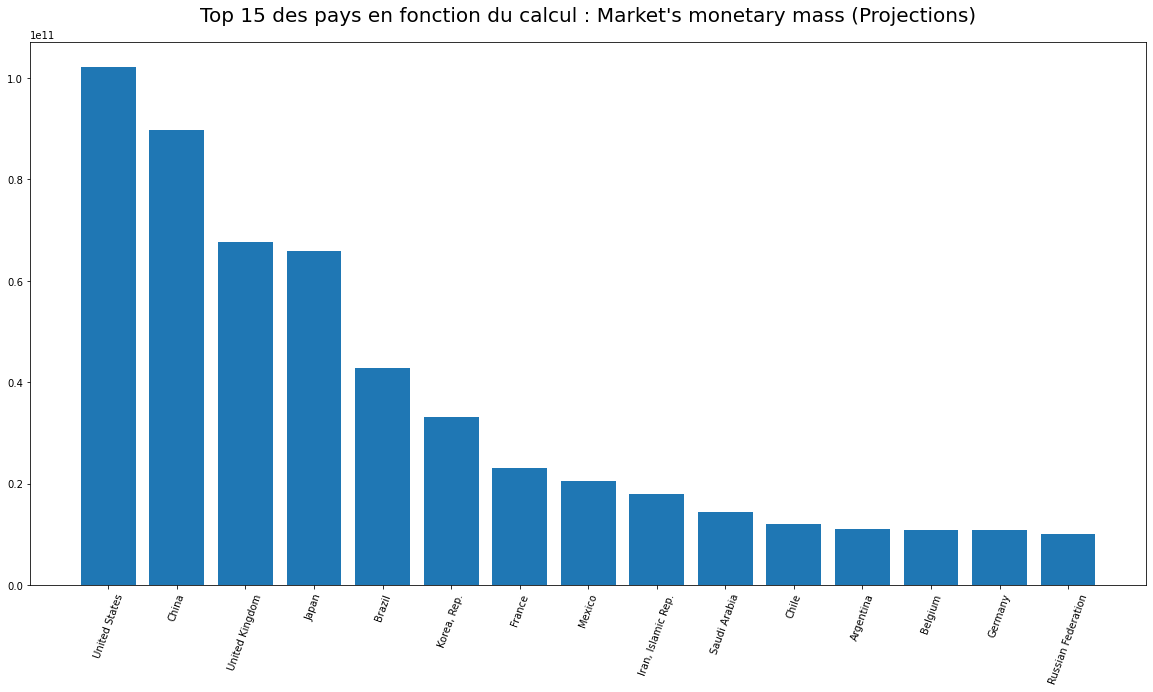

<Figure size 432x288 with 0 Axes>

In [248]:
return_barplots_ranking(15, projections_result_2022_2, 'Market\'s monetary mass', projection=True)

<center>2030

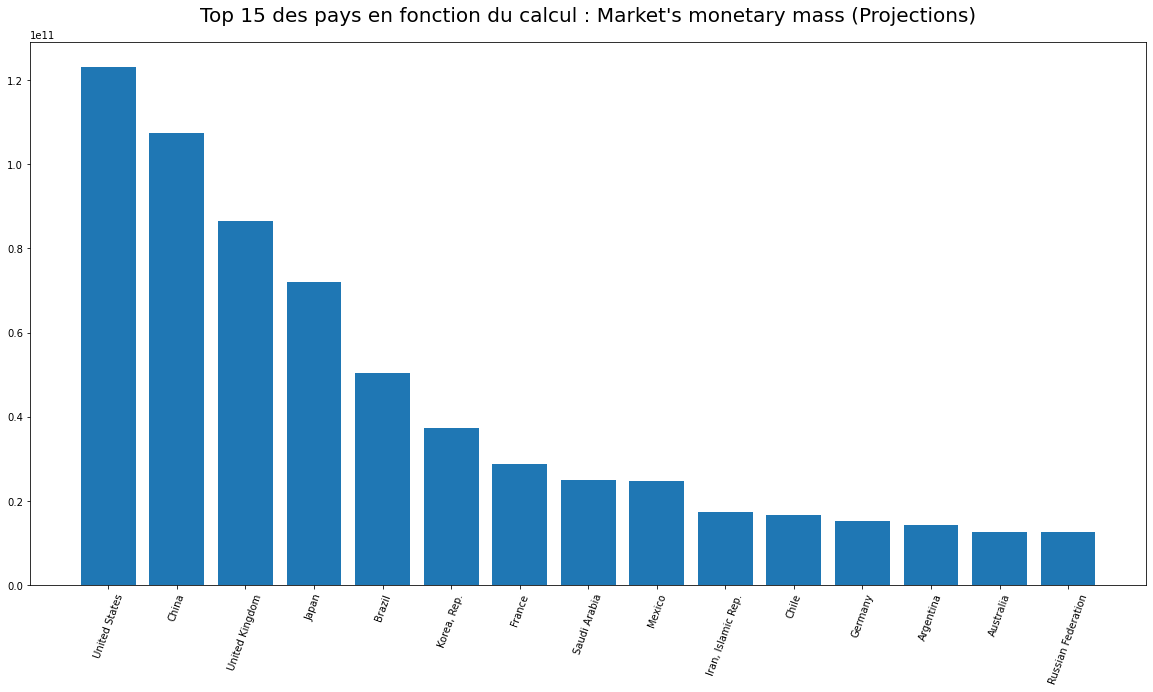

<Figure size 432x288 with 0 Axes>

In [249]:
return_barplots_ranking(15, projections_result_2030_2, 'Market\'s monetary mass', projection=True)

<h6>Trends</h6>

In [250]:
rw_data_fork_2 = rw_data_fork_1[projections.columns].copy()

In [251]:
#on crée une df avec les données et les projections
both_facts_projected_df = rw_data_fork_2.append(projections)

In [252]:
#on recrée nos idicateurs

#on additionne tertiary et upper 

both_facts_projected_df['Total enrolment tertiary and upper secondary (number)'] = (
    both_facts_projected_df['Enrolment in tertiary education, all programmes, both sexes (number)'] + 
    both_facts_projected_df['Enrolment in upper secondary education, both sexes (number)'])

#on multiplie Enrolment et GNI

both_facts_projected_df['Enrolment*GNI'] = both_facts_projected_df['Total enrolment tertiary and upper secondary (number)']*both_facts_projected_df['GNI per capita, PPP (current international $)']


#on récupère les pays au dessus des seuils en sus

both_facts_projected_df = both_facts_projected_df[both_facts_projected_df['Country Name'].isin(zeta_array)].copy()

#on effectue des calculs : 

#1. On multiplie le poucentage de privé par le nombre d'inscriptions afin d'exprimer le nombre
#d'inscrits dans le privé (Academy n'est pas publique !)

both_facts_projected_df['Private Tertiary Enrolment (number)'] = (
    both_facts_projected_df['Enrolment in tertiary education, all programmes, both sexes (number)'] *
    (both_facts_projected_df['Percentage of enrolment in tertiary education in private institutions (%)']/100)
)

both_facts_projected_df['Private Upper Secondary Enrolment (number)'] = (
    both_facts_projected_df['Enrolment in upper secondary education, both sexes (number)'] *
    (both_facts_projected_df['Percentage of enrolment in upper secondary education in private institutions (%)']/100)
)

#2. Les nombres d'inscriptions englobent toutes les années. Il convient d'exprimer ce nombre 
#pour une année dans un pays. 

both_facts_projected_df['One Year Private Tertiary Enrolment (number)'] = (
    both_facts_projected_df['Private Tertiary Enrolment (number)'] /
    both_facts_projected_df['School life expectancy, tertiary, both sexes (years)']
)

both_facts_projected_df['One Year Upper Secondary Enrolment (number)'] = (
    both_facts_projected_df['Private Upper Secondary Enrolment (number)'] /
    both_facts_projected_df['Theoretical duration of upper secondary education (years)']
)

#3. On additionne les One Year pour avoir un total d'inscription sur un an

both_facts_projected_df['Total One Year Private (number)'] = (
    both_facts_projected_df['One Year Private Tertiary Enrolment (number)']+
    both_facts_projected_df['One Year Upper Secondary Enrolment (number)']
)

#4. On multiplie par le RNB par tête PPA afin d'exprimer le marché en une masse monétaire

both_facts_projected_df['Market\'s monetary mass'] = (
    both_facts_projected_df['GNI per capita, PPP (current international $)']*
    both_facts_projected_df['Total One Year Private (number)']
)

'Enrolment*GNI'


In [253]:
countries_enrolment_gni = np.unique([
 *result_1['Country Name'].head(15).unique(),
 *projections_result_2022_1['Country Name'].head(15).unique(),
 *projections_result_2030_1['Country Name'].head(15).unique()
])

In [254]:
enrolment_gni = both_facts_projected_df[both_facts_projected_df['Country Name'].isin(countries_enrolment_gni)].copy()

In [255]:
enrolment_gni.dropna(subset=['Enrolment*GNI'], inplace=True)

In [256]:
countries_enrolment_gni

array(['Brazil', 'Canada', 'China', 'France', 'Germany',
       'Iran, Islamic Rep.', 'Italy', 'Japan', 'Korea, Rep.', 'Mexico',
       'Russian Federation', 'Saudi Arabia', 'Spain', 'Turkey',
       'United Kingdom', 'United States'], dtype='<U18')

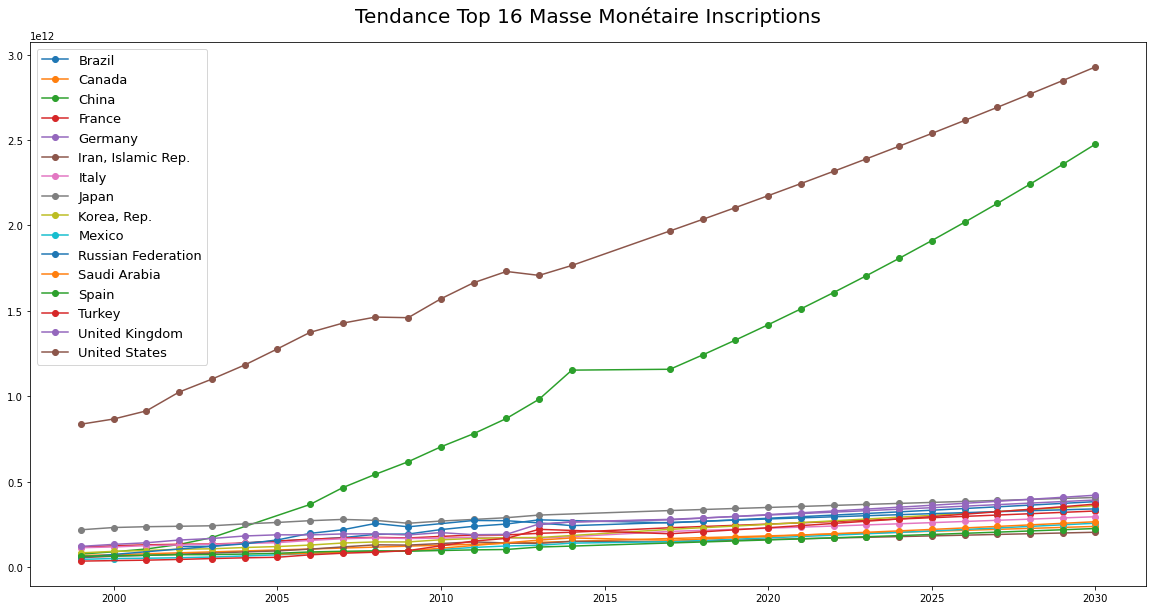

<Figure size 432x288 with 0 Axes>

In [257]:
empty_list = []
plt.figure(figsize=(20,10))
ax = plt.subplot()
####ax.tick_params(axis='x', colors=font_txt)
####ax.tick_params(axis='y', colors=font_txt)
for i in countries_enrolment_gni:    
    plt.plot(
    enrolment_gni[enrolment_gni['Country Name'] == i]['Year'].tolist(),
    enrolment_gni[enrolment_gni['Country Name'] == i]['Enrolment*GNI'].tolist(),
    marker='o', 
    )
    empty_list.append(i)

leg = plt.legend(
    empty_list,
    fontsize=13,
    ####facecolor=legend_background
)

####for l in leg.get_texts(): l.set_color(font_txt)
    
plt.title(
    'Tendance Top 16 Masse Monétaire Inscriptions',
    fontsize=font_sizes,
    pad = 20,
    ####color=font_txt
)
####plt.savefig('./SavedGraphs/.png', transparent=True)
plt.show()
plt.clf()

In [258]:
#si on enlève la chine et les états unis : 

countries_enrolment_gni_bis = ['Brazil', 'Canada', 'France', 'Germany',
       'Iran, Islamic Rep.', 'Italy', 'Japan', 'Korea, Rep.', 'Mexico',
       'Russian Federation', 'Saudi Arabia', 'Spain', 'Turkey',
       'United Kingdom']

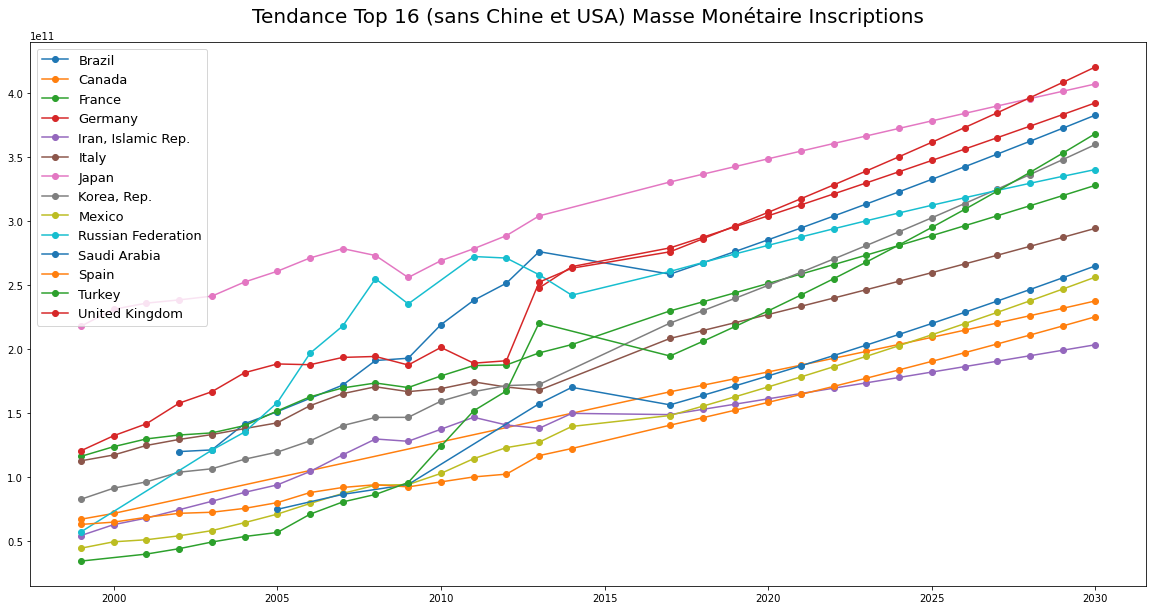

<Figure size 432x288 with 0 Axes>

In [259]:
empty_list = []
plt.figure(figsize=(20,10))
ax = plt.subplot()
####ax.tick_params(axis='x', colors=font_txt)
####ax.tick_params(axis='y', colors=font_txt)
for i in countries_enrolment_gni_bis:    
    plt.plot(
    enrolment_gni[enrolment_gni['Country Name'] == i]['Year'].tolist(),
    enrolment_gni[enrolment_gni['Country Name'] == i]['Enrolment*GNI'].tolist(),
    marker='o', 
    )
    empty_list.append(i)

    
leg = plt.legend(
    empty_list,
    fontsize=13,
    ####facecolor=legend_background
)

####for l in leg.get_texts(): l.set_color(font_txt)
    
plt.title(
    'Tendance Top 16 (sans Chine et USA) Masse Monétaire Inscriptions',
    fontsize=font_sizes,
    pad = 20,
    ####color=font_txt
)

####plt.savefig('./SavedGraphs/.png', transparent=True)
plt.show()
plt.clf()

'Market's monetary mass'


In [260]:
countries_market_monetary_mass = np.unique([
 *result_2['Country Name'].head(15).unique(),
 *projections_result_2022_2['Country Name'].head(15).unique(),
 *projections_result_2030_2['Country Name'].head(15).unique()
])

In [261]:
maket_monetary_mass = both_facts_projected_df[both_facts_projected_df['Country Name'].isin(countries_market_monetary_mass)].copy()

In [262]:
countries_market_monetary_mass

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Chile', 'China',
       'Colombia', 'France', 'Germany', 'Iran, Islamic Rep.', 'Japan',
       'Korea, Rep.', 'Mexico', 'Russian Federation', 'Saudi Arabia',
       'Spain', 'United Kingdom', 'United States'], dtype='<U18')

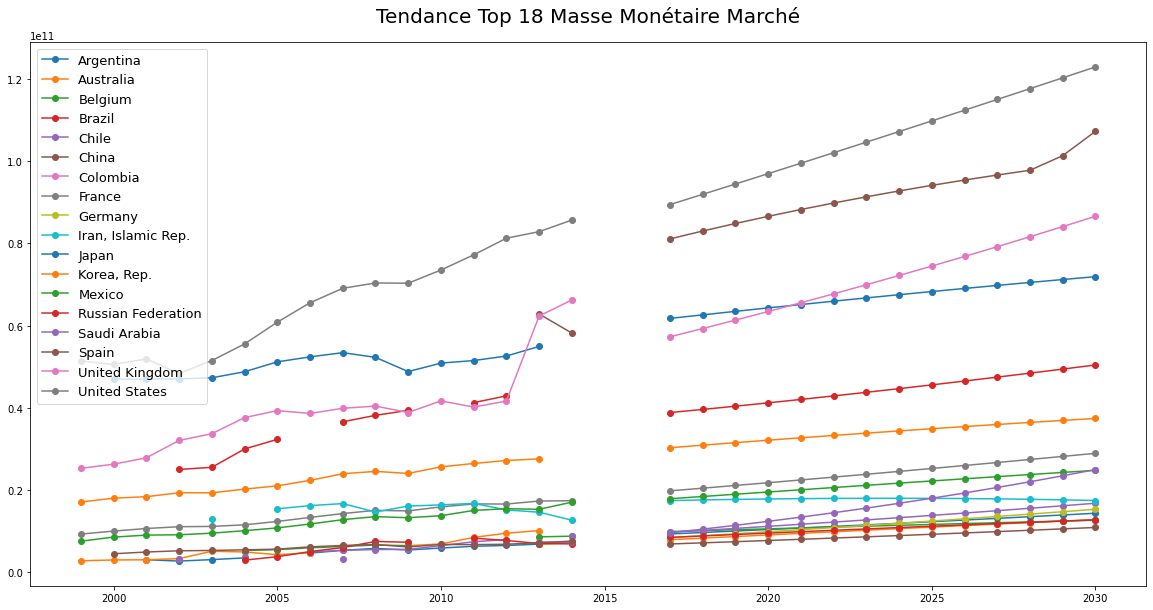

<Figure size 432x288 with 0 Axes>

In [263]:
empty_list = []
plt.figure(figsize=(20,10))
ax = plt.subplot()
####ax.tick_params(axis='x', colors=font_txt)
####ax.tick_params(axis='y', colors=font_txt)
for i in countries_market_monetary_mass:    
    plt.plot(
    maket_monetary_mass[maket_monetary_mass['Country Name'] == i]['Year'].tolist(),
    maket_monetary_mass[maket_monetary_mass['Country Name'] == i]['Market\'s monetary mass'].tolist(),
    marker='o', 
    )
    empty_list.append(i)

leg = plt.legend(
    empty_list,
    fontsize=13,
    ####facecolor=legend_background
)

####for l in leg.get_texts(): l.set_color(font_txt)

plt.title(
    'Tendance Top 18 Masse Monétaire Marché',
    fontsize=font_sizes,
    pad = 20,
    ####color=font_txt
)

####plt.savefig('./SavedGraphs/.png', transparent=True)
plt.show()
plt.clf()

In [265]:
#Conclusions sur Classements et Projections

#Approche Enrolment*GNI:

#Sont systématiquement Top 2 : USA, Chine. 
#Sont systématiquement dans le Top 5 : USA, Chine, Japon, Allemagne. 

#On observe une montée des UK, jusqu'à finir potentiellent 3ème en 2030
#L'Allemagne conserve sa place de 5 ème
#Le Brésil déscend de 4ème à 6 ème


#Approche Private et Années:

#Sont systématiquement top 3 : USA, Chine, UK. 
#Top 4 à 7 sont stables : Japon, Brésil, Korée du Sud et France
#l'Arabie Saudite monte très rapidement

#Nous n'oublions pas le canada emprunte d'une culture anglo saxonne qui arrive à se hisser
#dans le top 15 de nos projections alors que ses chiffres d'inscriptions datent de 2000 ! 
#Peut-être est-ce pour cela, par ailleurs, que le Canada se trouve ici mais considérer le trio : 
#USA, UK, Canada pourrait s'avérer être utile car la même langue y est utilisée (et la culture
#y est similaire). Si une stratégie de scalabilité de cours est choisie : 
#on pensera à ajouter l'Australie à ce trio

#Même en mettant le Canada de côté il conviendra de s'expandre aux USA et aux UK car ces pays sont
#toujours dans le top 3. 

#Le différence culturelle ainsi que la langue représentent des barrières à l'entrée sur le 
#marché Chinois qui représente une opportunité à ne pas négliger néanmoins. 
#Il en va de même pour la Corée, l'Iran, l'Arabie Saoudite. 
#On souhaiterais savoir dans quel langue les universités de ces pays font étudier leurs 
#étudiants. 

#On pensera à ne pas sous estimer les pays hispanophones car ils se situent souvent dans nos 
#classements et semblent se développer rapidement. L'espagnol permettra d'être scalable au niveau 
#des cours. 

#Nous n'oublierons pas la Belgique, pays Francophone qui certes disparaît de notre top 15 
#(Private et Années) horizon 2030 mais reste haut classé. 